In [61]:
import pandas as pd

# Load all CSV files into DataFrames
courses = pd.read_csv('courses.csv')
assessments = pd.read_csv('assessments.csv')
vle = pd.read_csv('vle.csv')
student_info = pd.read_csv('studentInfo.csv')
student_registration = pd.read_csv('studentRegistration.csv')
student_assessment = pd.read_csv('studentAssessment.csv')
student_vle = pd.read_csv('studentVle.csv')


In [62]:
# Display columns of each DataFrame
print("Courses columns:", courses.columns)
print("Assessments columns:", assessments.columns)
print("VLE columns:", vle.columns)
print("Student Info columns:", student_info.columns)
print("Student Registration columns:", student_registration.columns)
print("Student Assessment columns:", student_assessment.columns)
print("Student VLE columns:", student_vle.columns)


Courses columns: Index(['code_module', 'code_presentation', 'module_presentation_length'], dtype='object')
Assessments columns: Index(['code_module', 'code_presentation', 'id_assessment', 'assessment_type',
       'date', 'weight'],
      dtype='object')
VLE columns: Index(['id_site', 'code_module', 'code_presentation', 'activity_type',
       'week_from', 'week_to'],
      dtype='object')
Student Info columns: Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')
Student Registration columns: Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration'],
      dtype='object')
Student Assessment columns: Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'], dtype='object')
Student VLE columns: Index(['code_module', 'code_presentation', 'id_s

In [5]:
# Merge student_info with student_assessment
student_info_assessment = pd.merge(student_info, student_assessment, on='id_student')

# Merge the result with assessments to get the assessment details
#student_info_assessment = pd.merge(student_info_assessment, assessments, on='id_assessment')

# Merge student_info_assessment with student_vle to include VLE interactions
#student_data = pd.merge(student_info_assessment, student_vle, on=['id_student', 'code_module', 'code_presentation'], how='left')


In [6]:
student_info_assessment = pd.merge(student_info_assessment, assessments, on='id_assessment')

In [8]:
student_data = pd.merge(student_info_assessment, student_vle, on='code_module')


KeyError: 'code_module'

In [63]:
student_info_assessment.head()

code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       31604      F     South East Region   
3         AAA             2013J       32885      F  West Midlands Region   
4         AAA             2013J       38053      M                 Wales   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   50-60%    35-55                     0   
3     Lower Than A Level   50-60%     0-35                     0   
4  A Level or Equivalent   80-90%    35-55                     0   

   studied_credits disability final_result  id_assessment  date_submitted  \
0              240          N         Pass         1752.0            18.0   
1               60          N         Pass         1752.0            22.0   
2               60          N         Pass         1752.0            17.0   
3               60          N         Pass         1752.0            26.0   
4               60          N         Pass         1752.0            19.0   

   is_banked  score assessment_type  date  weight  
0        0.0   78.0             TMA  19.0    10.0  
1        0.0   70.0             TMA  19.0    10.0  
2        0.0   72.0             TMA  19.0    10.0  
3        0.0   69.0             TMA  19.0    10.0  
4        0.0   79.0             TMA  19.0    10.0

In [13]:
student_vle.head()

code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1

In [64]:
student_vle.shape[0]

10655280

In [65]:
import pandas as pd

# Load all CSV files into DataFrames
courses = pd.read_csv('courses.csv')
assessments = pd.read_csv('assessments.csv')
vle = pd.read_csv('vle.csv')
student_info = pd.read_csv('studentInfo.csv')
student_registration = pd.read_csv('studentRegistration.csv')
student_assessment = pd.read_csv('studentAssessment.csv')
student_vle = pd.read_csv('studentVle.csv')

# Merge student_info with student_assessment
student_info_assessment = pd.merge(student_info, student_assessment, on='id_student', how='left')
student_info_assessment = pd.merge(student_info_assessment, assessments, on='id_assessment')
# Drop duplicate columns
student_info_assessment = student_info_assessment.drop(['code_module_y', 'code_presentation_y'], axis=1)
student_info_assessment.rename(columns={'code_module_x': 'code_module', 'code_presentation_x': 'code_presentation'}, inplace=True)

# Merge the result with assessments to get the assessment details
#student_info_assessment = pd.merge(student_info_assessment, assessments, on='id_assessment', how='left')

# Merge student_info_assessment with student_vle to include VLE interactions
#student_data = pd.merge(student_info_assessment, student_vle, on=['id_student', 'code_module', 'code_presentation'], how='left')

# Continue with the rest of the analysis...


In [8]:
student_data = pd.merge(student_info_assessment, student_vle, on='id_student', how='left')


KeyboardInterrupt: 

In [66]:
student_info_assessment.shape[0]

207319

In [67]:
# Number of unique id_student in student_info_assessment
unique_students_info_assessment = student_info_assessment['id_student'].nunique()
print(f'Unique id_student in student_info_assessment: {unique_students_info_assessment}')

# Number of unique id_student in student_vle
unique_students_vle = student_vle['id_student'].nunique()
print(f'Unique id_student in student_vle: {unique_students_vle}')


Unique id_student in student_info_assessment: 23369
Unique id_student in student_vle: 26074


In [68]:
# Aggregate VLE data by student, module, and site
vle_aggregated = student_vle.groupby(['id_student', 'code_module', 'id_site']).agg({
    'sum_click': 'sum'  # Total number of clicks per site per student
}).reset_index()


In [69]:
vle_aggregated.shape[0]

1960496

In [70]:
vle_aggregated.head()

id_student code_module  id_site  sum_click
0        6516         AAA   877011         23
1        6516         AAA   877012        305
2        6516         AAA   877015         26
3        6516         AAA   877023          6
4        6516         AAA   877025         91

In [71]:
student_vle.head()

code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1

In [25]:
# Get unique values in the 'code_module' column
unique_code_modules = student_vle['code_module'].unique()
print(f'Unique values in code_module: {unique_code_modules}')


Unique values in code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']


In [72]:
# Group by 'id_student' and 'code_module' and sum the clicks
sum_clicks_by_module_student = student_vle.groupby(['id_student', 'code_module']).agg({
    'sum_click': 'sum'
}).reset_index()

# Display the result
print(sum_clicks_by_module_student)


       id_student code_module  sum_click
0            6516         AAA       2791
1            8462         DDD        656
2           11391         AAA        934
3           23629         BBB        161
4           23698         CCC        910
...           ...         ...        ...
28232     2698257         AAA        758
28233     2698535         CCC        786
28234     2698535         EEE       3455
28235     2698577         BBB        717
28236     2698588         BBB        605

[28237 rows x 3 columns]


In [73]:
# Merge the aggregated clicks data with student_info_assessment
student_data_merged = pd.merge(student_info_assessment, sum_clicks_by_module_student, on=['id_student', 'code_module'], how='left')

# Display the first few rows of the merged DataFrame
print(student_data_merged.head())


  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       31604      F     South East Region   
3         AAA             2013J       32885      F  West Midlands Region   
4         AAA             2013J       38053      M                 Wales   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   50-60%    35-55                     0   
3     Lower Than A Level   50-60%     0-35                     0   
4  A Level or Equivalent   80-90%    35-55                     0   

   studied_credits disability final_result  id_assessment  date_submitted  \
0              240          N         Pass         1752.0

In [50]:
# Print the column headers of the final_dataset_clean DataFrame
print(student_data_merged.columns)


Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'sum_click'],
      dtype='object')


In [42]:
# Select the required columns
final_dataset = student_data_merged[[
    'sum_click', 'score', 'code_module','code_presentation', 'id_student', 'gender', 'region', 'age_band', 'imd_band', 'final_result', 'highest_education'
]]

# Display the first few rows of the final dataset
print(final_dataset.head())

   sum_click  score code_module code_presentation  id_student gender  \
0      934.0   78.0         AAA             2013J       11391      M   
1     1435.0   70.0         AAA             2013J       28400      F   
2     2158.0   72.0         AAA             2013J       31604      F   
3     1034.0   69.0         AAA             2013J       32885      F   
4     2445.0   79.0         AAA             2013J       38053      M   

                 region age_band imd_band final_result      highest_education  
0   East Anglian Region     55<=  90-100%         Pass       HE Qualification  
1              Scotland    35-55   20-30%         Pass       HE Qualification  
2     South East Region    35-55   50-60%         Pass  A Level or Equivalent  
3  West Midlands Region     0-35   50-60%         Pass     Lower Than A Level  
4                 Wales    35-55   80-90%         Pass  A Level or Equivalent  


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_dataset is your DataFrame
# Map final_result to 'Pass' and 'Not Pass'
final_dataset['result_category'] = final_dataset['final_result'].apply(lambda x: 'Pass' if x == 'Pass' else 'Not Pass')

# Check the unique values in 'result_category'
print(final_dataset['result_category'].unique())


['Pass' 'Not Pass']


/var/folders/z5/g844hxr53ddfj66kzvxglc4m0000gn/T/ipykernel_89877/2845305091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['result_category'] = final_dataset['final_result'].apply(lambda x: 'Pass' if x == 'Pass' else 'Not Pass')


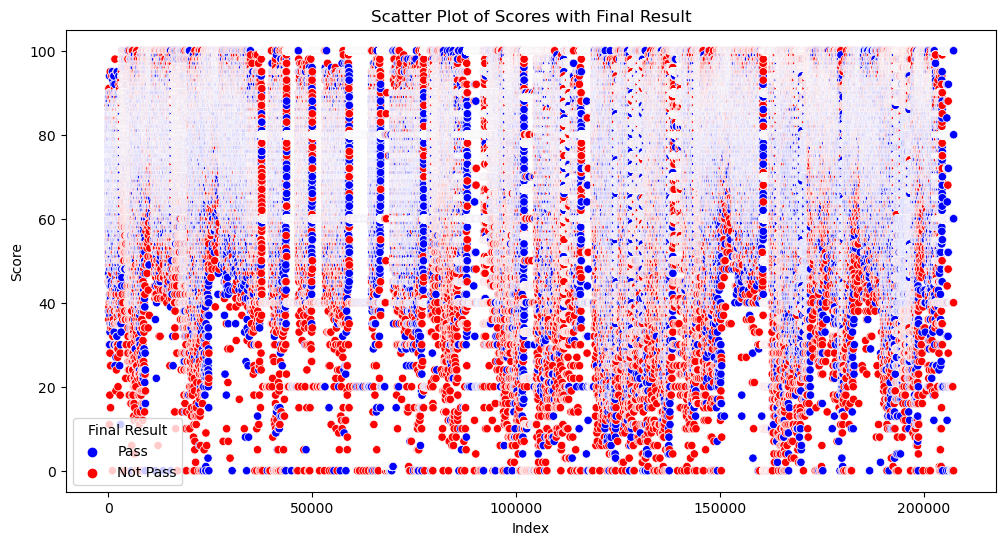

In [44]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_dataset, x=final_dataset.index, y='score', hue='result_category', palette={'Pass': 'blue', 'Not Pass': 'red'}, legend='full')
plt.title('Scatter Plot of Scores with Final Result')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend(title='Final Result')
plt.show()


In [34]:
# Filter the DataFrame for code_module AAA
filtered_data = final_dataset[final_dataset['code_module'] == 'AAA']

# Map final_result to 'Pass' and 'Not Pass'
filtered_data['result_category'] = filtered_data['final_result'].apply(lambda x: 'Pass' if x == 'Pass' else 'Not Pass')

# Check the unique values in 'result_category'
print(filtered_data['result_category'].unique())


['Pass' 'Not Pass']


/var/folders/z5/g844hxr53ddfj66kzvxglc4m0000gn/T/ipykernel_89877/451569929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['result_category'] = filtered_data['final_result'].apply(lambda x: 'Pass' if x == 'Pass' else 'Not Pass')


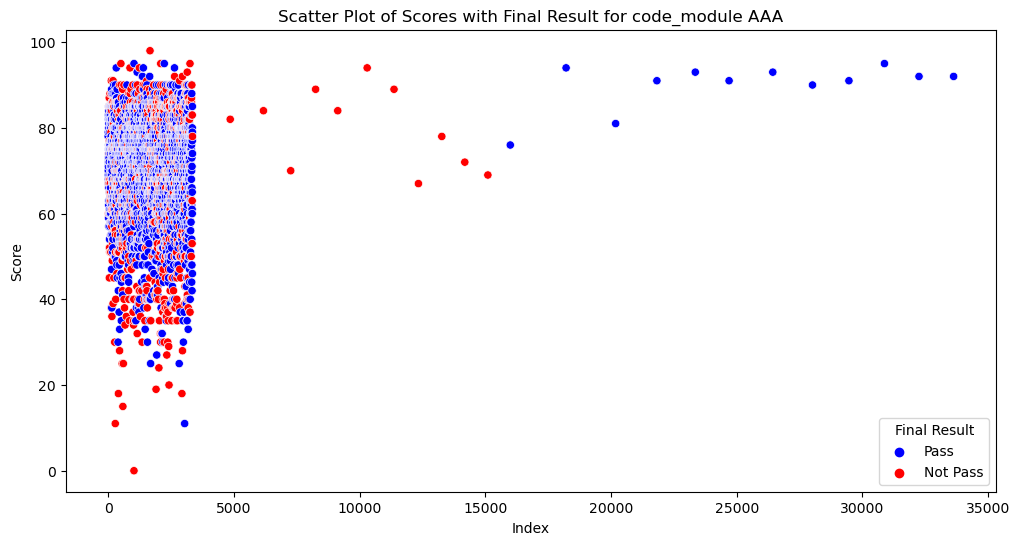

In [35]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x=filtered_data.index, y='score', hue='result_category', palette={'Pass': 'blue', 'Not Pass': 'red'}, legend='full')
plt.title('Scatter Plot of Scores with Final Result for code_module AAA')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend(title='Final Result')
plt.show()


In [45]:
# Check for missing values in the DataFrame
missing_data = final_dataset.isnull().sum()

# Display the missing data
print(missing_data)


sum_click            1110
score                 227
code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
age_band                0
imd_band             9315
final_result            0
highest_education       0
result_category         0
dtype: int64


In [37]:
final_dataset.head()

sum_click  score code_module  id_student gender                region  \
0      934.0   78.0         AAA       11391      M   East Anglian Region   
1     1435.0   70.0         AAA       28400      F              Scotland   
2     2158.0   72.0         AAA       31604      F     South East Region   
3     1034.0   69.0         AAA       32885      F  West Midlands Region   
4     2445.0   79.0         AAA       38053      M                 Wales   

  age_band imd_band final_result      highest_education  result_binary  \
0     55<=  90-100%         Pass       HE Qualification            1.0   
1    35-55   20-30%         Pass       HE Qualification            1.0   
2    35-55   50-60%         Pass  A Level or Equivalent            1.0   
3     0-35   50-60%         Pass     Lower Than A Level            1.0   
4    35-55   80-90%         Pass  A Level or Equivalent            1.0   

  result_category  
0            Pass  
1            Pass  
2            Pass  
3            Pass  
4            Pass

In [46]:
# Select the required columns
final_dataset_clean = final_dataset[[
    'sum_click', 'score', 'code_module','code_presentation', 'id_student', 'gender', 'region', 'age_band', 'imd_band', 'final_result', 'highest_education'
]]

# Fill missing values
final_dataset_clean['sum_click'].fillna(0, inplace=True)
final_dataset_clean['score'].fillna(final_dataset_clean['score'].mean(), inplace=True)
final_dataset_clean['imd_band'].fillna('Unknown', inplace=True)

# Check if there are any missing values left
missing_data_after_fill = final_dataset_clean.isnull().sum()
print(missing_data_after_fill)


sum_click            0
score                0
code_module          0
code_presentation    0
id_student           0
gender               0
region               0
age_band             0
imd_band             0
final_result         0
highest_education    0
dtype: int64


/var/folders/z5/g844hxr53ddfj66kzvxglc4m0000gn/T/ipykernel_89877/1087980184.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset_clean['sum_click'].fillna(0, inplace=True)
/var/folders/z5/g844hxr53ddfj66kzvxglc4m0000gn/T/ipykernel_89877/1087980184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset_clean['score'].fillna(final_dataset_clean['score'].mean(), inplace=True)
/var/folders/z5/g844hxr53ddfj66kzvxglc4m0000gn/T/ipykernel_89877/1087980184.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [47]:
final_dataset_clean.head()

sum_click  score code_module code_presentation  id_student gender  \
0      934.0   78.0         AAA             2013J       11391      M   
1     1435.0   70.0         AAA             2013J       28400      F   
2     2158.0   72.0         AAA             2013J       31604      F   
3     1034.0   69.0         AAA             2013J       32885      F   
4     2445.0   79.0         AAA             2013J       38053      M   

                 region age_band imd_band final_result      highest_education  
0   East Anglian Region     55<=  90-100%         Pass       HE Qualification  
1              Scotland    35-55   20-30%         Pass       HE Qualification  
2     South East Region    35-55   50-60%         Pass  A Level or Equivalent  
3  West Midlands Region     0-35   50-60%         Pass     Lower Than A Level  
4                 Wales    35-55   80-90%         Pass  A Level or Equivalent

/var/folders/z5/g844hxr53ddfj66kzvxglc4m0000gn/T/ipykernel_89877/2705801952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_aaa['result_category'] = filtered_data_aaa['final_result'].apply(lambda x: 'Pass' if x == 'Pass' else 'Not Pass')


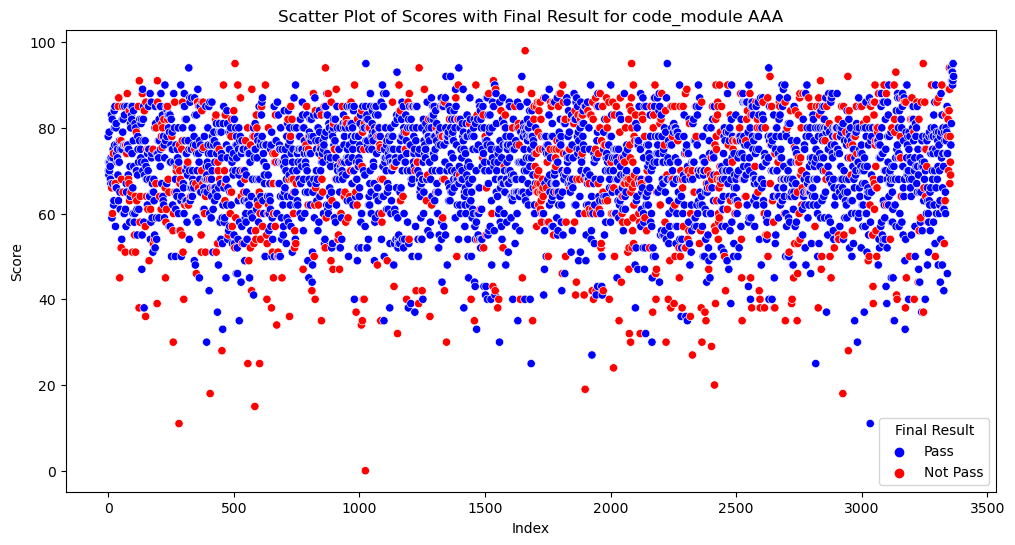

In [48]:
# Filter the DataFrame for code_module AAA
filtered_data_aaa = final_dataset_clean[final_dataset_clean['code_module'] == 'AAA']

# Map final_result to 'Pass' and 'Not Pass'
filtered_data_aaa['result_category'] = filtered_data_aaa['final_result'].apply(lambda x: 'Pass' if x == 'Pass' else 'Not Pass')

# Create a range for the x-axis using the length of the filtered data
x_range = range(len(filtered_data_aaa))

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=x_range, y='score', hue='result_category', data=filtered_data_aaa, palette={'Pass': 'blue', 'Not Pass': 'red'}, legend='full')
plt.title('Scatter Plot of Scores with Final Result for code_module AAA')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend(title='Final Result')
plt.show()


In [49]:
# Number of unique values in the 'code_presentation' column
num_unique_code_presentations = final_dataset_clean['code_presentation'].nunique()
print(f'Number of unique values in code_presentation: {num_unique_code_presentations}')


Number of unique values in code_presentation: 4


In [51]:
# Number of unique values in the 'id_assessment' column
num_unique_id_assessment = student_data_merged['id_assessment'].nunique()
print(f'Number of unique values in id_assessment: {num_unique_id_assessment}')


Number of unique values in id_assessment: 188


In [52]:
# Group by 'id_assessment' and count unique 'code_module' values
assessment_module_counts = student_data_merged.groupby('id_assessment')['code_module'].nunique()

# Assessments that appear in more than one module
assessments_in_multiple_modules = assessment_module_counts[assessment_module_counts > 1]

# Print the result
print(f'Number of id_assessments in more than one code_module: {len(assessments_in_multiple_modules)}')
print(assessments_in_multiple_modules)


Number of id_assessments in more than one code_module: 179
id_assessment
1752.0     2
1753.0     2
1754.0     2
1755.0     2
1756.0     2
          ..
37429.0    3
37430.0    3
37431.0    3
37432.0    3
37433.0    3
Name: code_module, Length: 179, dtype: int64


In [53]:
# Group by 'id_student' and 'code_module' and count the occurrences
student_module_counts = student_data_merged.groupby(['id_student', 'code_module']).size().reset_index(name='counts')

# Display the result
print(student_module_counts)


       id_student code_module  counts
0            6516         AAA       5
1            8462         DDD      14
2           11391         AAA       5
3           23629         BBB       4
4           23698         CCC       9
...           ...         ...     ...
25591     2698257         AAA       5
25592     2698535         CCC       8
25593     2698535         EEE       8
25594     2698577         BBB       5
25595     2698588         BBB       5

[25596 rows x 3 columns]


In [54]:
student_data_merged.head()

code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       31604      F     South East Region   
3         AAA             2013J       32885      F  West Midlands Region   
4         AAA             2013J       38053      M                 Wales   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   50-60%    35-55                     0   
3     Lower Than A Level   50-60%     0-35                     0   
4  A Level or Equivalent   80-90%    35-55                     0   

   studied_credits disability final_result  id_assessment  date_submitted  \
0              240          N         Pass         1752.0            18.0   
1               60          N         Pass         1752.0            22.0   
2               60          N         Pass         1752.0            17.0   
3               60          N         Pass         1752.0            26.0   
4               60          N         Pass         1752.0            19.0   

   is_banked  score assessment_type  date  weight  sum_click  
0        0.0   78.0             TMA  19.0    10.0      934.0  
1        0.0   70.0             TMA  19.0    10.0     1435.0  
2        0.0   72.0             TMA  19.0    10.0     2158.0  
3        0.0   69.0             TMA  19.0    10.0     1034.0  
4        0.0   79.0             TMA  19.0    10.0     2445.0

In [55]:
# Filter the DataFrame for id_student 11391
student_11391_data = student_module_counts[student_module_counts['id_student'] == 11391]

# Display the result
print(student_11391_data)


   id_student code_module  counts
2       11391         AAA       5


In [56]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Group by 'id_student' and 'code_module' and count the occurrences
student_module_counts = student_data_merged.groupby(['id_student', 'code_module']).size().reset_index(name='counts')

# Filter the DataFrame for id_student 11391
student_11391_data = student_module_counts[student_module_counts['id_student'] == 11391]

# Display the result
print(student_11391_data)


   id_student code_module  counts
2       11391         AAA       5


In [57]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Filter the DataFrame for id_student 11391
student_11391_instances = student_data_merged[student_data_merged['id_student'] == 11391]

# Display the result
print(student_11391_instances)


     code_module code_presentation  id_student gender               region  \
0            AAA             2013J       11391      M  East Anglian Region   
390          AAA             2013J       11391      M  East Anglian Region   
752          AAA             2013J       11391      M  East Anglian Region   
1098         AAA             2013J       11391      M  East Anglian Region   
1406         AAA             2013J       11391      M  East Anglian Region   

     highest_education imd_band age_band  num_of_prev_attempts  \
0     HE Qualification  90-100%     55<=                     0   
390   HE Qualification  90-100%     55<=                     0   
752   HE Qualification  90-100%     55<=                     0   
1098  HE Qualification  90-100%     55<=                     0   
1406  HE Qualification  90-100%     55<=                     0   

      studied_credits disability final_result  id_assessment  date_submitted  \
0                 240          N         Pass         

In [58]:
# Group by 'id_student', 'code_module', and 'code_presentation', and count occurrences of 'id_assessment'
grouped_data = student_data_merged.groupby(['id_student', 'code_module', 'code_presentation', 'id_assessment']).size().reset_index(name='assessment_count')

# Display the result for a specific student, if desired
student_11391_grouped = grouped_data[grouped_data['id_student'] == 11391]

# Display the result
print(student_11391_grouped)


    id_student code_module code_presentation  id_assessment  assessment_count
19       11391         AAA             2013J         1752.0                 1
20       11391         AAA             2013J         1753.0                 1
21       11391         AAA             2013J         1754.0                 1
22       11391         AAA             2013J         1755.0                 1
23       11391         AAA             2013J         1756.0                 1


In [59]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Group by 'id_student', 'code_module', 'code_presentation', and count 'id_assessment'
grouped_data = student_data_merged.groupby(['id_student', 'code_module', 'code_presentation', 'id_assessment']).size().reset_index(name='assessment_count')

# Display the result
print(grouped_data)


        id_student code_module code_presentation  id_assessment  \
0             6516         AAA             2014J         1758.0   
1             6516         AAA             2014J         1759.0   
2             6516         AAA             2014J         1760.0   
3             6516         AAA             2014J         1761.0   
4             6516         AAA             2014J         1762.0   
...            ...         ...               ...            ...   
207314     2698588         BBB             2014J        15020.0   
207315     2698588         BBB             2014J        15021.0   
207316     2698588         BBB             2014J        15022.0   
207317     2698588         BBB             2014J        15023.0   
207318     2698588         BBB             2014J        15024.0   

        assessment_count  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
...                  ...  
207314

In [60]:
import pandas as pd

# Sample DataFrame structure assumed
data = {
    'id_student': [1, 1, 1, 2, 2, 3, 3, 3, 3],
    'code_module': ['AAA', 'AAA', 'AAA', 'BBB', 'BBB', 'CCC', 'CCC', 'AAA', 'AAA'],
    'code_presentation': ['2013J', '2013J', '2013J', '2014B', '2014B', '2015C', '2015C', '2013J', '2013J'],
    'id_assessment': [10, 11, 12, 13, 14, 15, 16, 17, 18]
}

student_data_merged = pd.DataFrame(data)

# Group by 'id_student', 'code_module', and 'code_presentation' and count occurrences
grouped_data = student_data_merged.groupby(['id_student', 'code_module', 'code_presentation']).size().reset_index(name='id_assessment_count')

# Display the result
print(grouped_data)


   id_student code_module code_presentation  id_assessment_count
0           1         AAA             2013J                    3
1           2         BBB             2014B                    2
2           3         AAA             2013J                    2
3           3         CCC             2015C                    2


In [74]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Group by 'id_student', 'code_module', and 'code_presentation' and count occurrences
grouped_data = student_data_merged.groupby(['id_student', 'code_module', 'code_presentation']).size().reset_index(name='id_assessment_count')

# Display the result
print(grouped_data)


       id_student code_module code_presentation  id_assessment_count
0            6516         AAA             2014J                    5
1            8462         DDD             2013J                    7
2            8462         DDD             2014J                    7
3           11391         AAA             2013J                    5
4           23629         BBB             2013B                    4
...           ...         ...               ...                  ...
26741     2698257         AAA             2013J                    5
26742     2698535         CCC             2014B                    8
26743     2698535         EEE             2013J                    8
26744     2698577         BBB             2014J                    5
26745     2698588         BBB             2014J                    5

[26746 rows x 4 columns]


In [75]:
# Assuming grouped_data is your DataFrame from the previous step
min_count = grouped_data['id_assessment_count'].min()
max_count = grouped_data['id_assessment_count'].max()

# Display the range
print(f'Range of values in id_assessment_count: {min_count} to {max_count}')


Range of values in id_assessment_count: 1 to 28


In [76]:
# Group by 'id_student', 'code_module', and 'code_presentation' and count occurrences
grouped_data = student_data_merged.groupby(['id_student', 'code_module', 'code_presentation']).size().reset_index(name='id_assessment_count')


In [77]:
# Calculate the average id_assessment_count for each code_module/code_presentation combination
average_counts = grouped_data.groupby(['code_module', 'code_presentation'])['id_assessment_count'].mean().reset_index(name='average_assessment_count')

# Display the result
print(average_counts)


   code_module code_presentation  average_assessment_count
0          AAA             2013J                  4.807065
1          AAA             2014J                  4.658892
2          BBB             2013B                  8.493141
3          BBB             2013J                  8.548369
4          BBB             2014B                  8.473856
5          BBB             2014J                  4.490849
6          CCC             2014B                  8.177439
7          CCC             2014J                  8.826087
8          DDD             2013B                 10.516011
9          DDD             2013J                  6.699048
10         DDD             2014B                  6.230143
11         DDD             2014J                  6.339700
12         EEE             2013J                  5.403778
13         EEE             2014B                  6.086726
14         EEE             2014J                  4.629400
15         FFF             2013B                  9.4056

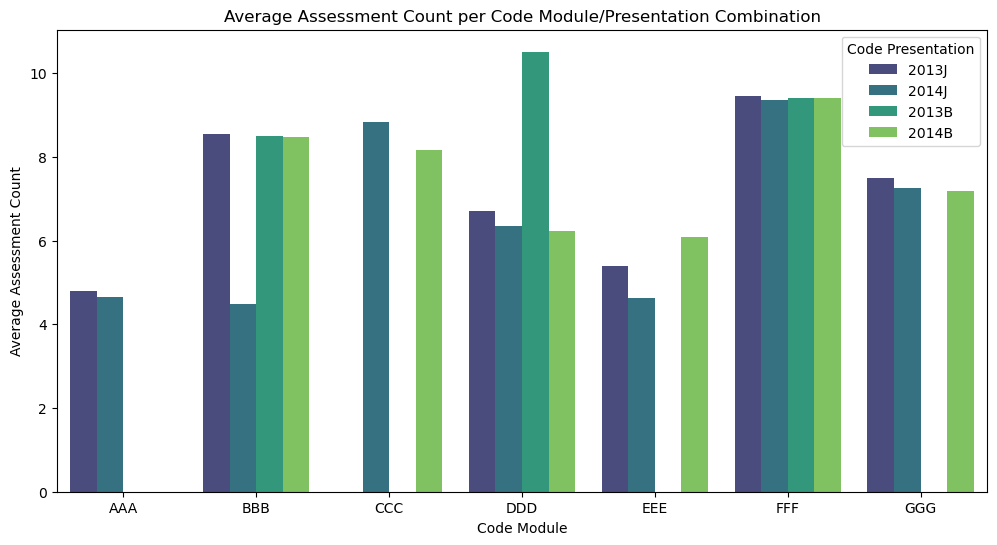

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for average assessment count
plt.figure(figsize=(12, 6))
sns.barplot(data=average_counts, x='code_module', y='average_assessment_count', hue='code_presentation', palette='viridis')
plt.title('Average Assessment Count per Code Module/Presentation Combination')
plt.xlabel('Code Module')
plt.ylabel('Average Assessment Count')
plt.legend(title='Code Presentation')
plt.show()


In [79]:
# Group by 'code_module' and 'code_presentation' and count unique 'id_student'
unique_students_per_combination = student_data_merged.groupby(['code_module', 'code_presentation'])['id_student'].nunique().reset_index(name='unique_student_count')

# Display the result
print(unique_students_per_combination)


   code_module code_presentation  unique_student_count
0          AAA             2013J                   368
1          AAA             2014J                   343
2          BBB             2013B                  1385
3          BBB             2013J                  1747
4          BBB             2014B                  1224
5          BBB             2014J                  1803
6          CCC             2014B                  1640
7          CCC             2014J                  2208
8          DDD             2013B                  1093
9          DDD             2013J                  1575
10         DDD             2014B                   982
11         DDD             2014J                  1466
12         EEE             2013J                   847
13         EEE             2014B                   565
14         EEE             2014J                   966
15         FFF             2013B                  1388
16         FFF             2013J                  1910
17        

In [80]:
# Filter the DataFrame for a specific code_module and code_presentation
filtered_data = student_data_merged[(student_data_merged['code_module'] == 'AAA') & (student_data_merged['code_presentation'] == '2013J')]


In [81]:
# Calculate the average score for each student
average_scores = filtered_data.groupby('id_student').agg({
    'score': 'mean',
    'final_result': 'first',
    'date': 'first'  # Assuming 'date' is the date of the first assessment
}).reset_index()


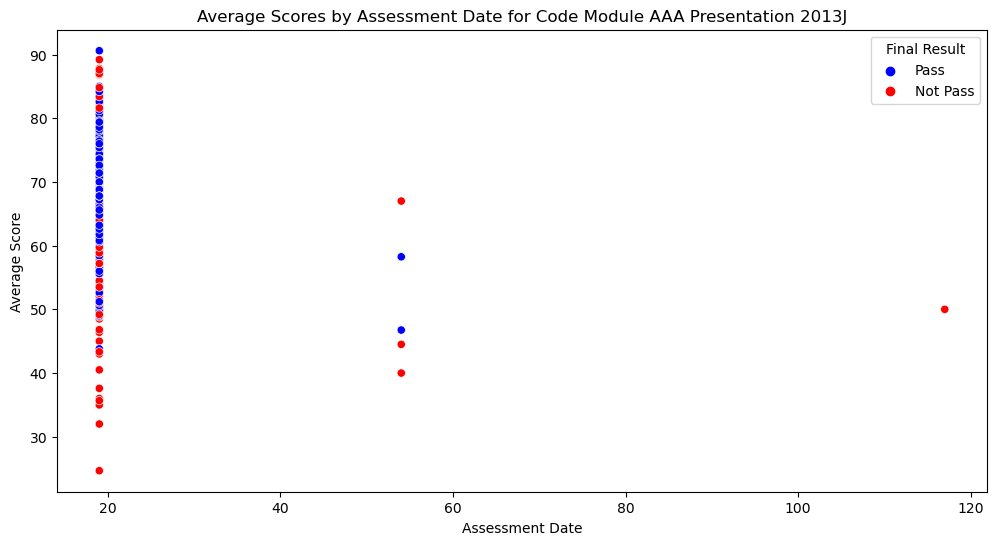

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map final_result to 'Pass' and 'Not Pass'
average_scores['result_category'] = average_scores['final_result'].apply(lambda x: 'Pass' if x == 'Pass' else 'Not Pass')

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=average_scores, x='date', y='score', hue='result_category', palette={'Pass': 'blue', 'Not Pass': 'red'}, legend='full')
plt.title('Average Scores by Assessment Date for Code Module AAA Presentation 2013J')
plt.xlabel('Assessment Date')
plt.ylabel('Average Score')
plt.legend(title='Final Result')
plt.show()


In [83]:
filtered_data.head()

code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       31604      F     South East Region   
3         AAA             2013J       32885      F  West Midlands Region   
4         AAA             2013J       38053      M                 Wales   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   50-60%    35-55                     0   
3     Lower Than A Level   50-60%     0-35                     0   
4  A Level or Equivalent   80-90%    35-55                     0   

   studied_credits disability final_result  id_assessment  date_submitted  \
0              240          N         Pass         1752.0            18.0   
1               60          N         Pass         1752.0            22.0   
2               60          N         Pass         1752.0            17.0   
3               60          N         Pass         1752.0            26.0   
4               60          N         Pass         1752.0            19.0   

   is_banked  score assessment_type  date  weight  sum_click  
0        0.0   78.0             TMA  19.0    10.0      934.0  
1        0.0   70.0             TMA  19.0    10.0     1435.0  
2        0.0   72.0             TMA  19.0    10.0     2158.0  
3        0.0   69.0             TMA  19.0    10.0     1034.0  
4        0.0   79.0             TMA  19.0    10.0     2445.0

In [85]:
# Group by 'id_assessment' and count the number of occurrences
attempts_per_assessment = filtered_data.groupby('id_assessment').size().reset_index(name='attempt_count')

# Display the result
print(attempts_per_assessment)


    id_assessment  attempt_count
0          1752.0            359
1          1753.0            342
2          1754.0            331
3          1755.0            303
4          1756.0            298
5          1758.0             30
6          1759.0             28
7          1760.0             25
8          1761.0             20
9          1762.0             21
10        34886.0              1
11        34887.0              1
12        34888.0              1
13        34889.0              1
14        34890.0              1
15        34891.0              1
16        34892.0              1
17        34893.0              1
18        34894.0              1
19        34895.0              1
20        34896.0              1
21        34897.0              1


In [86]:
# Group by 'id_assessment' and 'date' and count the occurrences
assessment_counts_by_date = student_data_merged.groupby(['id_assessment', 'date']).size().reset_index(name='attempt_count')

# Display the result
print(assessment_counts_by_date)


     id_assessment   date  attempt_count
0           1752.0   19.0            390
1           1753.0   54.0            362
2           1754.0  117.0            346
3           1755.0  166.0            308
4           1756.0  215.0            302
..             ...    ...            ...
180        37439.0  229.0            508
181        37440.0  229.0            483
182        37441.0  229.0            477
183        37442.0  229.0            419
184        37443.0  229.0            345

[185 rows x 3 columns]


In [87]:
# Group by 'id_assessment' and calculate the average score
average_score_per_assessment = student_data_merged.groupby('id_assessment')['score'].mean().reset_index(name='average_score')

# Display the result
print(average_score_per_assessment)


     id_assessment  average_score
0           1752.0      70.126289
1           1753.0      66.781768
2           1754.0      70.290698
3           1755.0      70.512987
4           1756.0      69.115894
..             ...            ...
183        37439.0      86.141732
184        37440.0      84.380952
185        37441.0      91.949686
186        37442.0      75.656325
187        37443.0      85.275362

[188 rows x 2 columns]


In [88]:
# Calculate the overall score for each student by summing weighted scores
overall_scores = student_data_merged.groupby(['id_student', 'code_module', 'code_presentation']).agg({
    'weighted_score': 'sum',
    'final_result': 'first'
}).reset_index()

# Map final_result to 'Pass' and 'Not Pass'
overall_scores['result_category'] = overall_scores['final_result'].apply(lambda x: 'Pass' if x == 'Pass' else 'Not Pass')


KeyError: "Column(s) ['weighted_score'] do not exist"

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       31604      F     South East Region   
3         AAA             2013J       32885      F  West Midlands Region   
4         AAA             2013J       38053      M                 Wales   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   50-60%    35-55                     0   
3     Lower Than A Level   50-60%     0-35                     0   
4  A Level or Equivalent   80-90%    35-55                     0   

   studied_credits disability final_result  id_assessment  date_submitted  \
0              240          N         Pass         1752.0

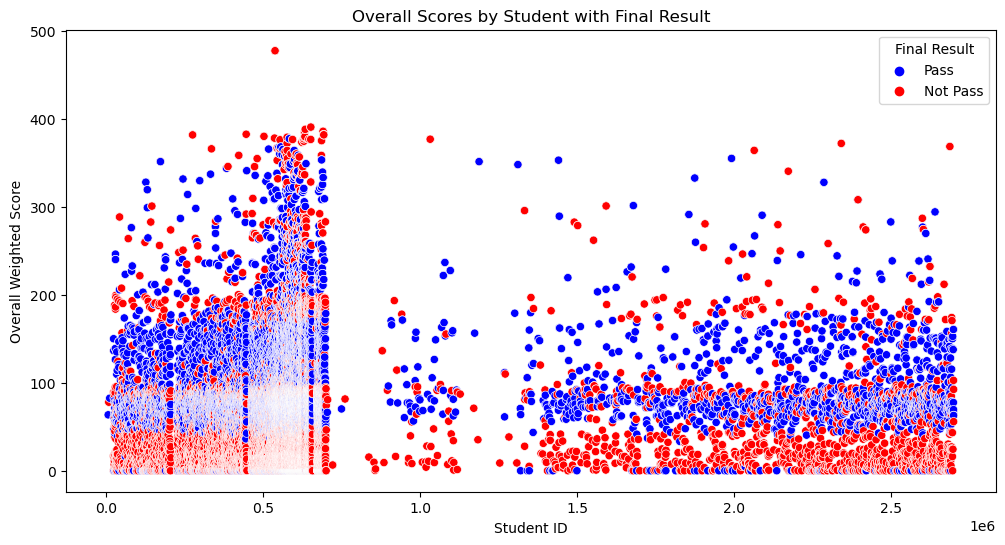

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming student_data_merged is your real DataFrame
# Ensure the DataFrame is loaded correctly
print(student_data_merged.head())

# Calculate the weighted score for each assessment
student_data_merged['weighted_score'] = student_data_merged['score'] * (student_data_merged['weight'] / 100.0)

# Check if the column was created
print(student_data_merged[['score', 'weight', 'weighted_score']].head())

# Calculate the overall score for each student by summing weighted scores
overall_scores = student_data_merged.groupby(['id_student', 'code_module', 'code_presentation']).agg({
    'weighted_score': 'sum',
    'final_result': 'first'
}).reset_index()

# Check the overall_scores DataFrame
print(overall_scores.head())

# Map final_result to 'Pass' and 'Not Pass'
overall_scores['result_category'] = overall_scores['final_result'].apply(lambda x: 'Pass' if x == 'Pass' else 'Not Pass')

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=overall_scores, x='id_student', y='weighted_score', hue='result_category', palette={'Pass': 'blue', 'Not Pass': 'red'}, legend='full')
plt.title('Overall Scores by Student with Final Result')
plt.xlabel('Student ID')
plt.ylabel('Overall Weighted Score')
plt.legend(title='Final Result')
plt.show()


In [90]:
import pandas as pd

# Assuming student_data_merged is your real DataFrame
# Display unique values and their counts in the 'weight' column
weight_values = student_data_merged['weight'].value_counts().sort_index()
print(weight_values)

# Check if all values are double digits
all_double_digits = weight_values.index.to_series().apply(lambda x: 10 <= x < 100).all()
print(f"All values in 'weight' are double digits: {all_double_digits}")


weight
0.0      52124
1.0      16623
2.0       6442
3.0       2849
4.0       1699
5.0       6222
6.0        622
7.0       3992
7.5       1213
8.0       5985
9.0       3889
10.0      9825
12.5     17656
15.0      2218
16.0      3374
17.5      2562
18.0     15961
20.0      9406
22.0      7748
25.0     18653
28.0      8246
30.0       602
35.0      2737
100.0     6671
Name: count, dtype: int64
All values in 'weight' are double digits: False


In [91]:
import pandas as pd

# Assuming student_data_merged is your real DataFrame
# Filter the DataFrame for the specific code_module and code_presentation
filtered_data = student_data_merged[(student_data_merged['code_module'] == 'AAA') & (student_data_merged['code_presentation'] == '2013J')]

# Display unique values and their counts in the 'weight' column within the filtered data
weight_values_filtered = filtered_data['weight'].value_counts().sort_index()
print(weight_values_filtered)

# Check if all values are double digits
all_double_digits_filtered = weight_values_filtered.index.to_series().apply(lambda x: 10 <= x < 100).all()
print(f"All values in 'weight' are double digits: {all_double_digits_filtered}")


weight
0.0        7
10.0     389
12.5       2
20.0    1049
25.0       3
30.0     319
Name: count, dtype: int64
All values in 'weight' are double digits: False


In [92]:
import pandas as pd

# Assuming student_data_merged is your real DataFrame
# Filter the DataFrame for the specific code_module and code_presentation
filtered_data = student_data_merged[(student_data_merged['code_module'] == 'AAA') & (student_data_merged['code_presentation'] == '2013J')]

# Keep only the rows that have weight values of 10, 20, or 30
filtered_data = filtered_data[filtered_data['weight'].isin([10, 20, 30])]

# Display the filtered data
print(filtered_data)


     code_module code_presentation  id_student gender                region  \
0            AAA             2013J       11391      M   East Anglian Region   
1            AAA             2013J       28400      F              Scotland   
2            AAA             2013J       31604      F     South East Region   
3            AAA             2013J       32885      F  West Midlands Region   
4            AAA             2013J       38053      M                 Wales   
...          ...               ...         ...    ...                   ...   
3069         AAA             2013J     2073016      F         London Region   
3070         AAA             2013J     2139353      M         London Region   
3071         AAA             2013J     2318055      M                 Wales   
3072         AAA             2013J     2358969      F   East Anglian Region   
3073         AAA             2013J     2569324      M          South Region   

          highest_education imd_band age_band  num_

In [93]:
import pandas as pd

# Assuming student_data_merged is your real DataFrame
# Filter the DataFrame for the specific code_module and code_presentation
filtered_data = student_data_merged[(student_data_merged['code_module'] == 'AAA') & (student_data_merged['code_presentation'] == '2013J')]

# Keep only the rows that have weight values of 10, 20, or 30
filtered_data = filtered_data[filtered_data['weight'].isin([10, 20, 30])]

# Calculate the weighted score for each assessment
filtered_data['weighted_score'] = filtered_data['score'] * (filtered_data['weight'] / 100.0)

# Sum the weighted scores for each id_student
sum_weighted_scores = filtered_data.groupby('id_student')['weighted_score'].sum().reset_index(name='sum_weighted_score')

# Display the result
print(sum_weighted_scores)


     id_student  sum_weighted_score
0         11391                82.4
1         28400                65.4
2         31604                76.3
3         32885                55.0
4         38053                66.9
..          ...                 ...
363     2689958                81.2
364     2691206                84.7
365     2691244                52.8
366     2694424                76.5
367     2698257                69.4

[368 rows x 2 columns]


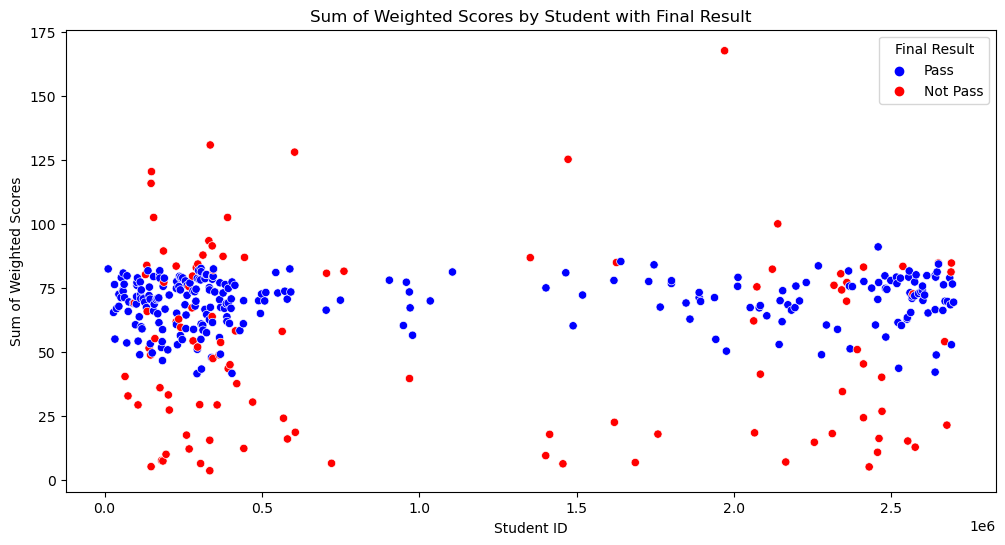

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming student_data_merged is your real DataFrame
# Filter the DataFrame for the specific code_module and code_presentation
filtered_data = student_data_merged[(student_data_merged['code_module'] == 'AAA') & (student_data_merged['code_presentation'] == '2013J')]

# Keep only the rows that have weight values of 10, 20, or 30
filtered_data = filtered_data[filtered_data['weight'].isin([10, 20, 30])]

# Calculate the weighted score for each assessment
filtered_data['weighted_score'] = filtered_data['score'] * (filtered_data['weight'] / 100.0)

# Sum the weighted scores for each id_student
sum_weighted_scores = filtered_data.groupby(['id_student', 'final_result'])['weighted_score'].sum().reset_index(name='sum_weighted_score')

# Map final_result to 'Pass' and 'Not Pass'
sum_weighted_scores['result_category'] = sum_weighted_scores['final_result'].apply(lambda x: 'Pass' if x == 'Pass' else 'Not Pass')

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sum_weighted_scores, x='id_student', y='sum_weighted_score', hue='result_category', palette={'Pass': 'blue', 'Not Pass': 'red'}, legend='full')
plt.title('Sum of Weighted Scores by Student with Final Result')
plt.xlabel('Student ID')
plt.ylabel('Sum of Weighted Scores')
plt.legend(title='Final Result')
plt.show()


In [95]:
import pandas as pd

# Assuming student_data_merged is your real DataFrame
# Filter the DataFrame for the specific code_module and code_presentation
filtered_data = student_data_merged[(student_data_merged['code_module'] == 'AAA') & (student_data_merged['code_presentation'] == '2013J')]

# Keep only the rows that have weight values of 10, 20, or 30
filtered_data = filtered_data[filtered_data['weight'].isin([10, 20, 30])]

# Group by id_student and count unique final_result values
student_results = filtered_data.groupby('id_student')['final_result'].nunique().reset_index()

# Filter for students with more than one unique final_result
students_with_mixed_results = student_results[student_results['final_result'] > 1]

# Display the result
print(students_with_mixed_results)


Empty DataFrame
Columns: [id_student, final_result]
Index: []


In [96]:
import pandas as pd

# Assuming student_data_merged is your real DataFrame
# Filter the DataFrame for the specific code_module and code_presentation
filtered_data = student_data_merged[(student_data_merged['code_module'] == 'AAA') & (student_data_merged['code_presentation'] == '2013J')]

# Keep only the rows that have weight values of 10, 20, or 30
filtered_data = filtered_data[filtered_data['weight'].isin([10, 20, 30])]

# Count the number of students in each category of final_result
final_result_counts = filtered_data['final_result'].value_counts().reset_index(name='count')

# Rename the columns for clarity
final_result_counts.columns = ['final_result', 'count']

# Display the result
print(final_result_counts)


  final_result  count
0         Pass   1281
1    Withdrawn    212
2         Fail    164
3  Distinction    100


In [99]:
import pandas as pd

# Assuming filtered_data is your DataFrame with the specific code_module and code_presentation
# Filter the DataFrame for Pass and Fail categories
pass_data = filtered_data[filtered_data['final_result'] == 'Pass']
fail_data = filtered_data[filtered_data['final_result'] == 'Fail']

# Sample 500 'Pass' and 500 'Fail' for the training set
train_pass = pass_data.sample(n=500, random_state=42, replace=True)
train_fail = fail_data.sample(n=500, random_state=42, replace=True)
training_set = pd.concat([train_pass, train_fail])

# Sample 100 'Pass' and 100 'Fail' for the testing set
test_pass = pass_data.drop(train_pass.index).sample(n=100, random_state=42, replace=True)
test_fail = fail_data.drop(train_fail.index).sample(n=100, random_state=42, replace=True)
testing_set = pd.concat([test_pass, test_fail])

# Shuffle the adatasets
training_set = training_set.sample(frac=1, random_state=42).reset_index(drop=True)
testing_set = testing_set.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the results
print("Training set:\n", training_set['final_result'].value_counts())
print("Testing set:\n", testing_set['final_result'].value_counts())


Training set:
 final_result
Fail    500
Pass    500
Name: count, dtype: int64
Testing set:
 final_result
Pass    100
Fail    100
Name: count, dtype: int64


In [100]:
training_set.head()

code_module code_presentation  id_student gender                region  \
0         AAA             2013J     2344901      F      Yorkshire Region   
1         AAA             2013J     1620151      M          South Region   
2         AAA             2013J     2358056      F          North Region   
3         AAA             2013J     1401935      M  West Midlands Region   
4         AAA             2013J      231554      M         London Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0  A Level or Equivalent   60-70%     0-35                     0   
1       HE Qualification  90-100%    35-55                     0   
2       HE Qualification      NaN     0-35                     0   
3  A Level or Equivalent   70-80%    35-55                     0   
4  A Level or Equivalent   40-50%     0-35                     0   

   studied_credits  ... final_result id_assessment  date_submitted  is_banked  \
0               60  ...         Fail        1755.0           166.0        0.0   
1               60  ...         Fail        1754.0           121.0        0.0   
2               60  ...         Fail        1755.0           165.0        0.0   
3               60  ...         Fail        1753.0            61.0        0.0   
4              240  ...         Pass        1756.0           216.0        0.0   

   score  assessment_type   date  weight  sum_click  weighted_score  
0   59.0              TMA  166.0    20.0      445.0            11.8  
1   70.0              TMA  117.0    20.0      998.0            14.0  
2   68.0              TMA  166.0    20.0     1588.0            13.6  
3   25.0              TMA   54.0    20.0      240.0             5.0  
4   66.0              TMA  215.0    30.0     1839.0            19.8  

[5 rows x 21 columns]

In [102]:
import pandas as pd

# Assuming filtered_data is your DataFrame with the specific code_module and code_presentation
# Filter the DataFrame for Pass and Fail categories
pass_data = filtered_data[filtered_data['final_result'] == 'Pass']
fail_data = filtered_data[filtered_data['final_result'] == 'Fail']

# Sample 500 'Pass' and 500 'Fail' for the training set
train_pass = pass_data.sample(n=500, random_state=42,replace = True)
train_fail = fail_data.sample(n=500, random_state=42,replace = True)
training_set = pd.concat([train_pass, train_fail])

# Sample 100 'Pass' and 100 'Fail' for the testing set
test_pass = pass_data.drop(train_pass.index).sample(n=100, random_state=42,replace = True)
test_fail = fail_data.drop(train_fail.index).sample(n=100, random_state=42,replace = True)
testing_set = pd.concat([test_pass, test_fail])

# Shuffle the datasets
training_set = training_set.sample(frac=1, random_state=42).reset_index(drop=True)
testing_set = testing_set.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the training set to a CSV file
training_set.to_csv('training_set.csv', index=False)

# Save the testing set to a CSV file
testing_set.to_csv('testing_set.csv', index=False)

# Display the results
print("Training set saved as 'training_set.csv'.")
print("Testing set saved as 'testing_set.csv'.")


Training set saved as 'training_set.csv'.
Testing set saved as 'testing_set.csv'.


In [106]:

# Determine pass and fail counts
pass_fail_counts = training_set.groupby('id_student')['final_result'].first().value_counts().reset_index()

# Rename columns for clarity
pass_fail_counts.columns = ['final_result', 'count']

# Display the result
print(pass_fail_counts)


  final_result  count
0         Pass    221
1         Fail     40


In [104]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Save the DataFrame to a CSV file
student_data_merged.to_csv('student_data_merged.csv', index=False)

# Display a message to confirm the file is saved
print("student_data_merged has been saved as 'student_data_merged.csv'.")


student_data_merged has been saved as 'student_data_merged.csv'.


In [107]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Group by 'id_assessment' and count unique 'code_module' and 'code_presentation' combinations
assessment_module_presentation_counts = student_data_merged.groupby('id_assessment').agg({
    'code_module': pd.Series.nunique,
    'code_presentation': pd.Series.nunique
}).reset_index()

# Rename columns for clarity
assessment_module_presentation_counts.columns = ['id_assessment', 'unique_code_modules', 'unique_code_presentations']

# Display the result
print(assessment_module_presentation_counts)


     id_assessment  unique_code_modules  unique_code_presentations
0           1752.0                    2                          3
1           1753.0                    2                          3
2           1754.0                    2                          3
3           1755.0                    2                          3
4           1756.0                    2                          3
..             ...                  ...                        ...
183        37439.0                    1                          3
184        37440.0                    1                          3
185        37441.0                    1                          3
186        37442.0                    1                          3
187        37443.0                    1                          2

[188 rows x 3 columns]


     id_assessment  count
0           1752.0    390
1           1753.0    362
2           1754.0    346
3           1755.0    308
4           1756.0    302
..             ...    ...
183        37439.0    508
184        37440.0    483
185        37441.0    477
186        37442.0    419
187        37443.0    345

[188 rows x 2 columns]


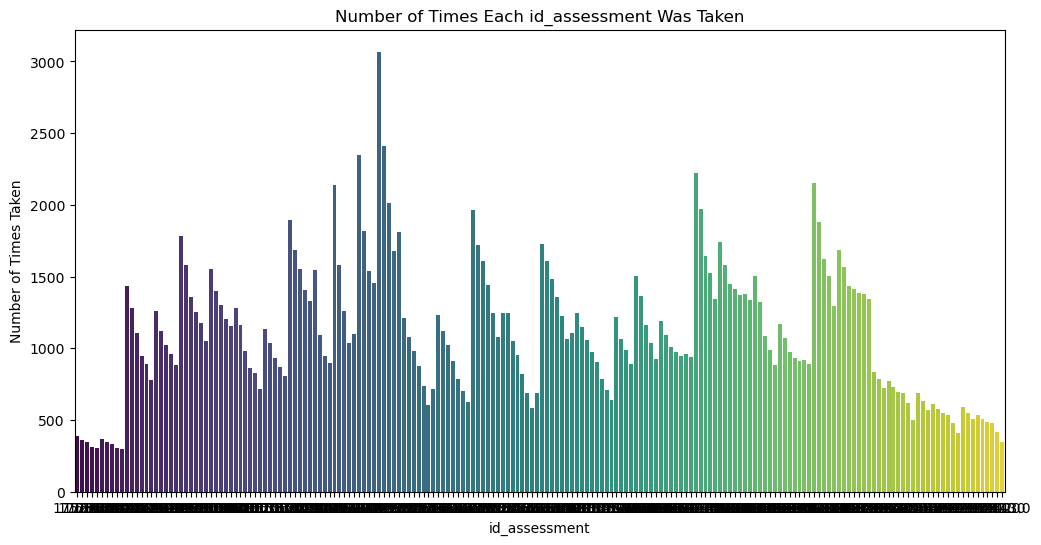

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming student_data_merged is your DataFrame
# Group by 'id_assessment', 'code_module', and 'code_presentation' and count occurrences
assessment_counts = student_data_merged.groupby(['id_assessment', 'code_module', 'code_presentation']).size().reset_index(name='count')

# Summarize the count for each id_assessment
assessment_summary = assessment_counts.groupby('id_assessment')['count'].sum().reset_index()

# Display the result
print(assessment_summary)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=assessment_summary, x='id_assessment', y='count', palette='viridis')
plt.title('Number of Times Each id_assessment Was Taken')
plt.xlabel('id_assessment')
plt.ylabel('Number of Times Taken')
plt.show()


    id_assessment  count
0          1752.0    389
1          1753.0    361
2          1754.0    345
3          1755.0    307
4          1756.0    301
5          1758.0    367
6          1759.0    345
7          1760.0    329
8          1761.0    300
9          1762.0    299
10        34873.0      1
11        34874.0      1
12        34875.0      1
13        34876.0      1
14        34877.0      1
15        34878.0      1
16        34879.0      1
17        34880.0      1
18        34881.0      1
19        34882.0      1
20        34883.0      1
21        34884.0      1
22        34886.0      1
23        34887.0      1
24        34888.0      1
25        34889.0      1
26        34890.0      1
27        34891.0      1
28        34892.0      1
29        34893.0      1
30        34894.0      1
31        34895.0      1
32        34896.0      1
33        34897.0      1


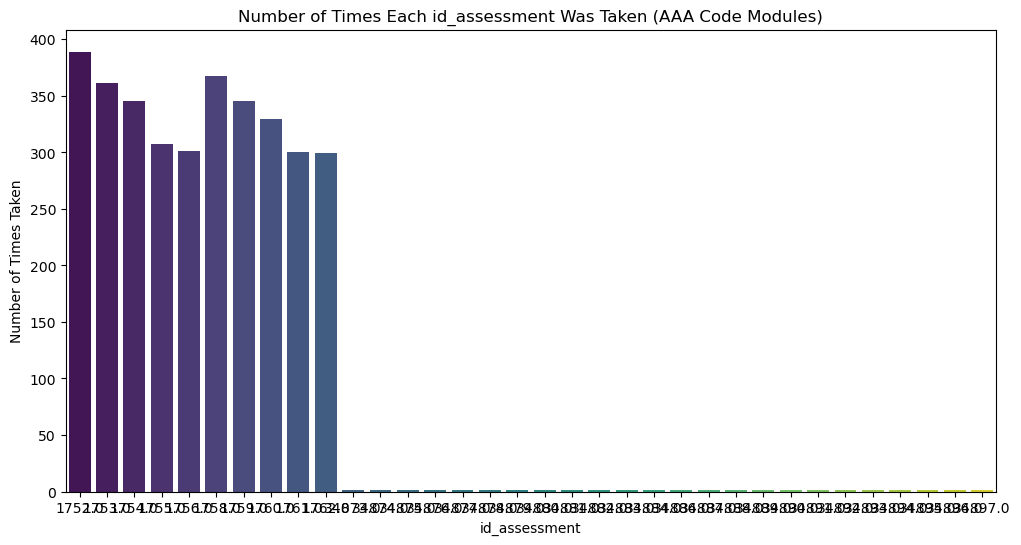

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming student_data_merged is your DataFrame
# Filter the DataFrame for 'AAA' code_module
filtered_data2 = filtered_data[filtered_data['code_module'] == 'AAA']

# Group by 'id_assessment', 'code_module', and 'code_presentation' and count occurrences
assessment_counts = filtered_data2.groupby(['id_assessment', 'code_module', 'code_presentation']).size().reset_index(name='count')

# Summarize the count for each id_assessment
assessment_summary = assessment_counts.groupby('id_assessment')['count'].sum().reset_index()

# Display the result
print(assessment_summary)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=assessment_summary, x='id_assessment', y='count', palette='viridis')
plt.title('Number of Times Each id_assessment Was Taken (AAA Code Modules)')
plt.xlabel('id_assessment')
plt.ylabel('Number of Times Taken')
plt.show()


In [117]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Calculate the number of instances for each id_assessment
assessment_counts = student_data_merged.groupby('id_assessment').size().reset_index(name='count')

# Filter out id_assessment values with less than 50 instances
valid_assessments = assessment_counts[assessment_counts['count'] >= 50]['id_assessment']

# Filter the original DataFrame to include only the valid assessments
filtered_data = student_data_merged[student_data_merged['id_assessment'].isin(valid_assessments)]

# Display the first few rows of the new dataset
print(filtered_data.head())

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       31604      F     South East Region   
3         AAA             2013J       32885      F  West Midlands Region   
4         AAA             2013J       38053      M                 Wales   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   50-60%    35-55                     0   
3     Lower Than A Level   50-60%     0-35                     0   
4  A Level or Equivalent   80-90%    35-55                     0   

   studied_credits  ... final_result id_assessment  date_submitted  is_banked  \
0              240  ...         Pass        1752.0   

In [119]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Calculate the number of instances for each id_assessment
assessment_counts = student_data_merged.groupby('id_assessment').size().reset_index(name='count')

# Display the counts
print(assessment_counts)


     id_assessment  count
0           1752.0    390
1           1753.0    362
2           1754.0    346
3           1755.0    308
4           1756.0    302
..             ...    ...
183        37439.0    508
184        37440.0    483
185        37441.0    477
186        37442.0    419
187        37443.0    345

[188 rows x 2 columns]


In [120]:
# Filter out id_assessment values with less than 50 instances
valid_assessments = assessment_counts[assessment_counts['count'] >= 50]['id_assessment']

# Filter the original DataFrame to include only the valid assessments
filtered_data = student_data_merged[student_data_merged['id_assessment'].isin(valid_assessments)]

# Display the first few rows of the new dataset
print(filtered_data.head())

# Optionally, save the new dataset to a CSV file
filtered_data.to_csv('filtered_data.csv', index=False)

# Display a message to confirm the file is saved
print("filtered_data has been saved as 'filtered_data.csv'.")


  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       31604      F     South East Region   
3         AAA             2013J       32885      F  West Midlands Region   
4         AAA             2013J       38053      M                 Wales   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   50-60%    35-55                     0   
3     Lower Than A Level   50-60%     0-35                     0   
4  A Level or Equivalent   80-90%    35-55                     0   

   studied_credits  ... final_result id_assessment  date_submitted  is_banked  \
0              240  ...         Pass        1752.0   

In [122]:
import pandas as pd

# Load your dataset
# Assuming student_data_merged is your DataFrame
# student_data_merged = pd.read_csv('path_to_your_student_data_merged.csv')

# Step 1: Calculate the number of instances for each id_assessment
assessment_counts = student_data_merged.groupby('id_assessment').size().reset_index(name='count')

# Step 2: Filter out id_assessment values with less than 50 instances
assessments_with_less_than_50 = assessment_counts[assessment_counts['count'] < 50]

# Step 3: Count the number of such id_assessments
num_assessments_with_less_than_50 = assessments_with_less_than_50.shape[0]

# Display the result
print(f'Number of id_assessment values with fewer than 50 instances: {num_assessments_with_less_than_50}')


Number of id_assessment values with fewer than 50 instances: 0


In [124]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Count the number of instances of id_assessment 34873.0
count_assessment_34873 = student_data_merged[student_data_merged['id_assessment'] == 34873.0]
# Display the result
print(f'Number of instances of id_assessment 34873.0: {count_assessment_34873}')


Number of instances of id_assessment 34873.0:       code_module code_presentation  id_student gender                region  \
15994         AAA             2014J     2596621      M     South West Region   
15995         BBB             2013B      110881      F   East Anglian Region   
15996         BBB             2013B      395107      F   East Anglian Region   
15997         CCC             2014B       51576      F         London Region   
15998         CCC             2014B      107028      M  East Midlands Region   
...           ...               ...         ...    ...                   ...   
18208         FFF             2014J     2463282      M     South West Region   
18209         FFF             2014J     2468232      M          South Region   
18210         FFF             2014J     2563095      M          South Region   
18211         FFF             2014J     2683857      M     South West Region   
18212         FFF             2014J     2697921      M   East Anglian Regi

In [129]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Get the unique values in the 'code_module' column
unique_code_modules = student_data_merged['code_presentation'].unique()

# Display the unique values
print(f'Unique code_module values: {unique_code_modules}')


Unique code_module values: ['2013J' '2014J' '2014B' '2013B']


In [130]:
import pandas as pd

# Assuming student_data_merged is your DataFrame

# Simplify code_module
module_mapping = {module: chr(65 + i) for i, module in enumerate(student_data_merged['code_module'].unique())}
student_data_merged['code_module'] = student_data_merged['code_module'].map(module_mapping)

# Simplify code_presentation
presentation_mapping = {'2013B': 'Q1', '2013J': 'Q2', '2014B': 'Q3', '2014J': 'Q4'}
student_data_merged['code_presentation'] = student_data_merged['code_presentation'].map(presentation_mapping)


In [132]:
# Create course column
student_data_merged['course'] = student_data_merged['code_module'] + student_data_merged['code_presentation']

# Drop the original columns
student_data_merged = student_data_merged.drop(columns=['code_module', 'code_presentation'])

# Display the updated DataFrame
print(student_data_merged.head())


   id_student gender                region      highest_education imd_band  \
0       11391      M   East Anglian Region       HE Qualification  90-100%   
1       28400      F              Scotland       HE Qualification   20-30%   
2       31604      F     South East Region  A Level or Equivalent   50-60%   
3       32885      F  West Midlands Region     Lower Than A Level   50-60%   
4       38053      M                 Wales  A Level or Equivalent   80-90%   

  age_band  num_of_prev_attempts  studied_credits disability final_result  \
0     55<=                     0              240          N         Pass   
1    35-55                     0               60          N         Pass   
2    35-55                     0               60          N         Pass   
3     0-35                     0               60          N         Pass   
4    35-55                     0               60          N         Pass   

   id_assessment  date_submitted  is_banked  score assessment_type  

In [133]:
# Count the number of times each id_assessment has been taken within each course
assessment_counts = student_data_merged.groupby(['course', 'id_assessment']).size().reset_index(name='count')

# Display the result
print(assessment_counts.head())


  course  id_assessment  count
0    AQ2         1752.0    359
1    AQ2         1753.0    342
2    AQ2         1754.0    331
3    AQ2         1755.0    303
4    AQ2         1756.0    298


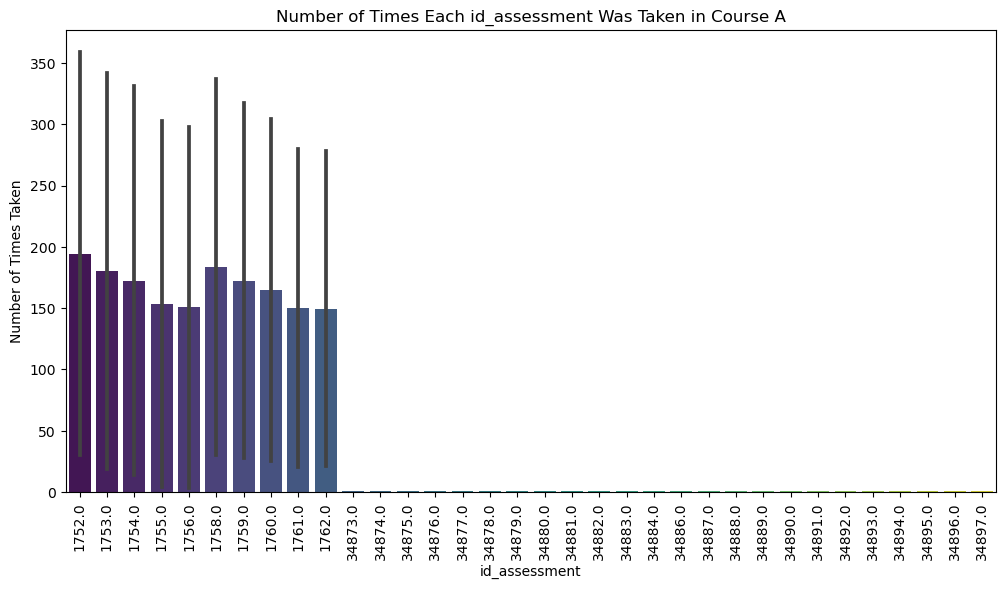

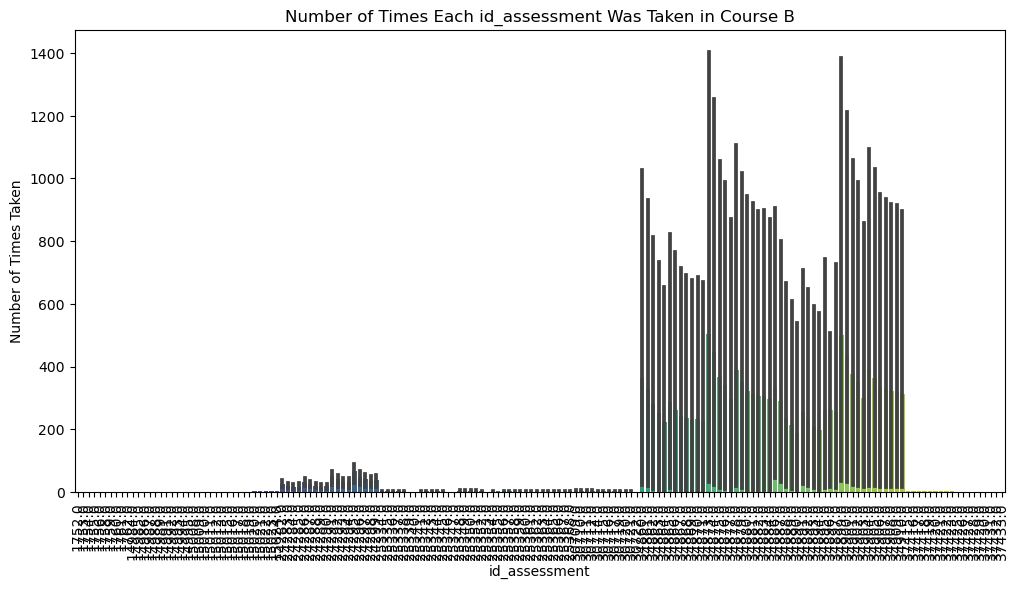

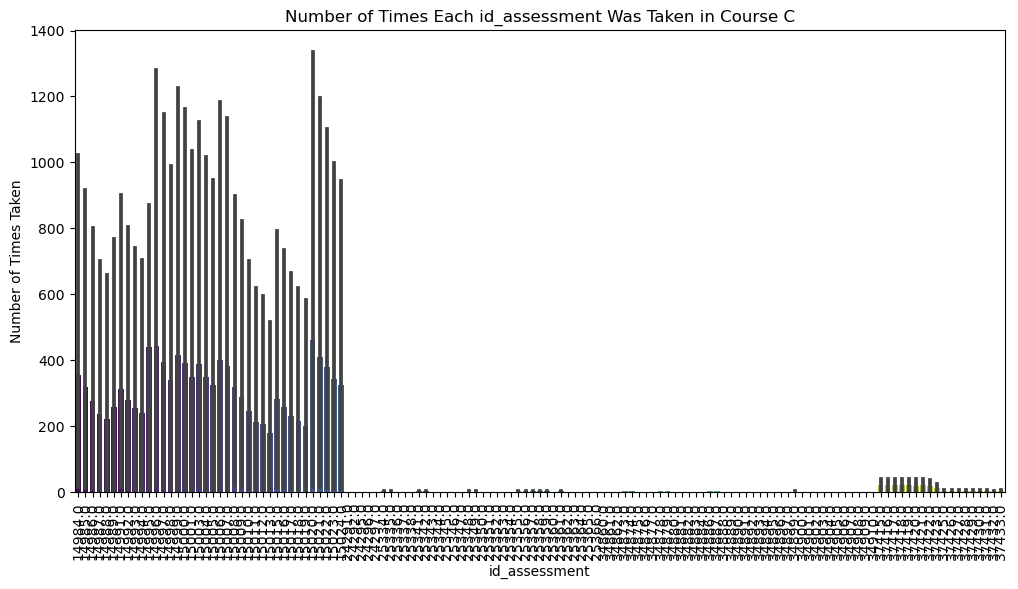

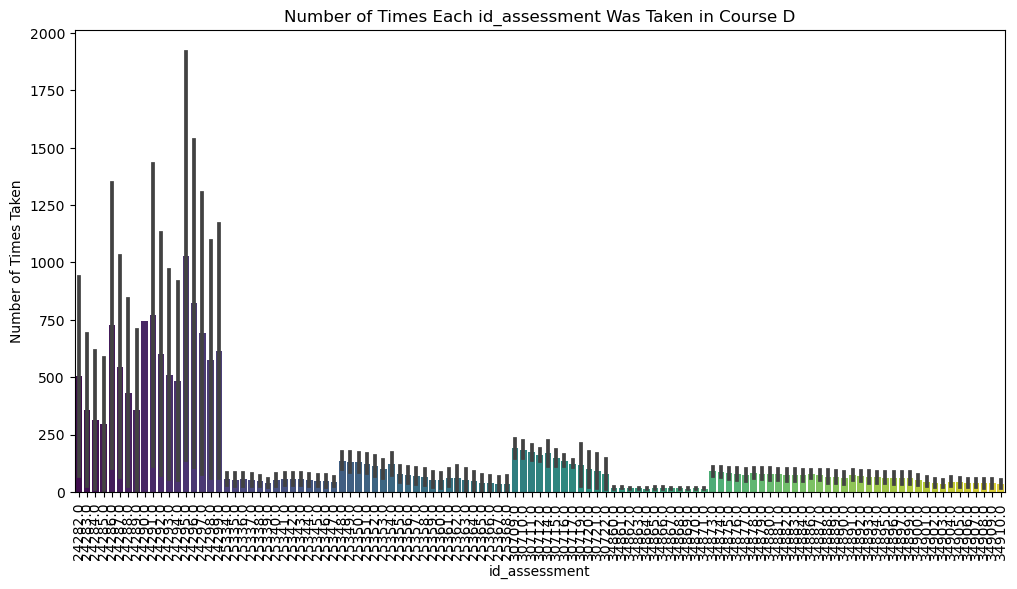

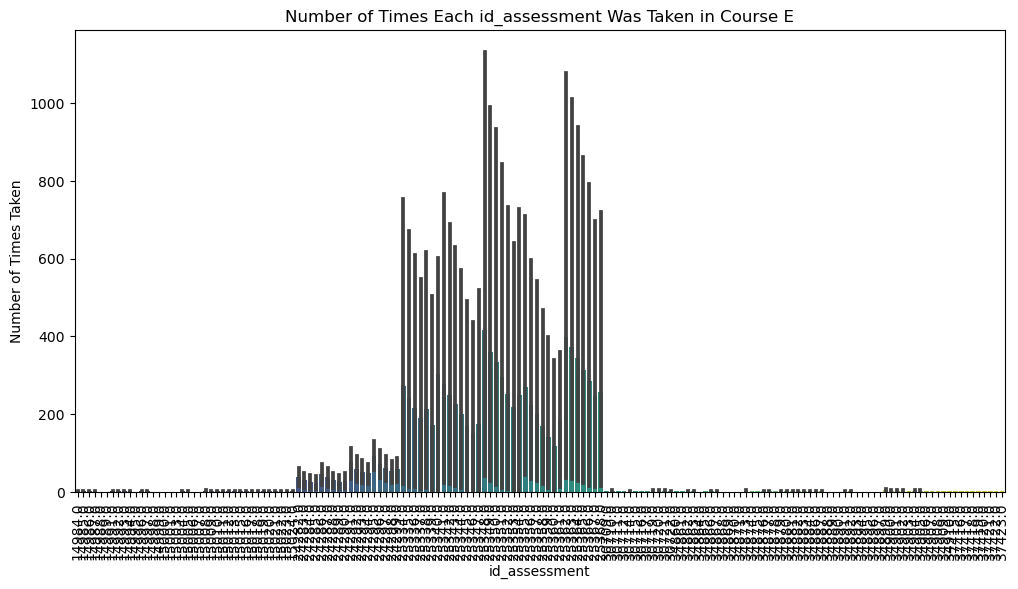

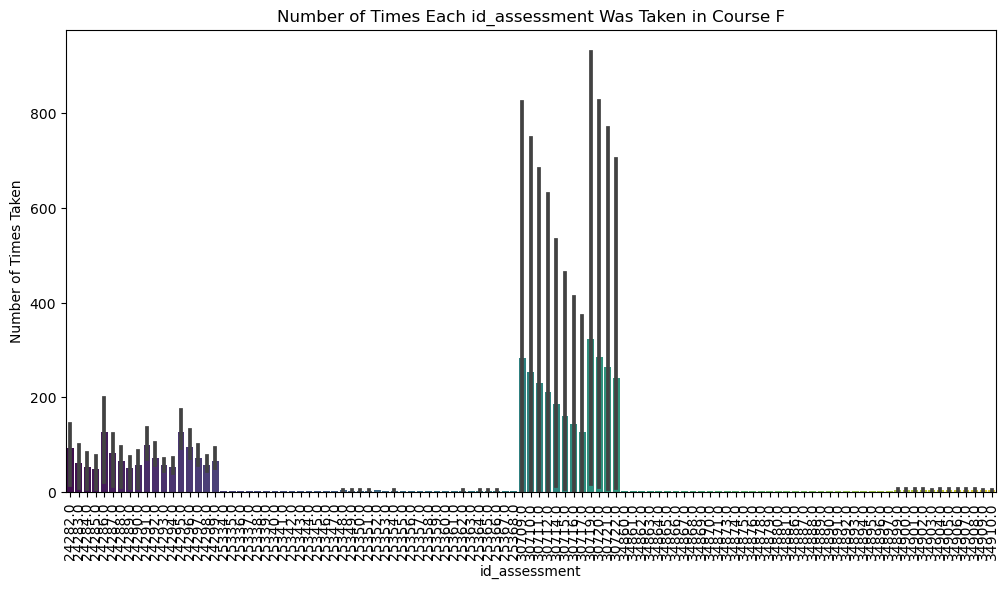

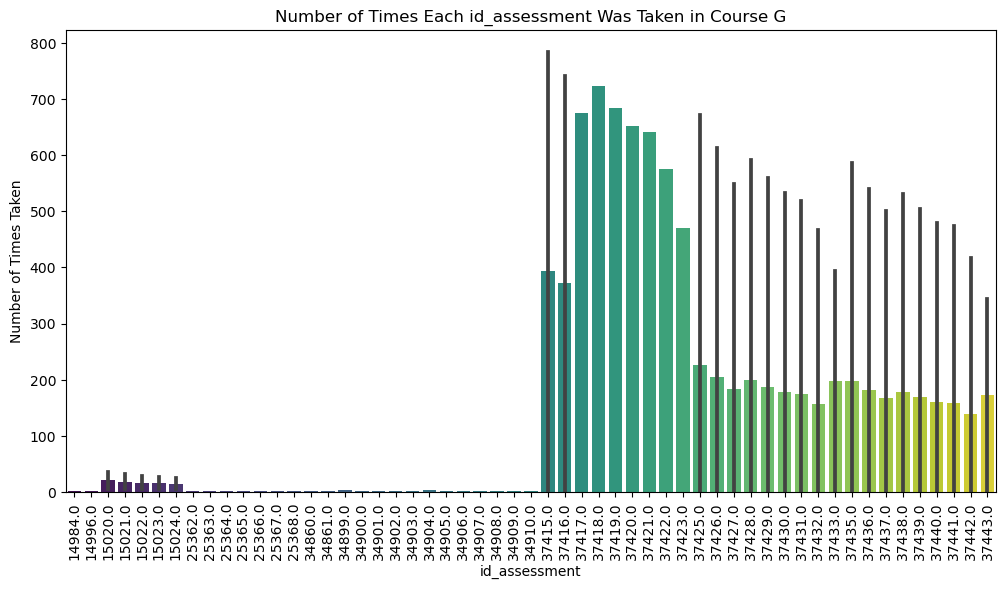

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique modules
unique_modules = student_data_merged['course'].str[0].unique()

# Create datasets and plot for each module
for module in unique_modules:
    module_data = assessment_counts[assessment_counts['course'].str.startswith(module)]
    module_data = module_data[['course', 'id_assessment', 'count']]
    
    # Save the dataset to a CSV file
    module_data.to_csv(f'Course{module}.csv', index=False)
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    sns.barplot(data=module_data, x='id_assessment', y='count', palette='viridis')
    plt.title(f'Number of Times Each id_assessment Was Taken in Course {module}')
    plt.xlabel('id_assessment')
    plt.ylabel('Number of Times Taken')
    plt.xticks(rotation=90)
    plt.show()


In [135]:
unique_modules

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [136]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Filter for weights that are not double digits (less than 10 or greater than 99)
non_double_digit_weights = student_data_merged[(student_data_merged['weight'] < 10) | (student_data_merged['weight'] >= 100)]

# Get the unique id_assessment values with non-double digit weights
unique_non_double_digit_weights = non_double_digit_weights['id_assessment'].unique()

# Display the result
print(f'id_assessments with non-double digit weights: {unique_non_double_digit_weights}')


id_assessments with non-double digit weights: [34891. 34892. 34893. 34894. 34895. 34896. 34897. 34878. 34879. 34880.
 34881. 34882. 34883. 34884. 14984. 14991. 14992. 14993. 14994. 14995.
 15008. 15015. 15016. 15017. 14996. 15003. 15004. 15005. 15006. 15007.
 15020. 15018. 15019. 37415. 37416. 37417. 37418. 37419. 37420. 37421.
 37422. 37423. 25362. 24291. 24295. 24296. 24297. 25334. 25341. 25342.
 37425. 37426. 37427. 37428. 37429. 37430. 37431. 37432. 37433. 25354.
 25343. 25344. 25345. 25346. 25347. 25361. 34904. 34905. 34907. 34908.
 34909. 34910. 34906. 24286. 24287. 24282. 24288. 24289. 24290. 25340.
 34865. 34866. 34867. 34868. 34869. 34870. 34871. 24298. 24299. 25368.
 37435. 37436. 37437. 37438. 37439. 37440. 37441. 37442. 37443.]


In [137]:
import pandas as pd

# Assuming student_data_merged is your DataFrame
# Filter for weights that are not double digits (less than 10 or greater than 99)
non_double_digit_weights = student_data_merged[(student_data_merged['weight'] < 10) | (student_data_merged['weight'] >= 100)]

# Display the id_assessment and their corresponding non-double digit weights
non_double_digit_weights_summary = non_double_digit_weights[['id_assessment', 'weight']].drop_duplicates()

# Display the result
print(non_double_digit_weights_summary)


        id_assessment  weight
9131          34891.0     0.0
10301         34892.0     0.0
11369         34893.0     0.0
12340         34894.0     0.0
13270         34895.0     0.0
...               ...     ...
205087        37439.0     0.0
205595        37440.0     0.0
206078        37441.0     0.0
206555        37442.0     0.0
206974        37443.0     0.0

[99 rows x 2 columns]


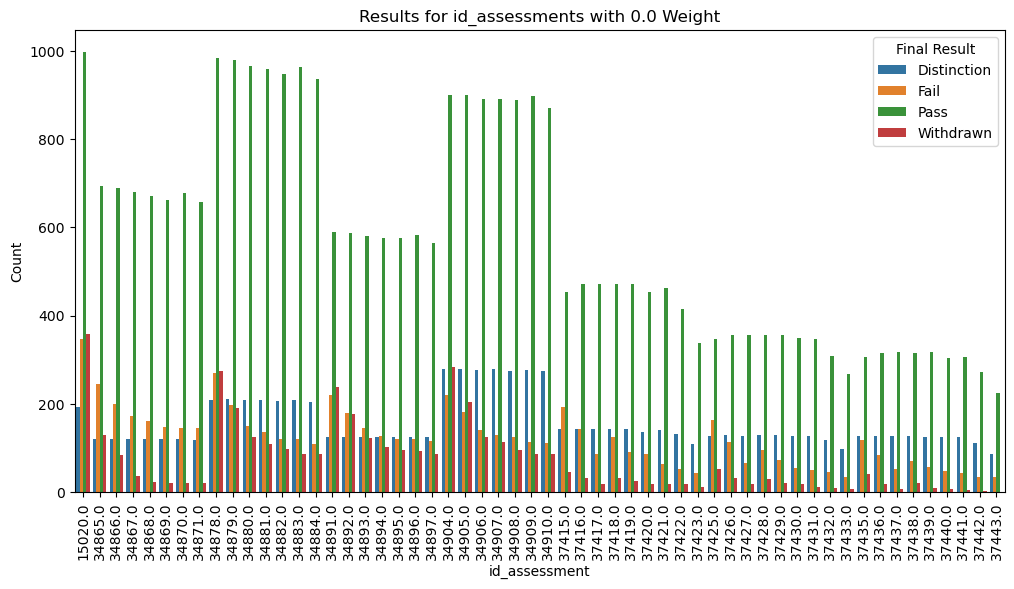

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming student_data_merged is your DataFrame

# Step 1: Filter for id_assessments with a weight of 0.0
zero_weight_assessments = student_data_merged[student_data_merged['weight'] == 0.0]

# Step 2: Count the results for the assessments with a weight of 0.0
result_counts = zero_weight_assessments.groupby(['id_assessment', 'final_result']).size().reset_index(name='count')

# Step 3: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=result_counts, x='id_assessment', y='count', hue='final_result')
plt.title('Results for id_assessments with 0.0 Weight')
plt.xlabel('id_assessment')
plt.ylabel('Count')
plt.legend(title='Final Result')
plt.xticks(rotation=90)
plt.show()


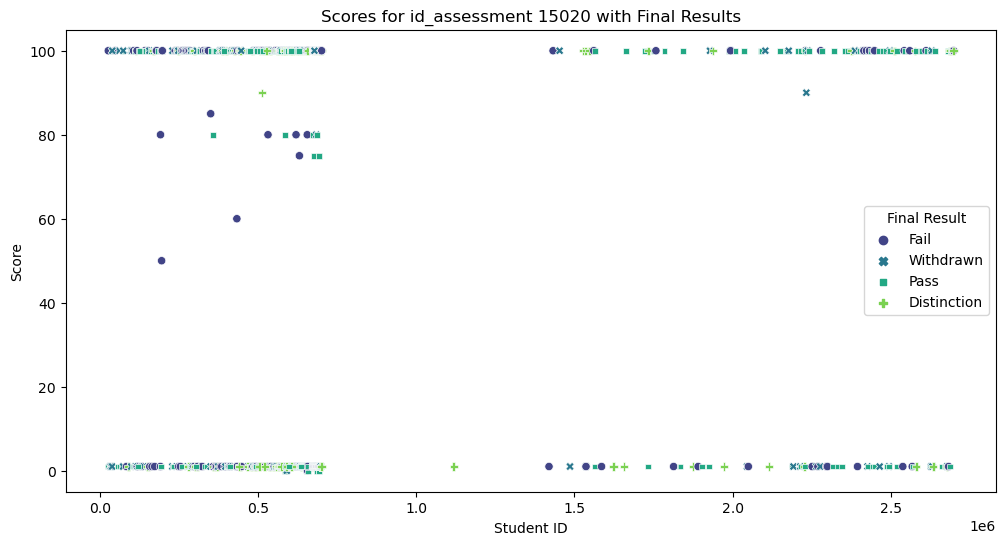

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming student_data_merged is your DataFrame

# Step 1: Filter for id_assessment 15020
assessment_15020_data = student_data_merged[student_data_merged['id_assessment'] == 15020]

# Step 2: Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=assessment_15020_data, x='id_student', y='score', hue='final_result', palette='viridis', style='final_result')
plt.title('Scores for id_assessment 15020 with Final Results')
plt.xlabel('Student ID')
plt.ylabel('Score')
plt.legend(title='Final Result')
plt.show()


  course  id_assessment  count
0    AQ2         1752.0    359
1    AQ2         1753.0    342
2    AQ2         1754.0    331
3    AQ2         1755.0    303
4    AQ2         1756.0    298


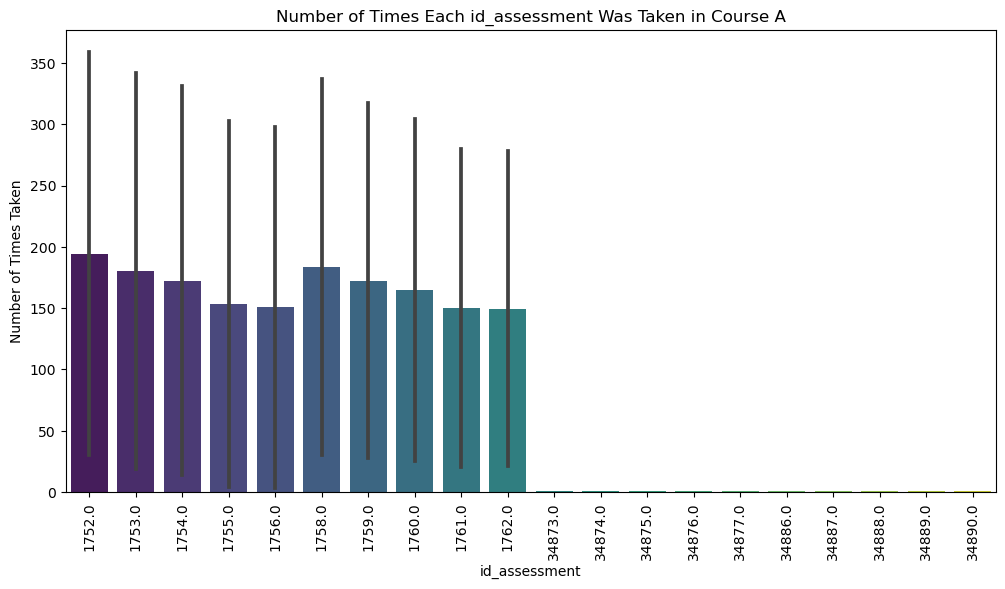

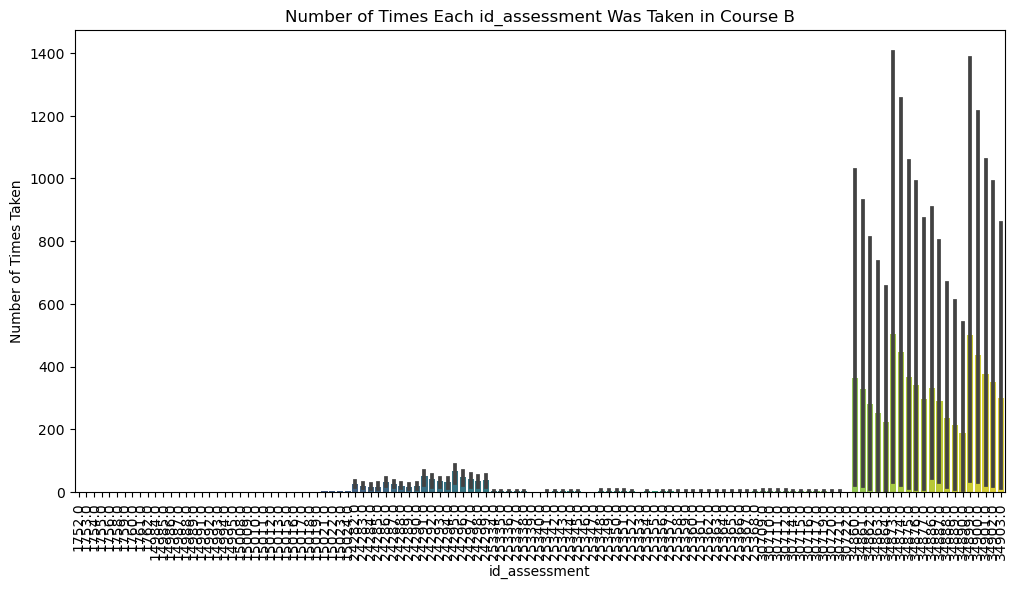

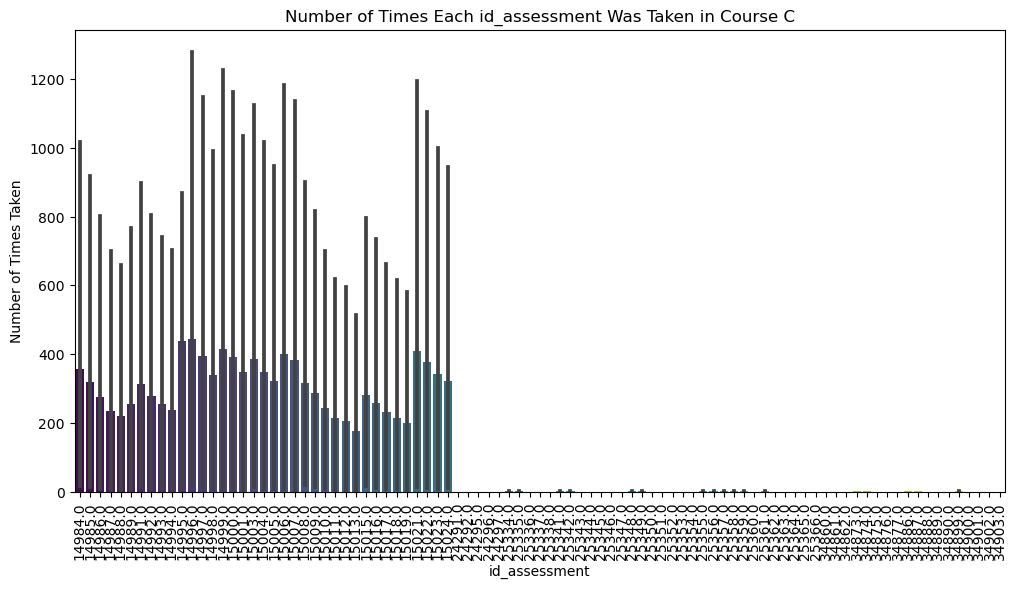

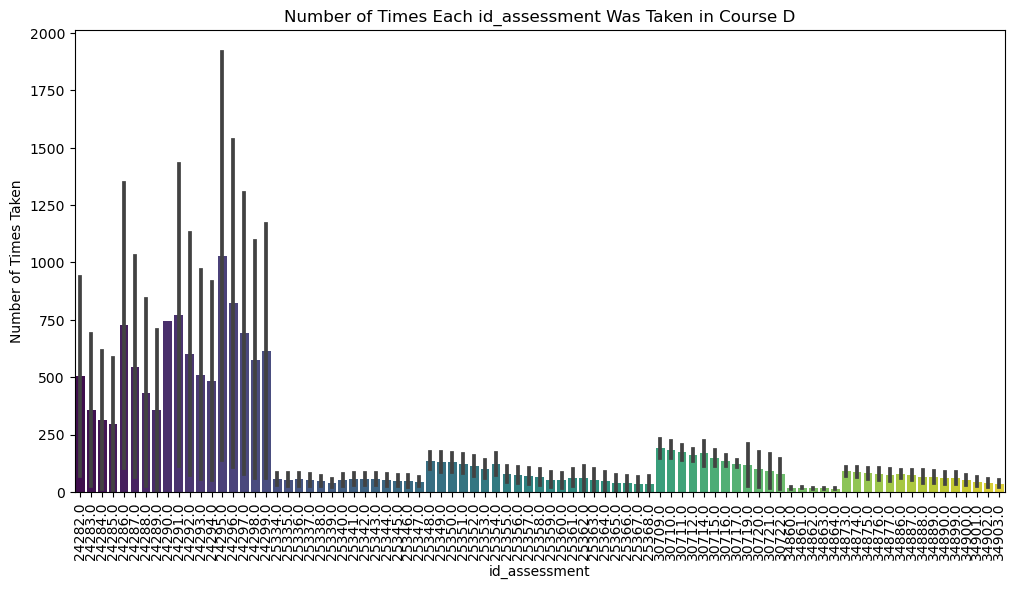

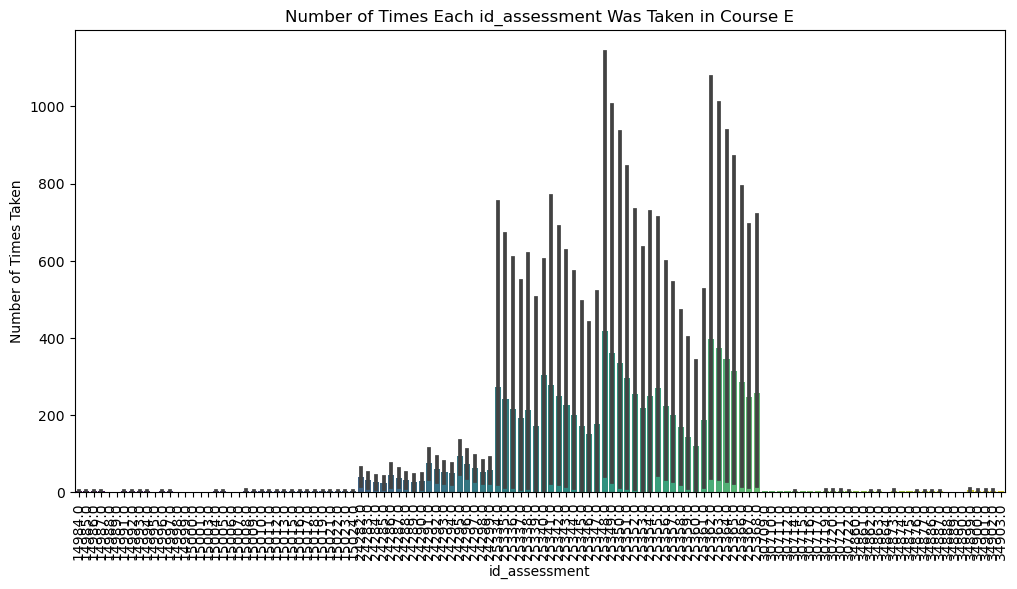

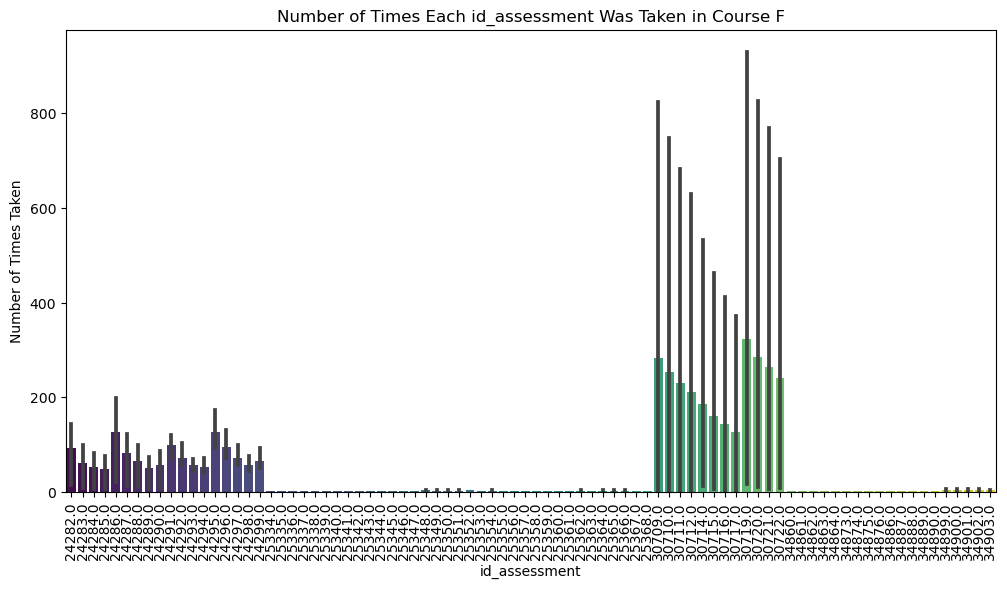

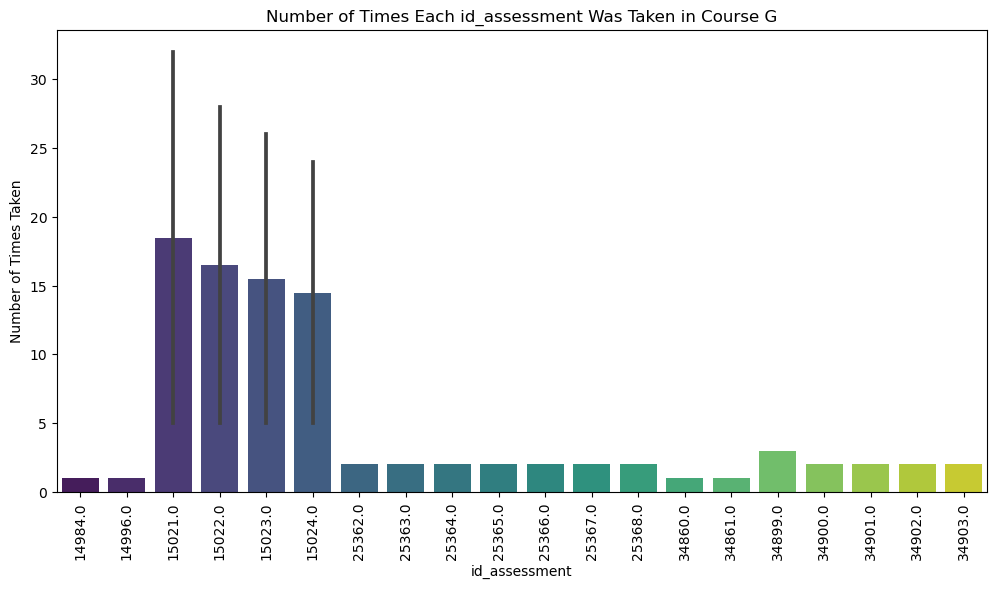

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming student_data_merged is your DataFrame
# Step 1: Filter out rows with weight 0.0
filtered_data = student_data_merged[student_data_merged['weight'] != 0.0]

# Step 2: Count the number of times each id_assessment has been taken within each course
assessment_counts = filtered_data.groupby(['course', 'id_assessment']).size().reset_index(name='count')

# Display the result
print(assessment_counts.head())

# Step 3: Create and save graphs for each course
# Get unique courses
unique_courses = filtered_data['course'].str[0].unique()

# Create datasets and plot for each course
for course in unique_courses:
    course_data = assessment_counts[assessment_counts['course'].str.startswith(course)]
    
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=course_data, x='id_assessment', y='count', palette='viridis')
    plt.title(f'Number of Times Each id_assessment Was Taken in Course {course}')
    plt.xlabel('id_assessment')
    plt.ylabel('Number of Times Taken')
    plt.xticks(rotation=90)
    plt.show()


  course  id_assessment  count
0    AQ2         1752.0    359
1    AQ2         1753.0    342
2    AQ2         1754.0    331
3    AQ2         1755.0    303
4    AQ2         1756.0    298


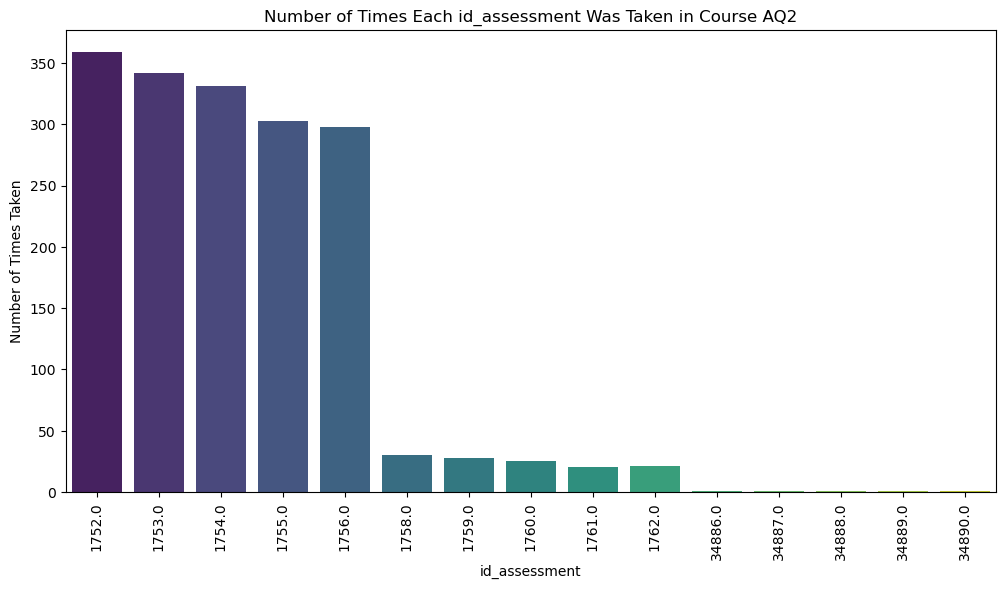

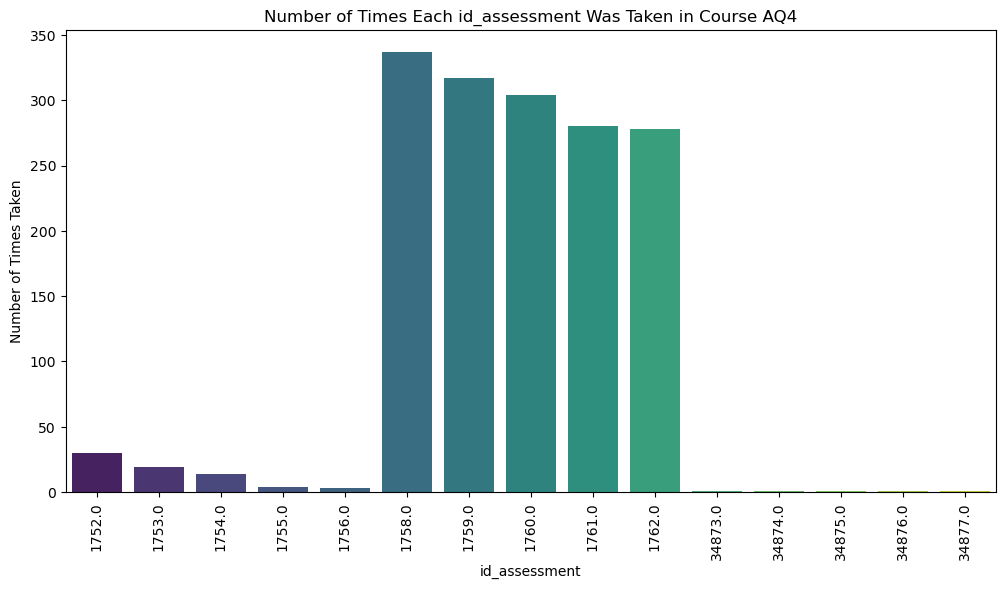

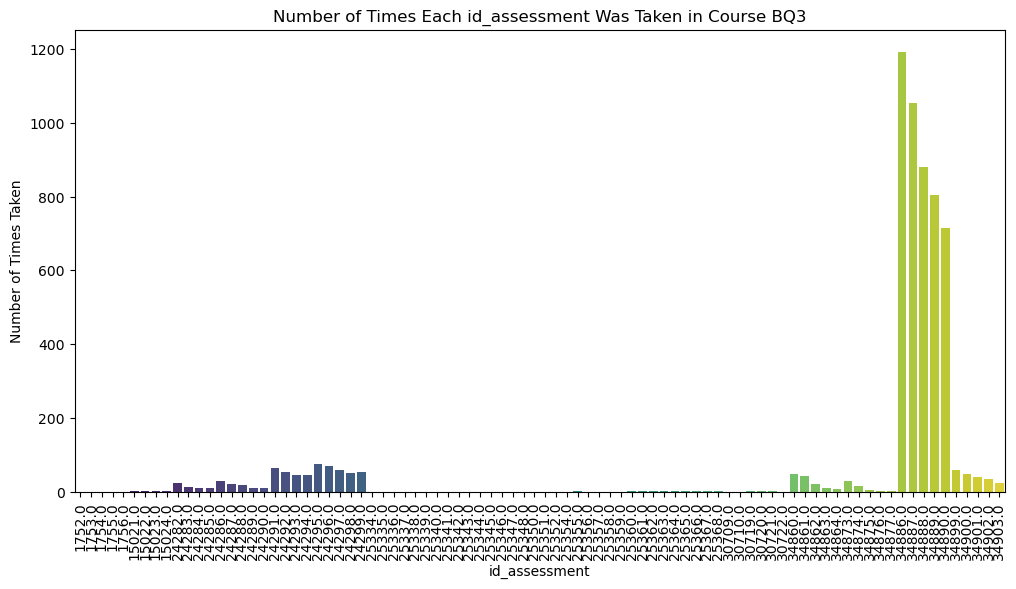

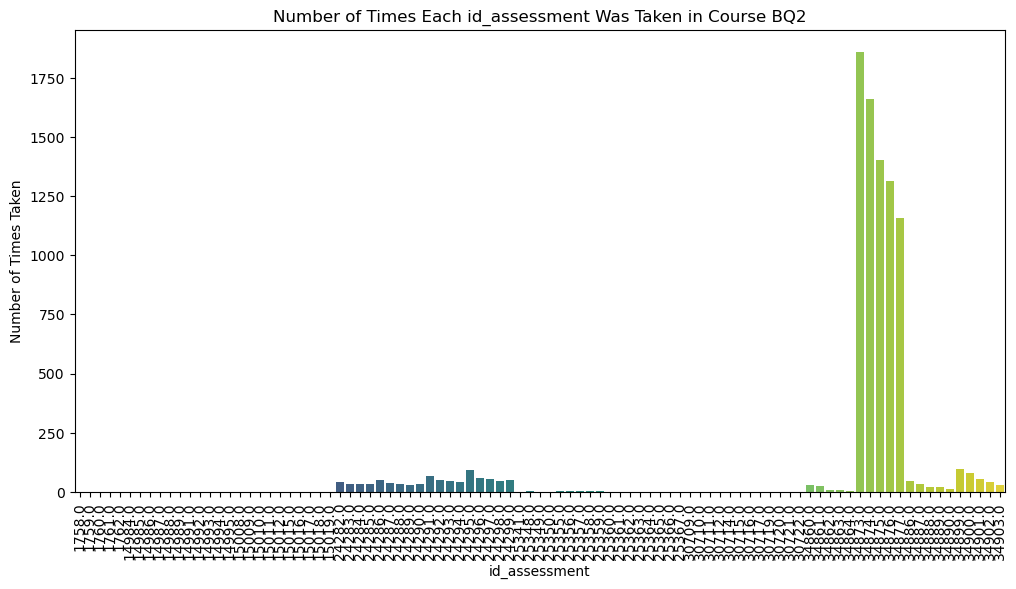

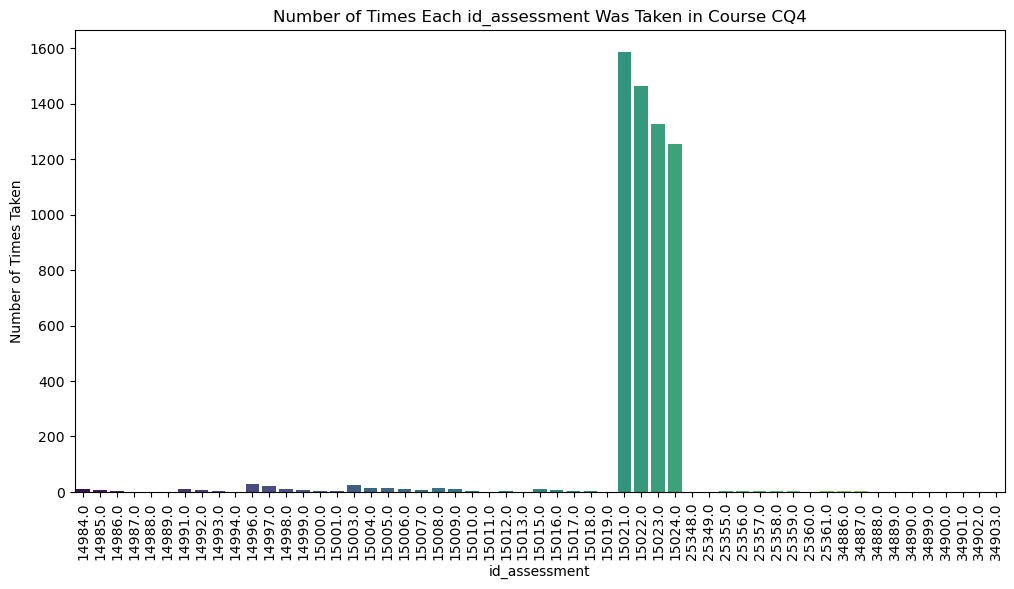

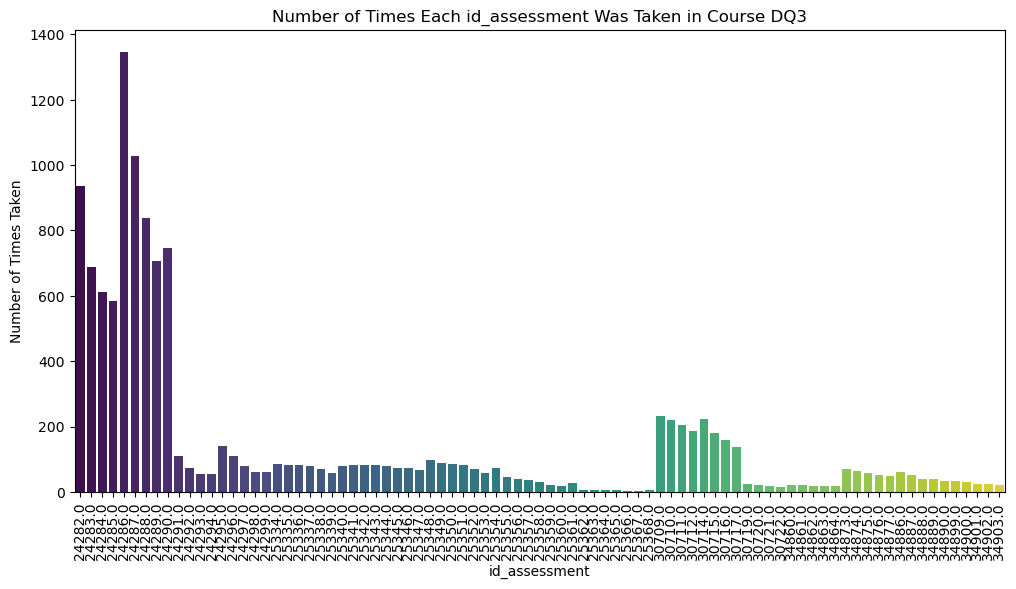

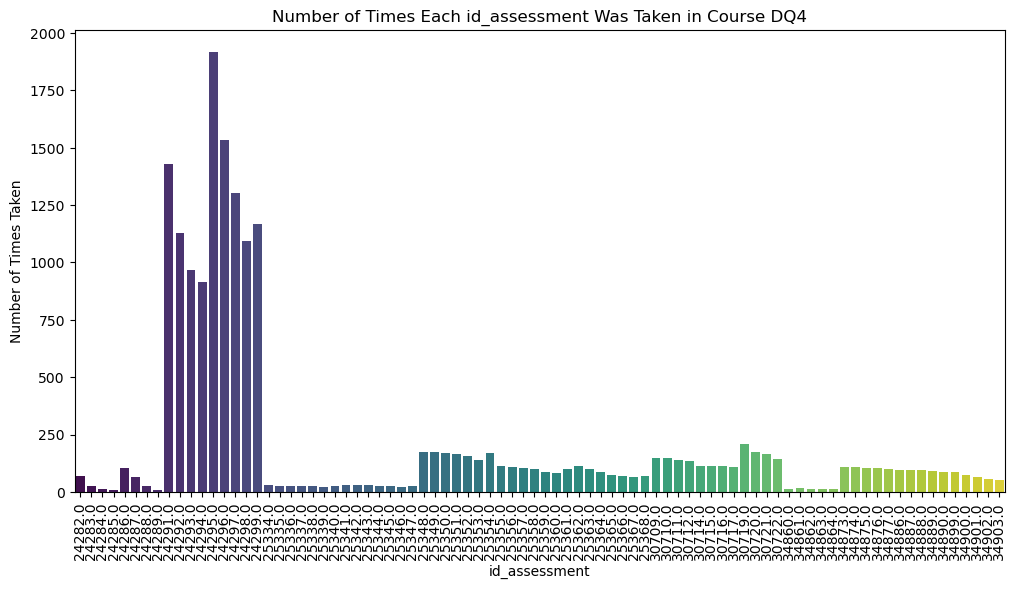

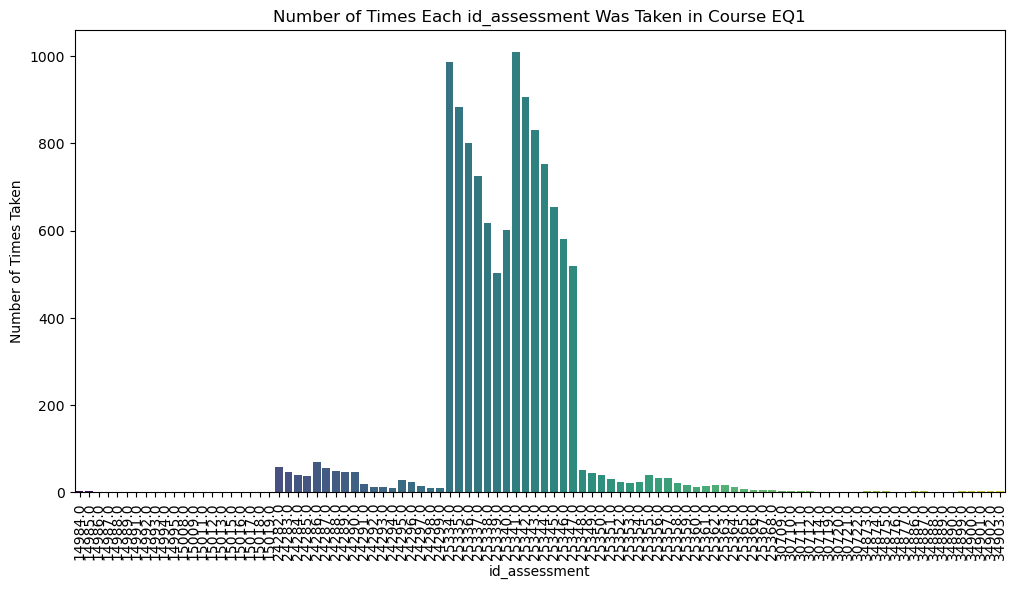

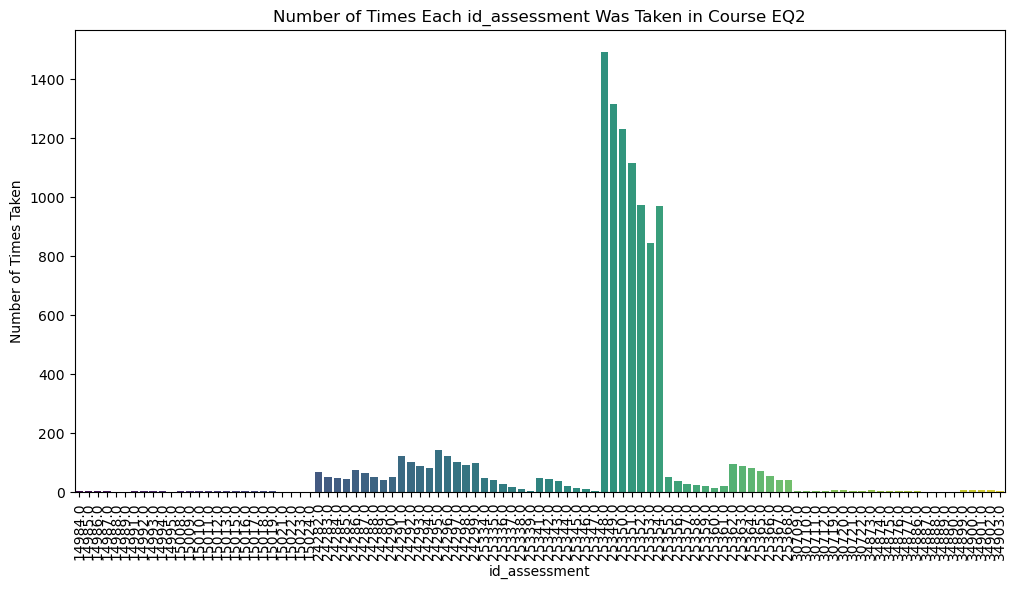

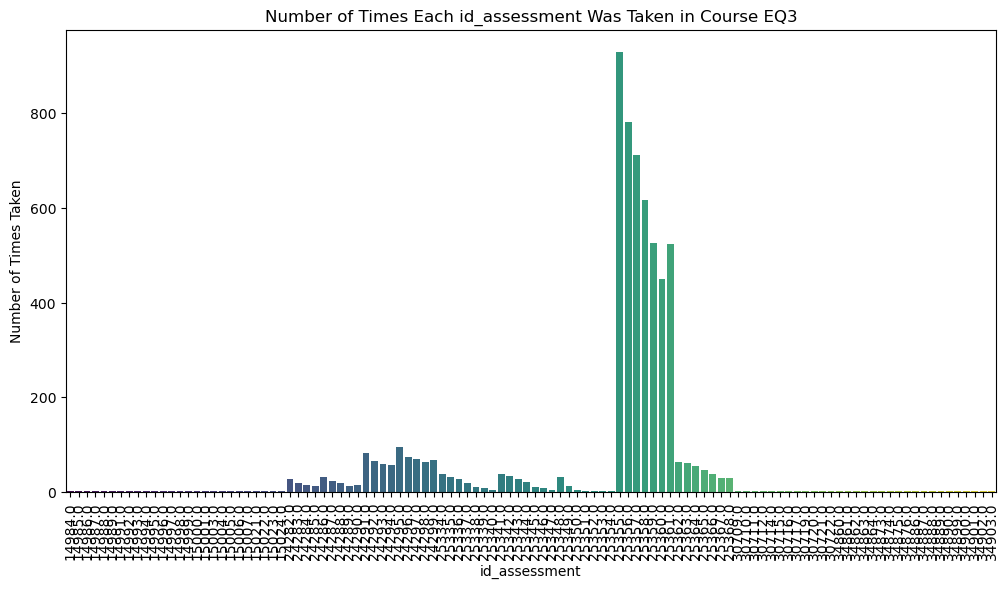

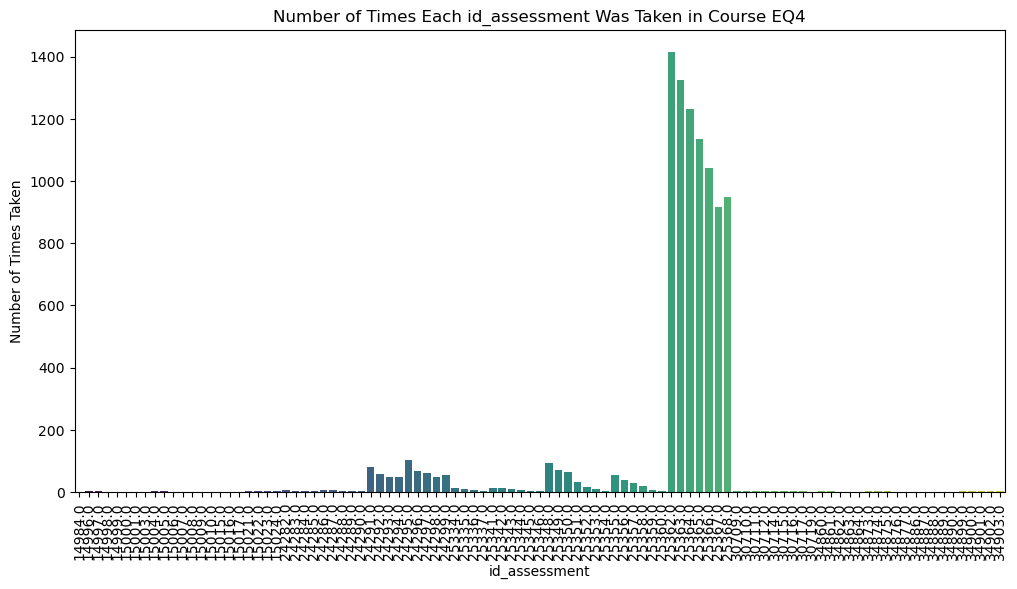

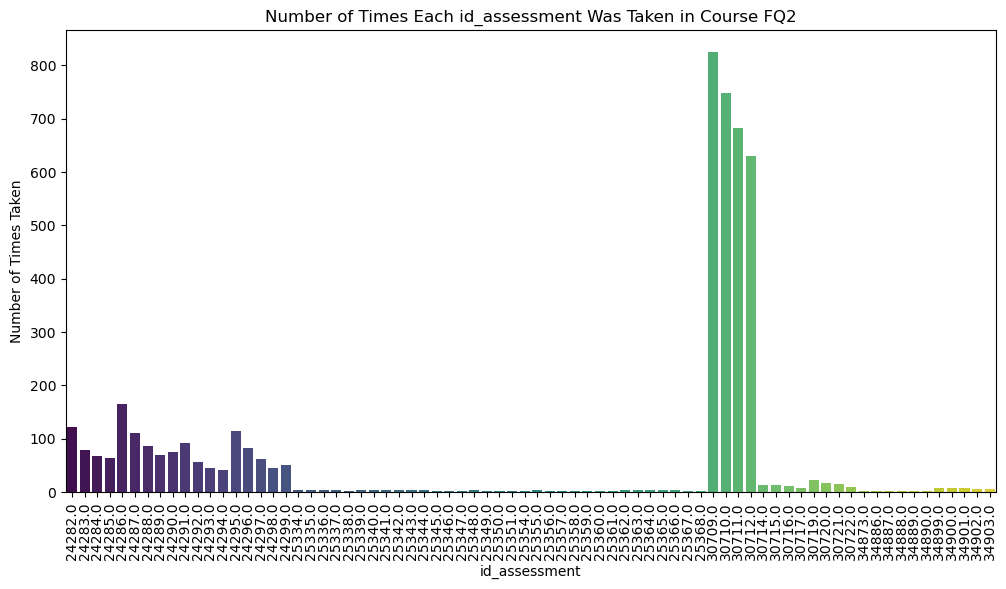

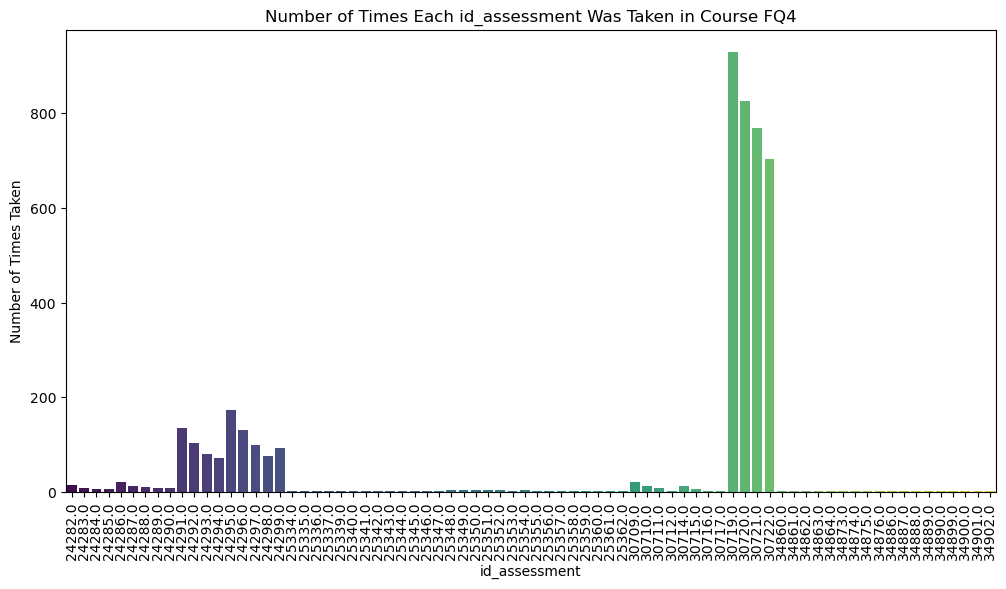

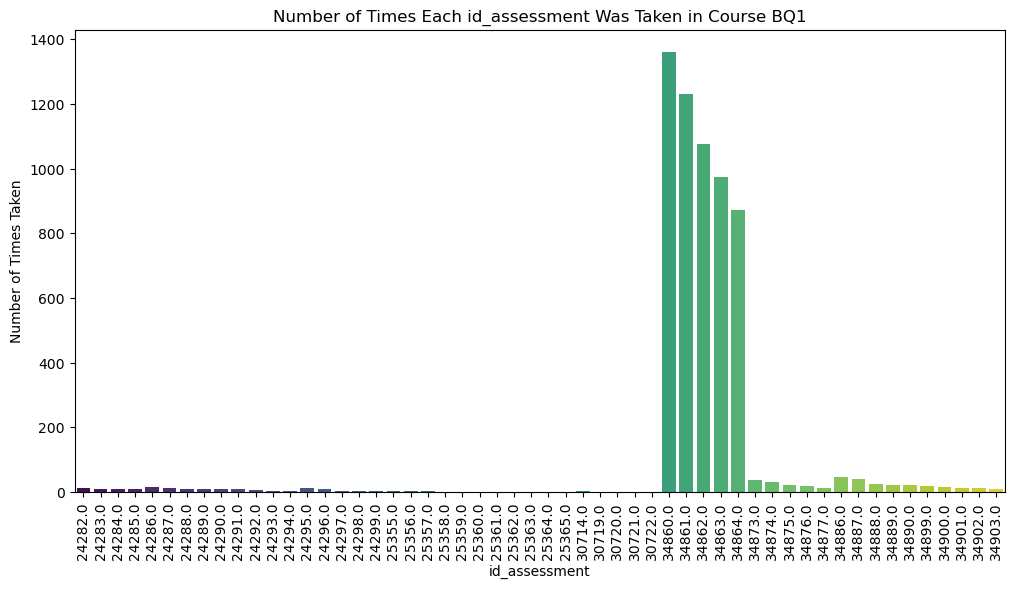

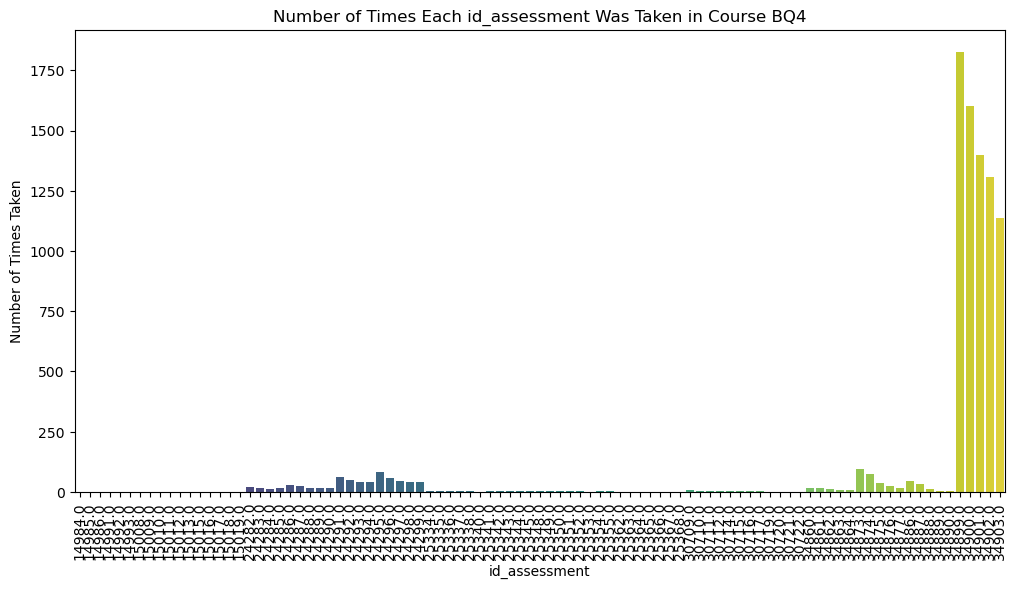

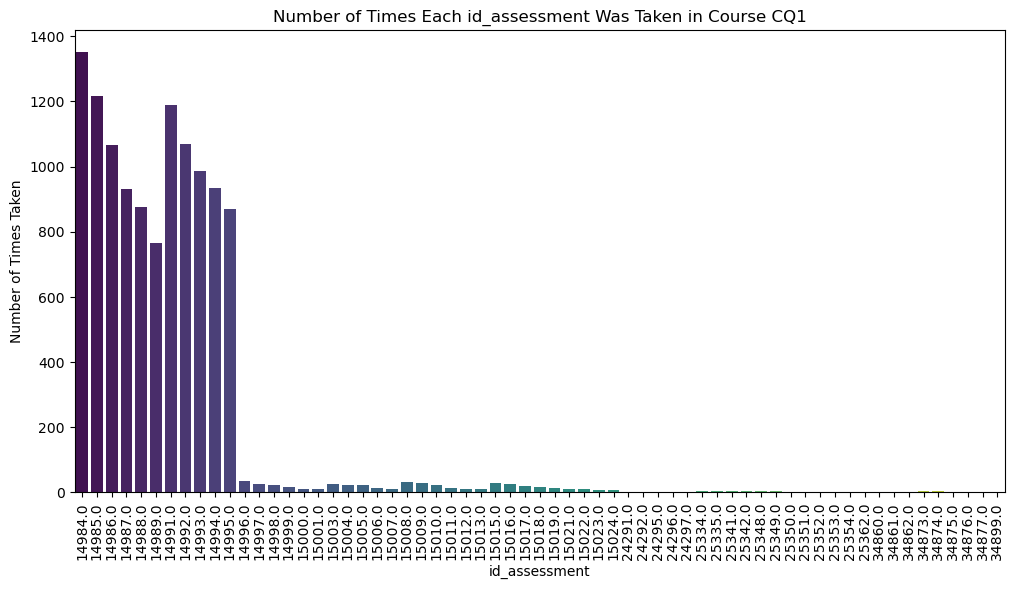

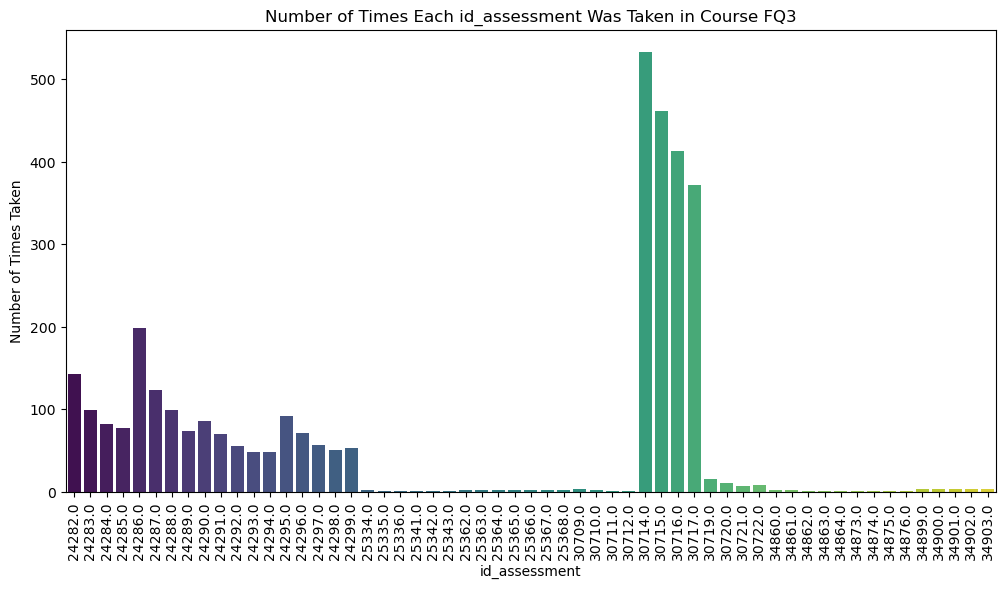

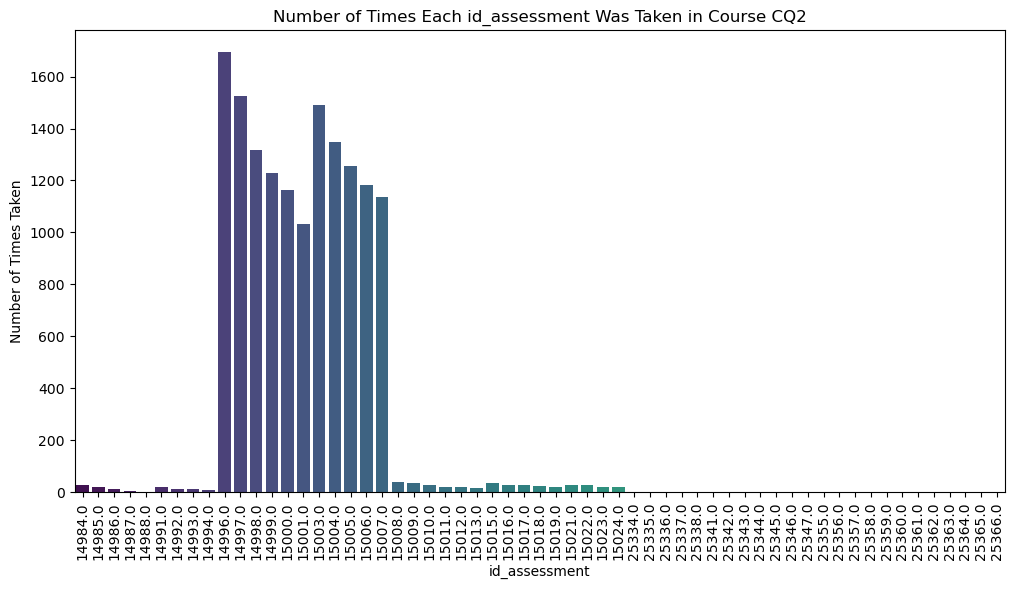

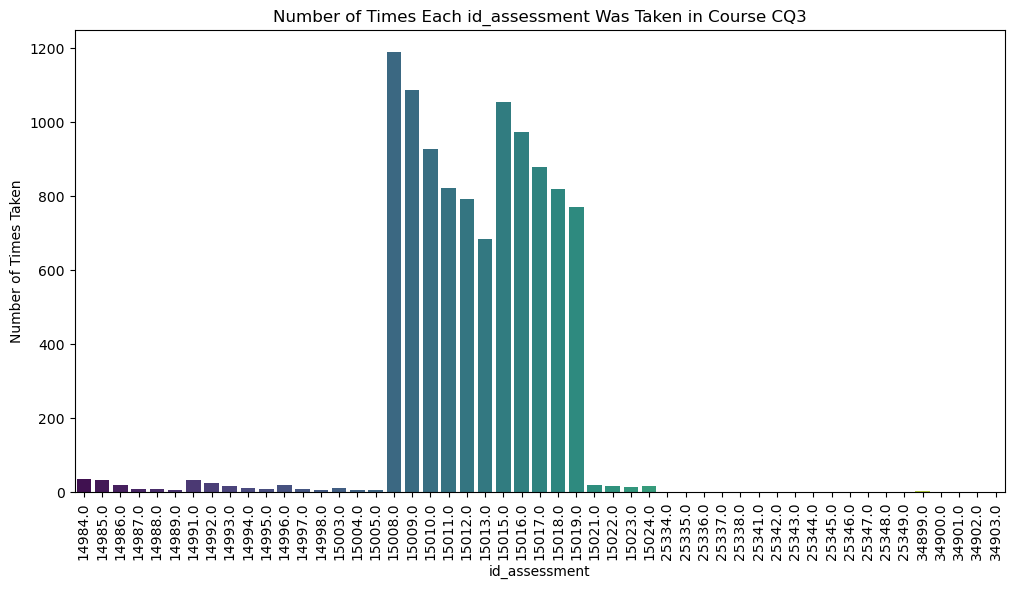

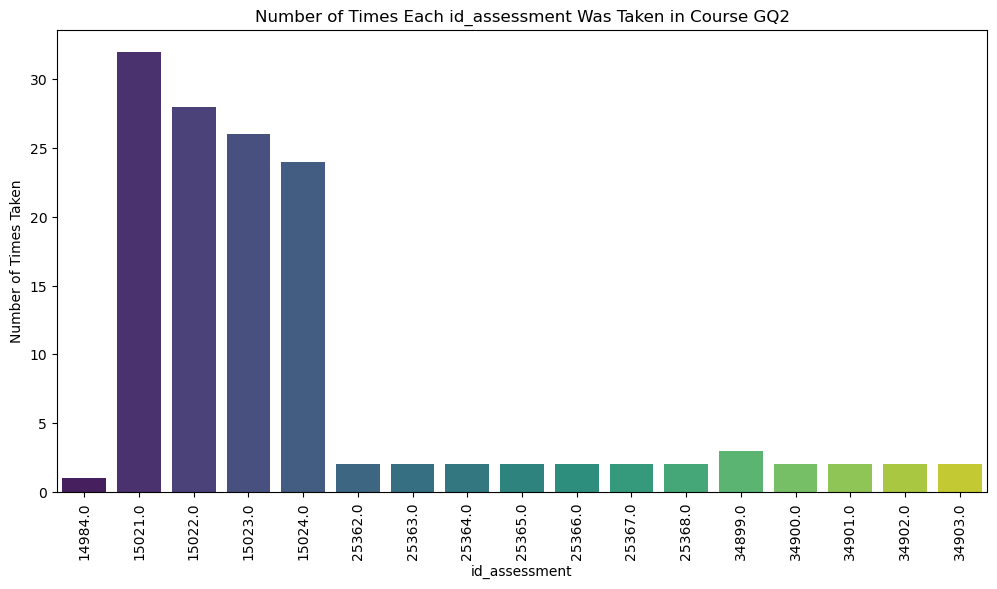

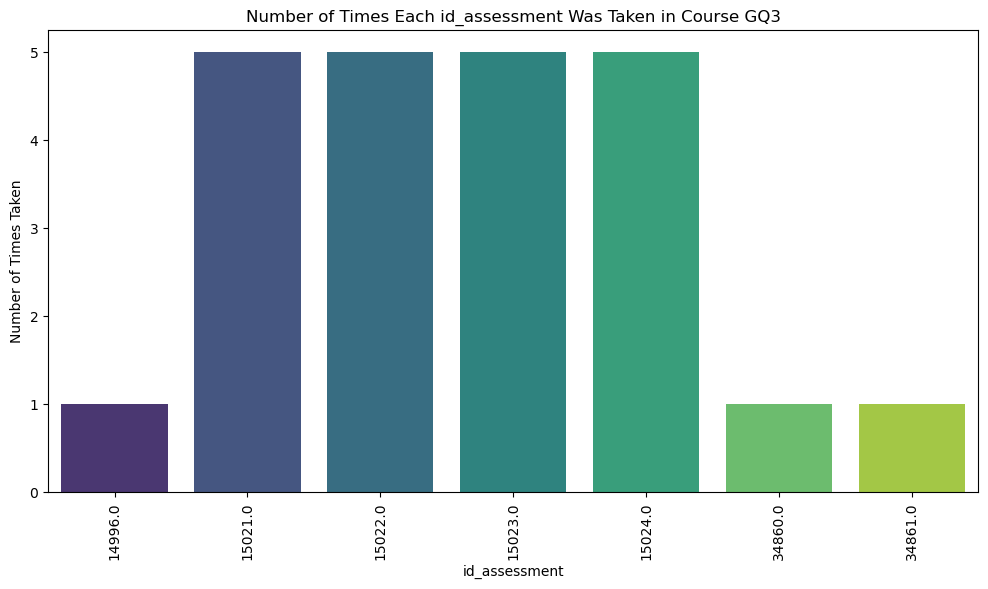

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming student_data_merged is your DataFrame

# Step 1: Filter out rows with weight 0.0
filtered_data = student_data_merged[student_data_merged['weight'] != 0.0]

# Step 2: Count the number of times each id_assessment has been taken within each course
assessment_counts = filtered_data.groupby(['course', 'id_assessment']).size().reset_index(name='count')

# Display the result to verify counts
print(assessment_counts.head())

# Step 3: Create and save graphs for each course
# Get unique courses
unique_courses = filtered_data['course'].unique()

# Create datasets and plot for each course
for course in unique_courses:
    course_data = assessment_counts[assessment_counts['course'] == course]
    
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=course_data, x='id_assessment', y='count', palette='viridis')
    plt.title(f'Number of Times Each id_assessment Was Taken in Course {course}')
    plt.xlabel('id_assessment')
    plt.ylabel('Number of Times Taken')
    plt.xticks(rotation=90)
    plt.show()


  course  id_assessment  count
0    AQ2         1752.0    359
1    AQ2         1753.0    342
2    AQ2         1754.0    331
3    AQ2         1755.0    303
4    AQ2         1756.0    298


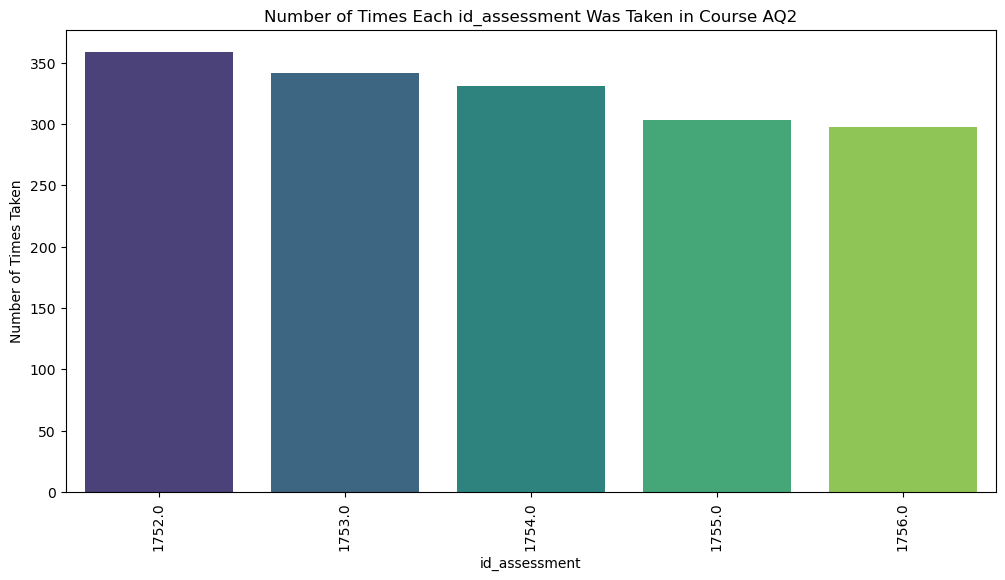

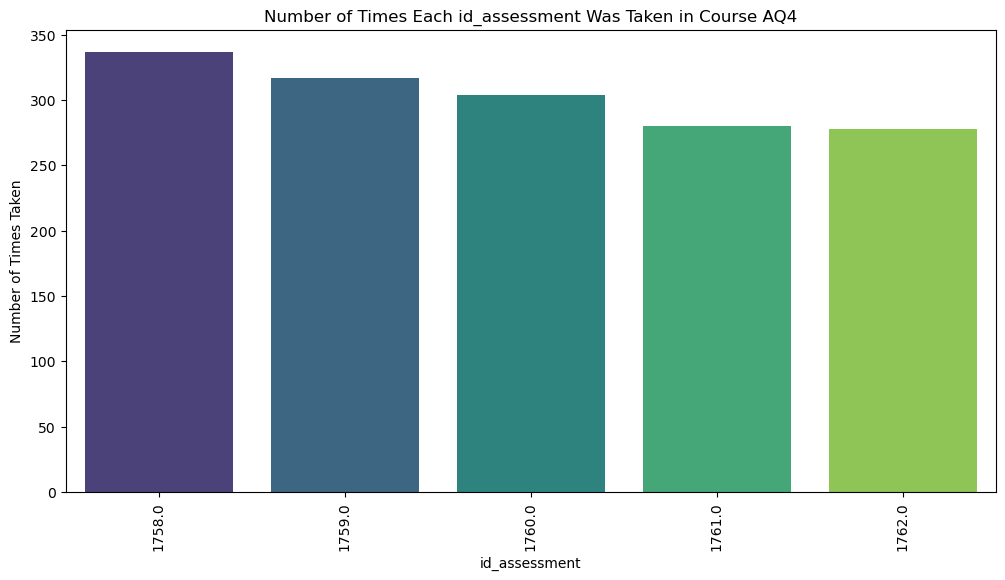

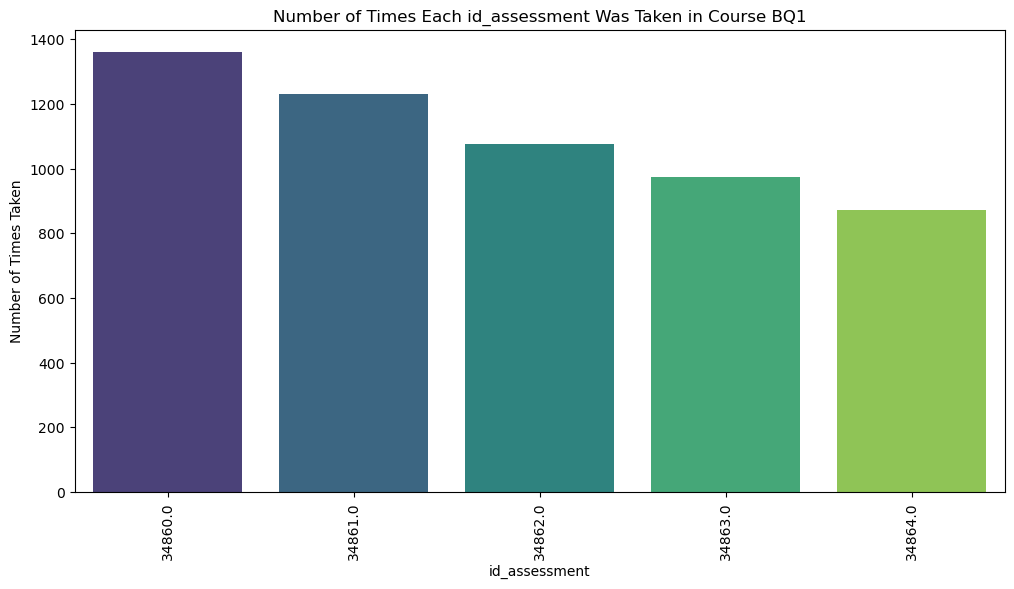

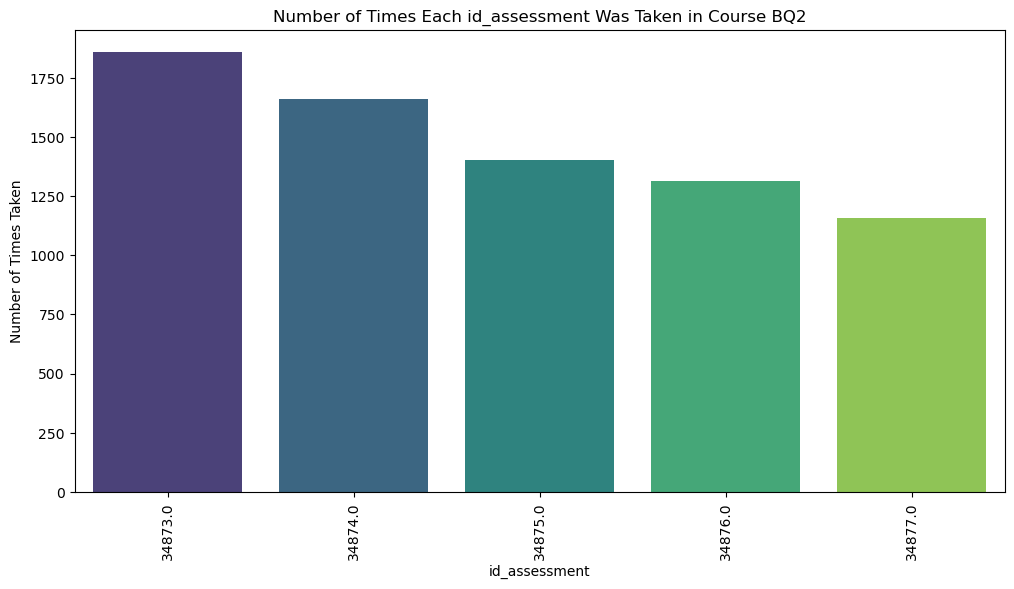

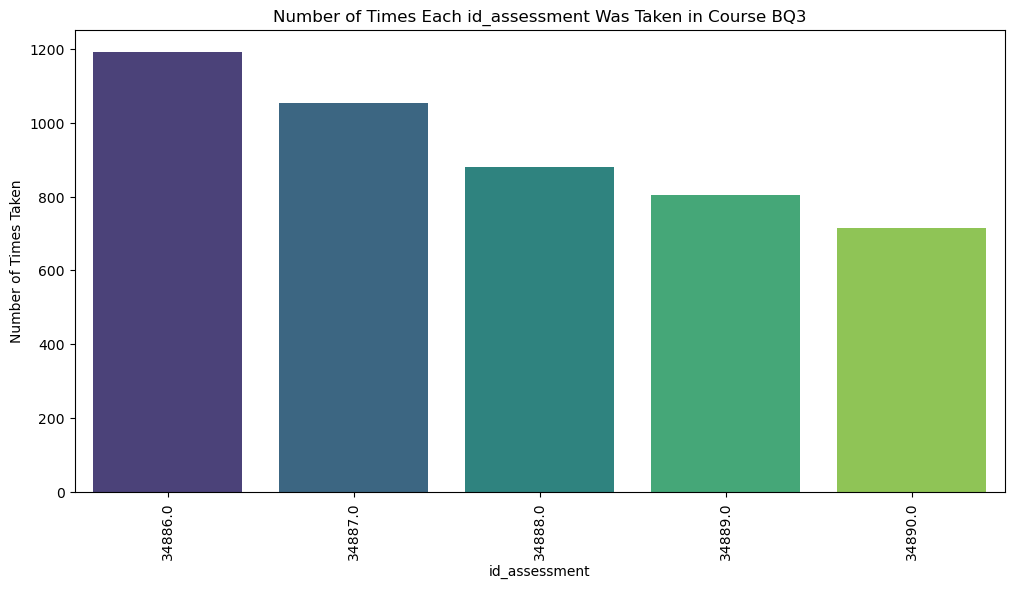

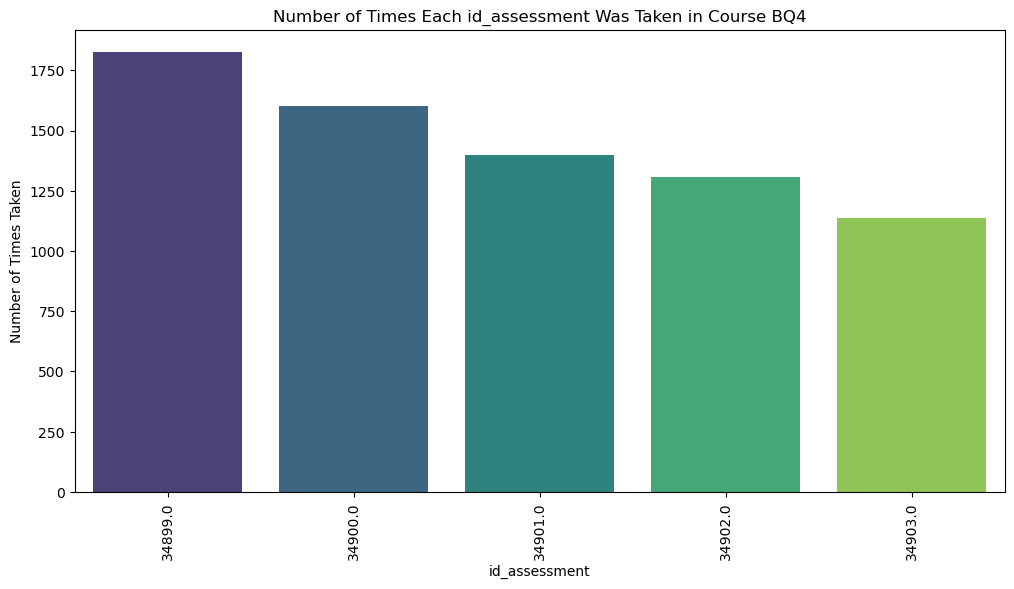

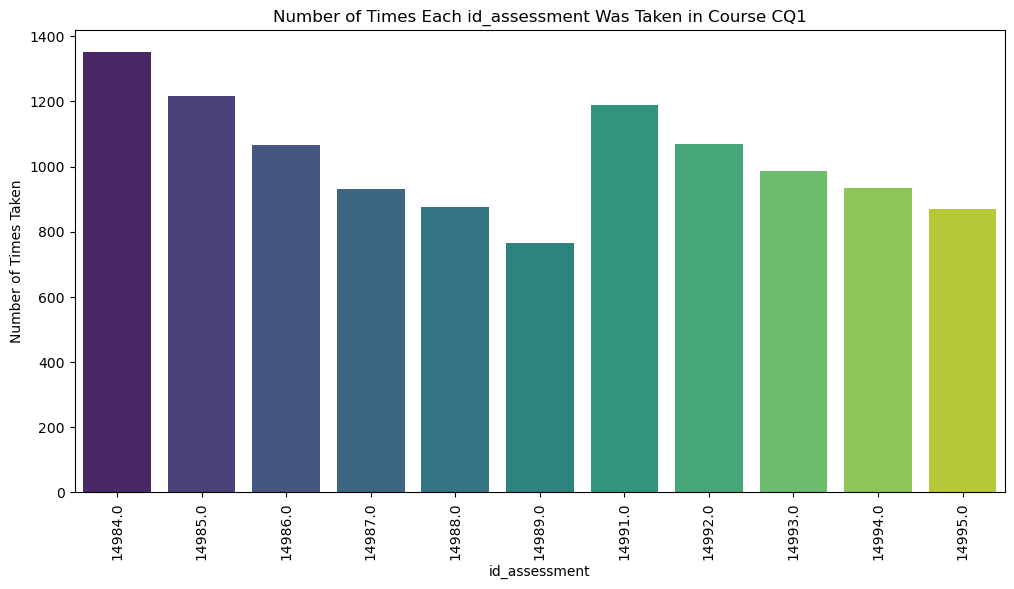

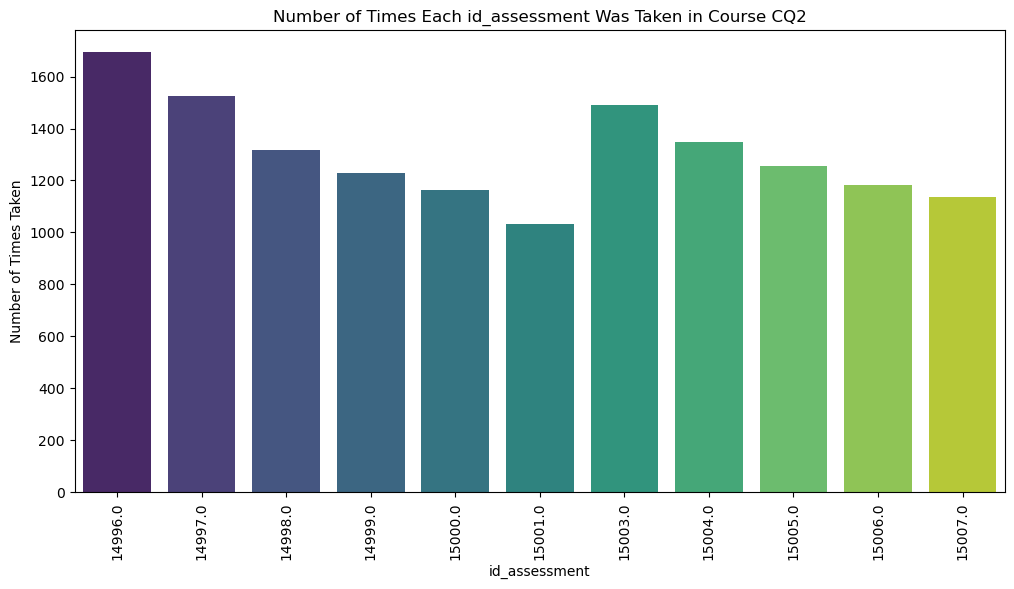

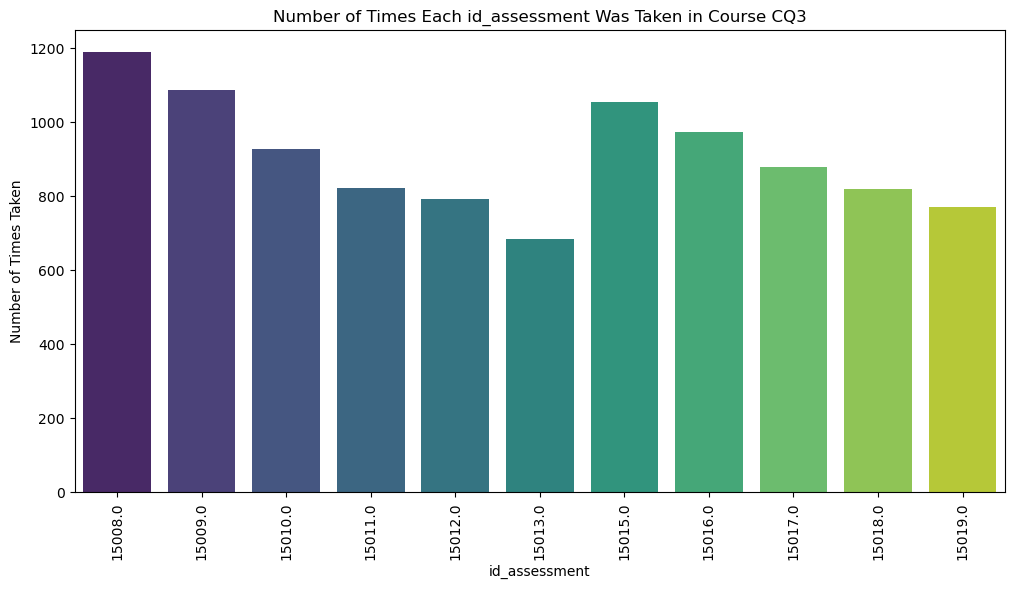

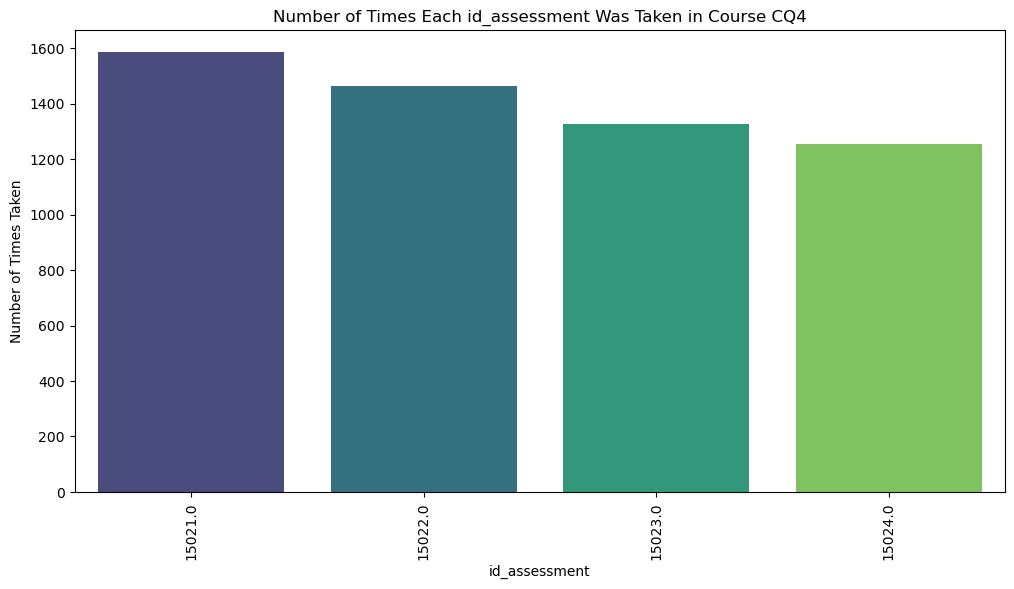

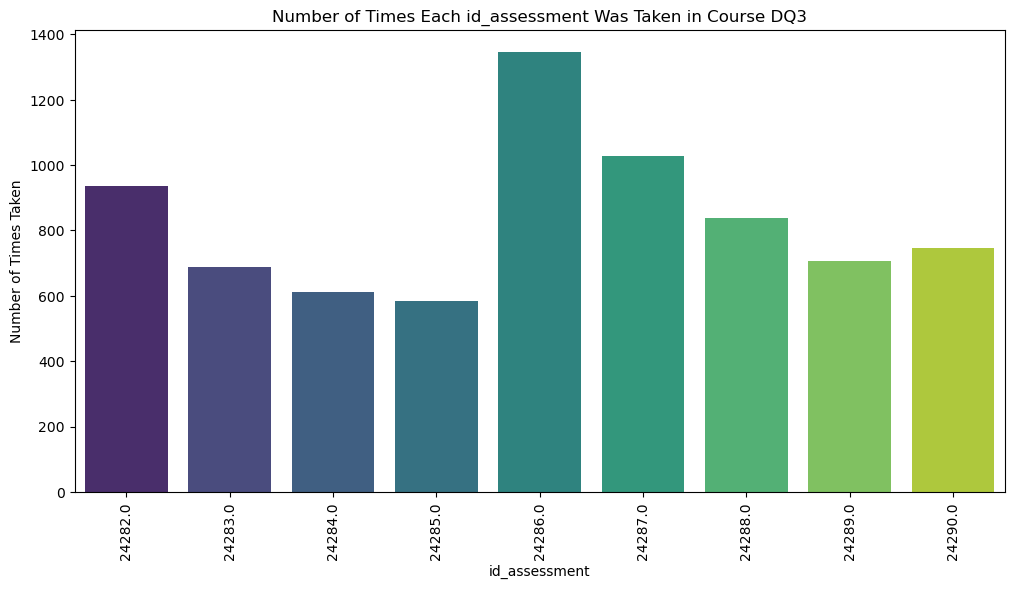

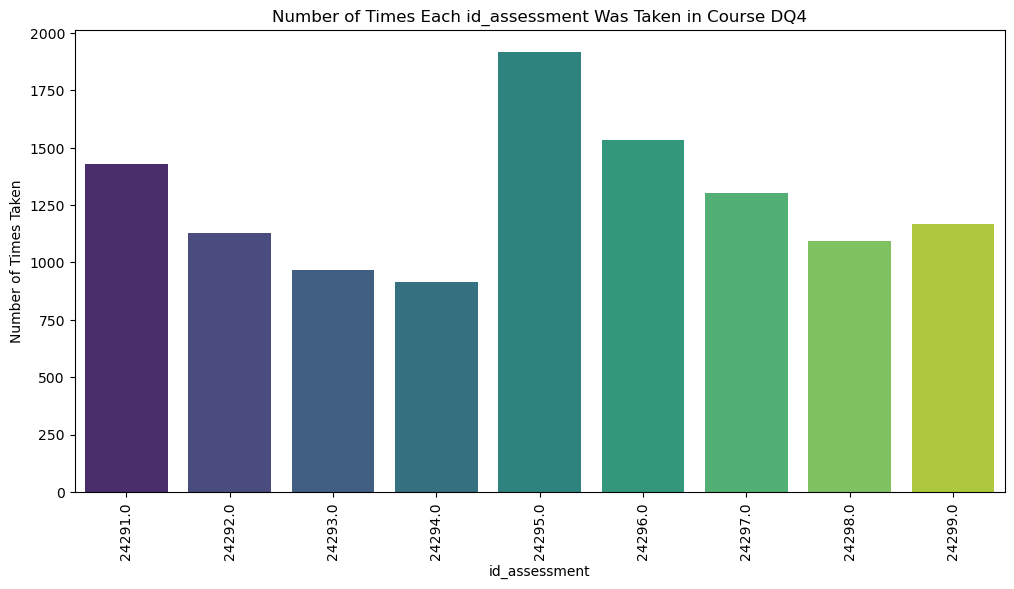

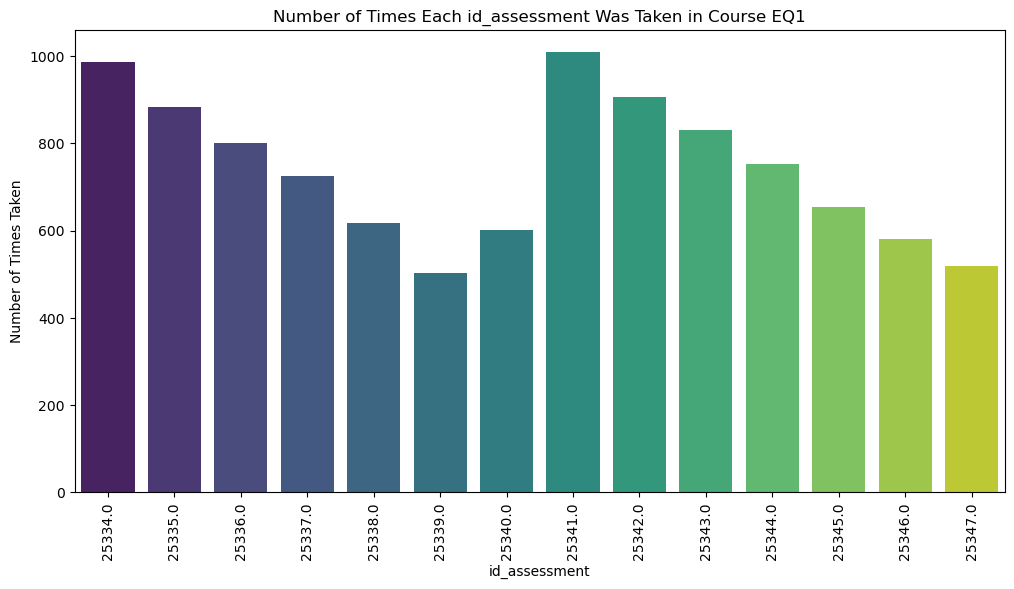

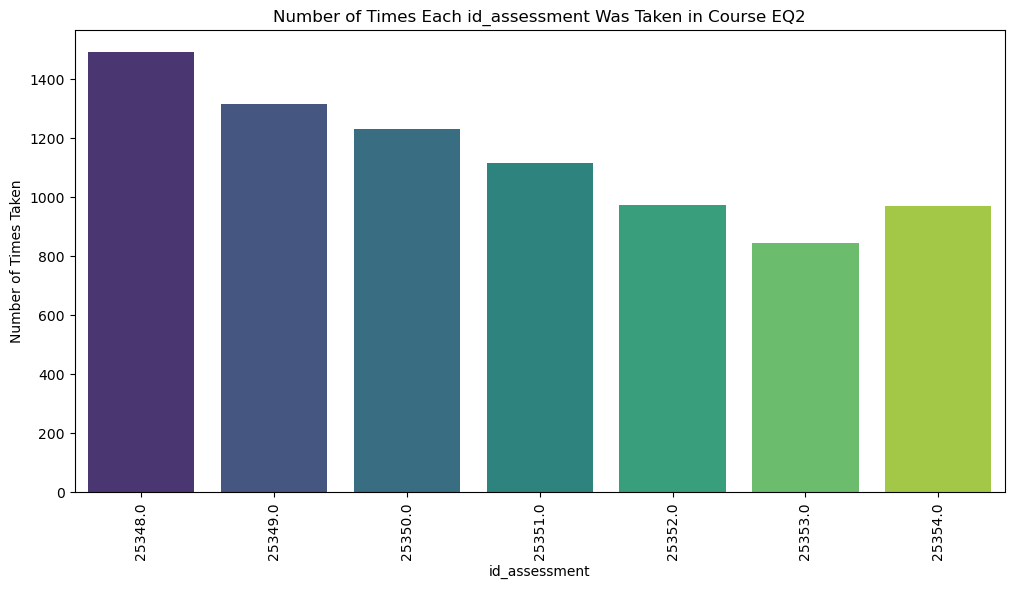

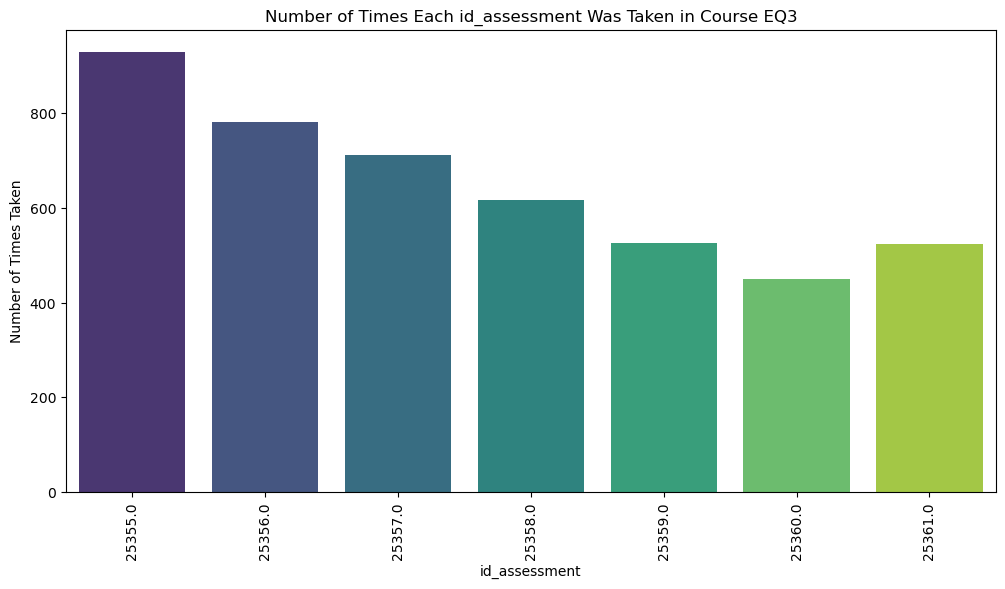

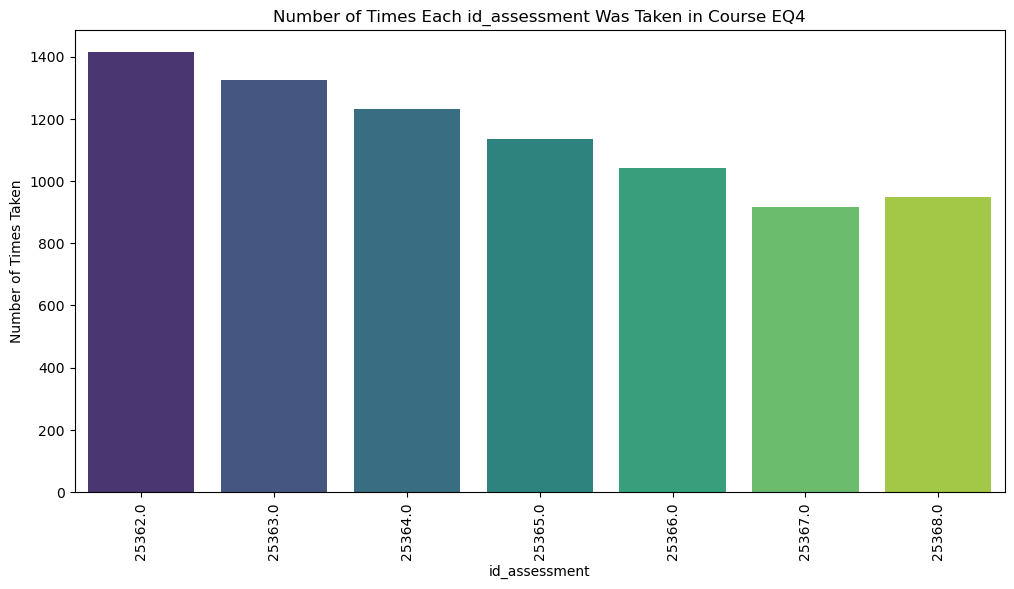

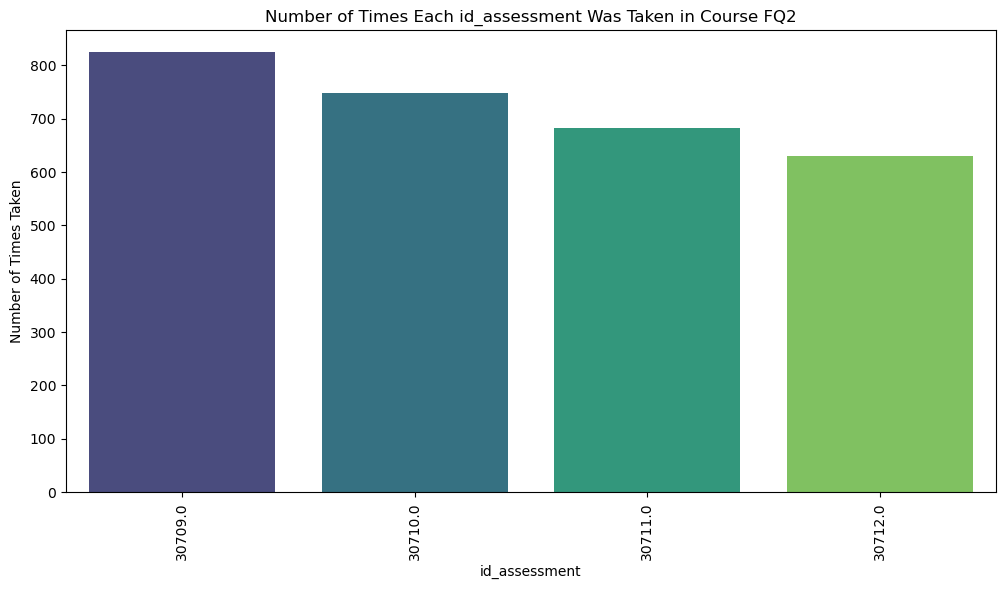

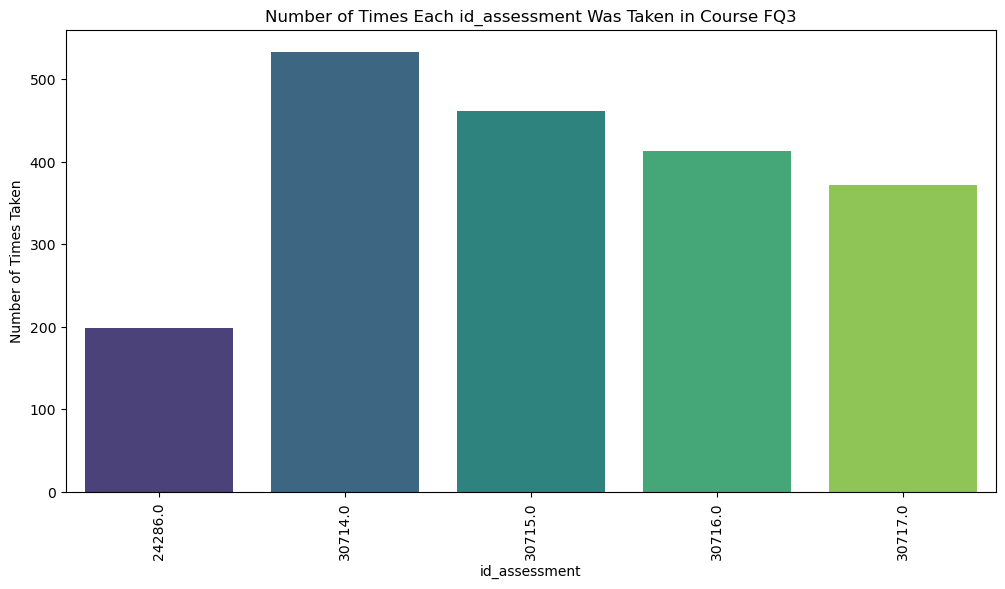

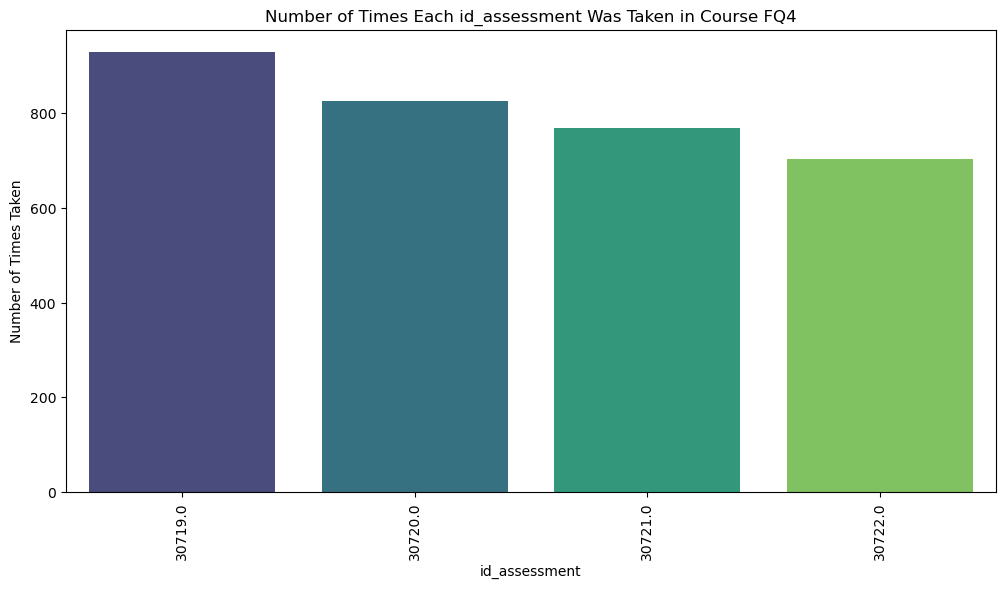

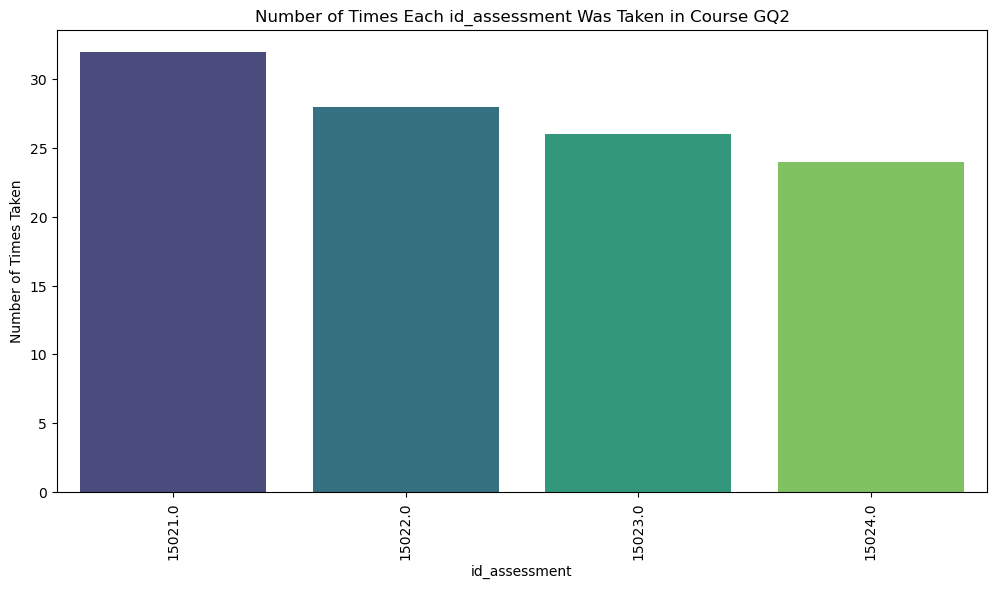

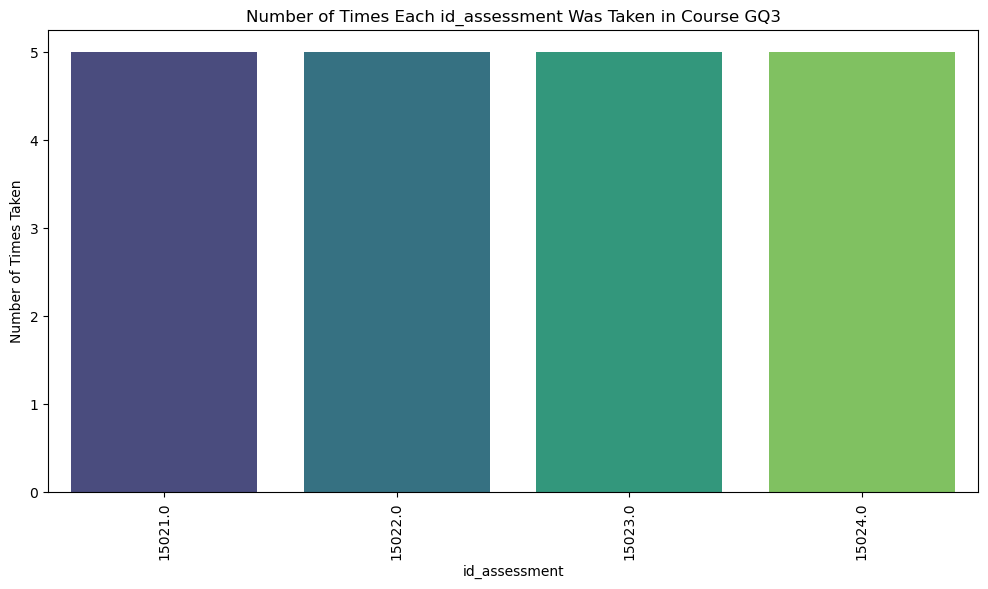

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming student_data_merged is your DataFrame

# Step 1: Filter out rows with weight 0.0
filtered_data = student_data_merged[student_data_merged['weight'] != 0.0]

# Step 2: Count the number of times each id_assessment has been taken within each course
assessment_counts = filtered_data.groupby(['course', 'id_assessment']).size().reset_index(name='count')

# Function to filter assessments based on dynamic threshold
def filter_assessments(course_data):
    top_counts = course_data['count'].nlargest(4)
    threshold = top_counts.min() / 2
    return course_data[course_data['count'] >= threshold]

# Apply the filter function to each course
filtered_assessment_counts = assessment_counts.groupby('course').apply(filter_assessments).reset_index(drop=True)

# Display the filtered result to verify
print(filtered_assessment_counts.head())

# Step 3: Create and plot graphs for each course
# Get unique courses
unique_courses = filtered_assessment_counts['course'].unique()

# Create datasets and plot for each course
for course in unique_courses:
    course_data = filtered_assessment_counts[filtered_assessment_counts['course'] == course]
    
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=course_data, x='id_assessment', y='count', palette='viridis')
    plt.title(f'Number of Times Each id_assessment Was Taken in Course {course}')
    plt.xlabel('id_assessment')
    plt.ylabel('Number of Times Taken')
    plt.xticks(rotation=90)
    plt.show()


  course  id_assessment  weight
0    AQ2         1752.0  3590.0
1    AQ2         1753.0  6840.0
2    AQ2         1754.0  6620.0
3    AQ2         1755.0  6060.0
4    AQ2         1756.0  8940.0
   course    weight
0     AQ2   32050.0
1     AQ4   29730.0
2     BQ1  105450.0
3     BQ2  140825.0
4     BQ3   88087.5
5     BQ4  138887.5
6     CQ1   99199.0
7     CQ2  127643.0
8     CQ3   88036.0
9     CQ4  135495.0
10    DQ3  146858.0
11    DQ4  229582.0
12    EQ1  131861.0
13    EQ2  208317.5
14    EQ3  115812.5
15    EQ4  204935.0
16    FQ2   70852.0
17    FQ3   43842.0
18    FQ4   79252.0
19    GQ2    2630.0
20    GQ3     500.0


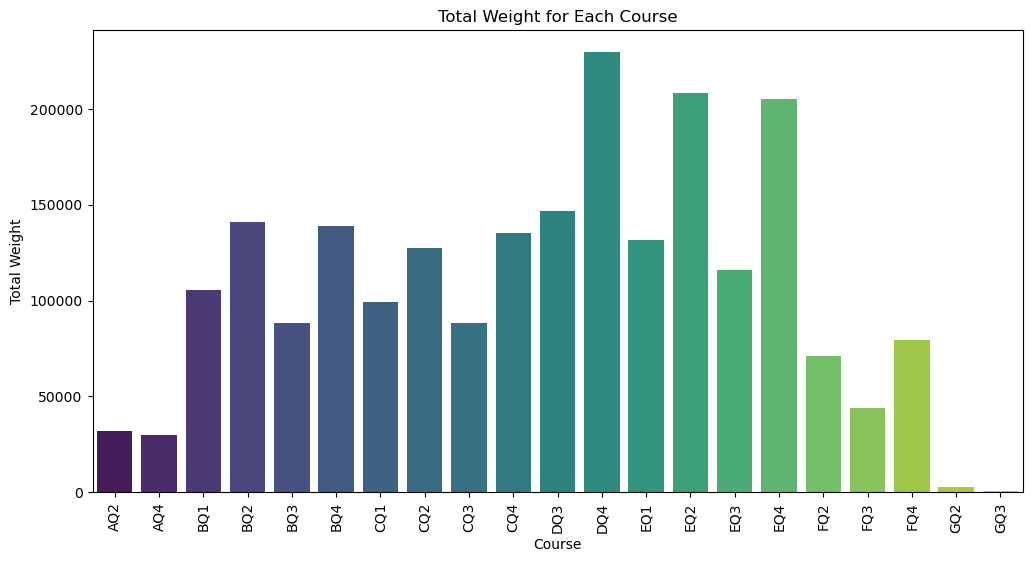

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming filtered_assessment_counts is your DataFrame from the previous steps
# Merge with the original filtered_data to get the weight values
filtered_assessments_with_weights = pd.merge(filtered_assessment_counts, filtered_data, on=['course', 'id_assessment'])

# Calculate the total weight for each id_assessment within each course
total_weights = filtered_assessments_with_weights.groupby(['course', 'id_assessment'])['weight'].sum().reset_index()

# Display the result to verify
print(total_weights.head())

# Calculate the total weight for each course
course_total_weights = total_weights.groupby('course')['weight'].sum().reset_index()

# Display the result to verify
print(course_total_weights)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=course_total_weights, x='course', y='weight', palette='viridis')
plt.title('Total Weight for Each Course')
plt.xlabel('Course')
plt.ylabel('Total Weight')
plt.xticks(rotation=90)
plt.show()


   course    weight
0     AQ2   32050.0
1     AQ4   29730.0
2     BQ1  105450.0
3     BQ2  140825.0
4     BQ3   88087.5
5     BQ4  138887.5
6     CQ1   99199.0
7     CQ2  127643.0
8     CQ3   88036.0
9     CQ4  135495.0
10    DQ3  146858.0
11    DQ4  229582.0
12    EQ1  131861.0
13    EQ2  208317.5
14    EQ3  115812.5
15    EQ4  204935.0
16    FQ2   70852.0
17    FQ3   43842.0
18    FQ4   79252.0
19    GQ2    2630.0
20    GQ3     500.0


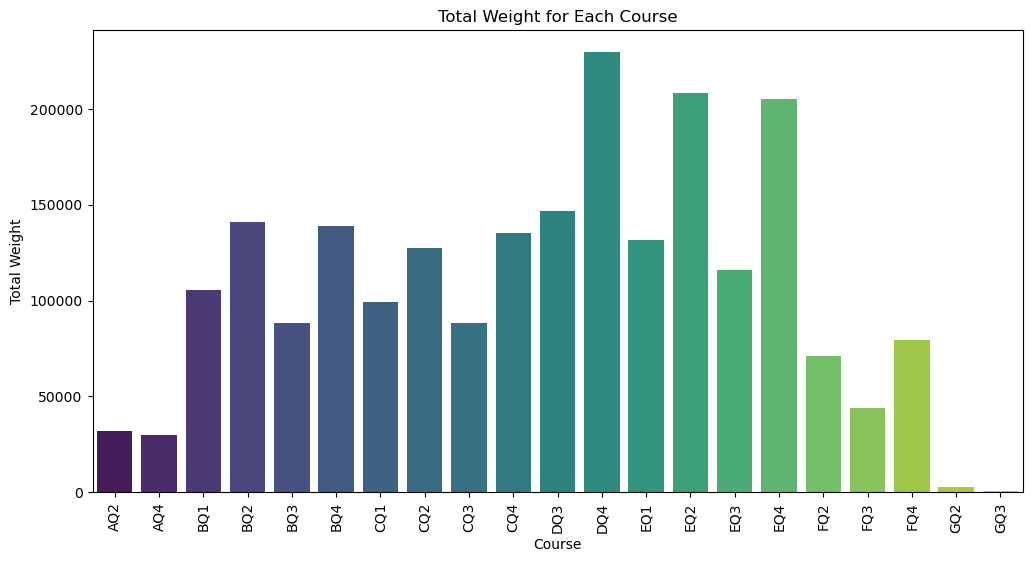

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming filtered_assessment_counts is your DataFrame from the previous steps
# Merge with the original filtered_data to get the weight values
filtered_assessments_with_weights = pd.merge(filtered_assessment_counts, filtered_data, on=['course', 'id_assessment'])

# Calculate the total weight for each course by summing the weights of the unique id_assessments
course_total_weights = filtered_assessments_with_weights.groupby('course')['weight'].sum().reset_index()

# Display the result to verify
print(course_total_weights)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=course_total_weights, x='course', y='weight', palette='viridis')
plt.title('Total Weight for Each Course')
plt.xlabel('Course')
plt.ylabel('Total Weight')
plt.xticks(rotation=90)
plt.show()


In [154]:
filtered_assessments_with_weights

course  id_assessment  count  id_student gender                region  \
0         AQ2         1752.0    359       11391      M   East Anglian Region   
1         AQ2         1752.0    359       28400      F              Scotland   
2         AQ2         1752.0    359       31604      F     South East Region   
3         AQ2         1752.0    359       32885      F  West Midlands Region   
4         AQ2         1752.0    359       38053      M                 Wales   
...       ...            ...    ...         ...    ...                   ...   
127249    GQ3        15024.0      5      391937      F     South West Region   
127250    GQ3        15024.0      5      596513      F      Yorkshire Region   
127251    GQ3        15024.0      5      603921      F  East Midlands Region   
127252    GQ3        15024.0      5      626159      F     South West Region   
127253    GQ3        15024.0      5      630834      F  West Midlands Region   

            highest_education imd_band age_band  num_of_prev_attempts  ...  \
0            HE Qualification  90-100%     55<=                     0  ...   
1            HE Qualification   20-30%    35-55                     0  ...   
2       A Level or Equivalent   50-60%    35-55                     0  ...   
3          Lower Than A Level   50-60%     0-35                     0  ...   
4       A Level or Equivalent   80-90%    35-55                     0  ...   
...                       ...      ...      ...                   ...  ...   
127249  A Level or Equivalent   60-70%    35-55                     0  ...   
127250     Lower Than A Level    0-10%     0-35                     1  ...   
127251     Lower Than A Level   60-70%     0-35                     0  ...   
127252     Lower Than A Level   60-70%    35-55                     0  ...   
127253  A Level or Equivalent   80-90%    35-55                     0  ...   

        disability final_result date_submitted  is_banked  score  \
0                N         Pass           18.0        0.0   78.0   
1                N         Pass           22.0        0.0   70.0   
2                N         Pass           17.0        0.0   72.0   
3                N         Pass           26.0        0.0   69.0   
4                N         Pass           19.0        0.0   79.0   
...            ...          ...            ...        ...    ...   
127249           N         Pass          199.0        0.0   78.0   
127250           N         Pass          201.0        0.0   80.0   
127251           N         Pass          212.0        0.0   68.0   
127252           Y         Pass          193.0        0.0   69.0   
127253           N         Pass          201.0        0.0   80.0   

        assessment_type   date  weight  sum_click  weighted_score  
0                   TMA   19.0    10.0      934.0            7.80  
1                   TMA   19.0    10.0     1435.0            7.00  
2                   TMA   19.0    10.0     2158.0            7.20  
3                   TMA   19.0    10.0     1034.0            6.90  
4                   TMA   19.0    10.0     2445.0            7.90  
...                 ...    ...     ...        ...             ...  
127249              TMA  201.0    35.0     1159.0           27.30  
127250              TMA  201.0    35.0     2769.0           28.00  
127251              TMA  201.0    35.0      366.0           23.80  
127252              TMA  201.0    35.0     4423.0           24.15  
127253              TMA  201.0    35.0      894.0           28.00  

[127254 rows x 21 columns]

   course  weight
0     AQ2   100.0
1     AQ4   100.0
2     BQ1   100.0
3     BQ2   100.0
4     BQ3   100.0
5     BQ4   100.0
6     CQ1   100.0
7     CQ2   100.0
8     CQ3   100.0
9     CQ4   100.0
10    DQ3   198.0
11    DQ4   200.0
12    EQ1   200.0
13    EQ2   200.0
14    EQ3   200.0
15    EQ4   200.0
16    FQ2   100.0
17    FQ3   100.0
18    FQ4   100.0
19    GQ2   100.0
20    GQ3   100.0


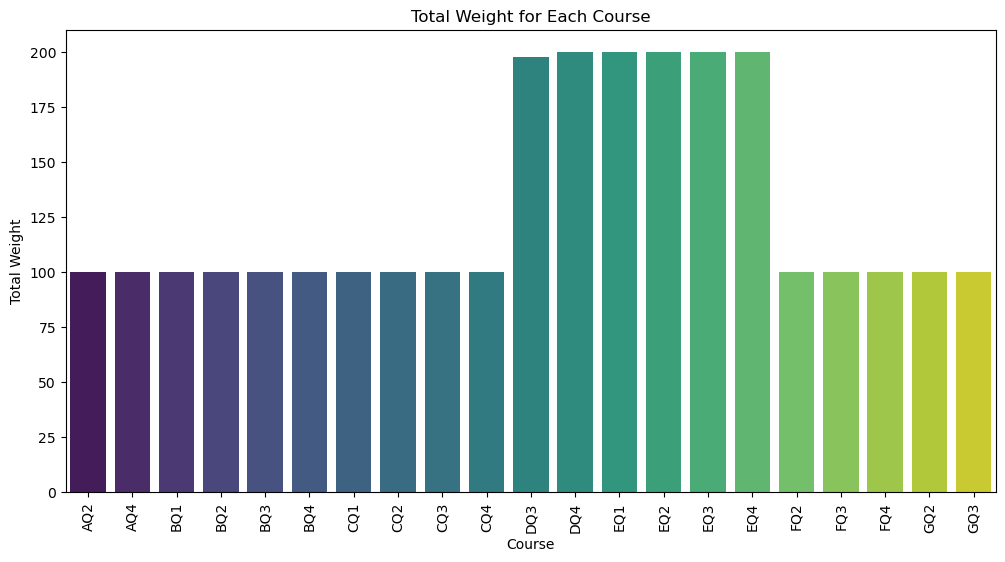

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming filtered_assessments_with_weights is your DataFrame from previous steps
# Group by 'course' and 'id_assessment' to get unique weights
unique_weights = filtered_assessments_with_weights.drop_duplicates(subset=['course', 'id_assessment', 'weight'])

# Sum the weights for each course
course_total_weights = unique_weights.groupby('course')['weight'].sum().reset_index()

# Display the result to verify
print(course_total_weights)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=course_total_weights, x='course', y='weight', palette='viridis')
plt.title('Total Weight for Each Course')
plt.xlabel('Course')
plt.ylabel('Total Weight')
plt.xticks(rotation=90)
plt.show()


In [188]:
import pandas as pd

# Assuming filtered_assessments_with_weights is your DataFrame
# Filter for the course 'DQ3'
dq3_assessments = filtered_assessments_with_weights[filtered_assessments_with_weights['course'] == 'FQ3']

# Display the unique id_assessments and their details
unique_dq3_assessments = dq3_assessments[['id_assessment', 'weight']].drop_duplicates()

# Display the result
print(unique_dq3_assessments)


        id_assessment  weight
122115        30714.0    16.0
122648        30715.0    28.0
123110        30716.0    28.0
123523        30717.0    28.0


In [162]:
import pandas as pd

# Assuming filtered_assessments_with_weights is your DataFrame
# Filter for the course 'FQ3' and remove the row with id_assessment 24286.0
filtered_data_fq3 = filtered_assessments_with_weights[
    (filtered_assessments_with_weights['course'] == 'FQ3') & 
    (filtered_assessments_with_weights['id_assessment'] != 24286.0)
]

# Display the unique id_assessments and their details for FQ3
unique_fq3_assessments = filtered_data_fq3[['id_assessment', 'weight']].drop_duplicates()

# Display the result
print(unique_fq3_assessments)


        id_assessment  weight
122115        30714.0    16.0
122648        30715.0    28.0
123110        30716.0    28.0
123523        30717.0    28.0


In [163]:
filtered_data_fq3

course  id_assessment  count  id_student gender                region  \
122115    FQ3        30714.0    533       25150      M  North Western Region   
122116    FQ3        30714.0    533       27780      M                 Wales   
122117    FQ3        30714.0    533       29639      M          North Region   
122118    FQ3        30714.0    533       29820      M   East Anglian Region   
122119    FQ3        30714.0    533       35340      M          South Region   
...       ...            ...    ...         ...    ...                   ...   
123890    FQ3        30717.0    372     2613219      M              Scotland   
123891    FQ3        30717.0    372     2620661      M  North Western Region   
123892    FQ3        30717.0    372     2632165      M                 Wales   
123893    FQ3        30717.0    372     2642697      M  East Midlands Region   
123894    FQ3        30717.0    372     2647314      M                 Wales   

            highest_education imd_band age_band  num_of_prev_attempts  ...  \
122115       HE Qualification  90-100%     0-35                     0  ...   
122116  A Level or Equivalent    10-20     0-35                     0  ...   
122117     Lower Than A Level      NaN     0-35                     0  ...   
122118       HE Qualification   40-50%     0-35                     0  ...   
122119  A Level or Equivalent   50-60%     0-35                     0  ...   
...                       ...      ...      ...                   ...  ...   
123890       HE Qualification   70-80%    35-55                     0  ...   
123891  A Level or Equivalent    0-10%    35-55                     0  ...   
123892  A Level or Equivalent   70-80%     0-35                     0  ...   
123893     Lower Than A Level    0-10%     0-35                     0  ...   
123894  A Level or Equivalent   20-30%     0-35                     0  ...   

        disability final_result date_submitted  is_banked  score  \
122115           N         Pass           32.0        0.0   97.0   
122116           N         Pass           32.0        0.0   65.0   
122117           N         Pass           27.0        0.0   86.0   
122118           N         Pass           31.0        0.0   99.0   
122119           N         Pass           33.0        0.0   93.0   
...            ...          ...            ...        ...    ...   
123890           N         Fail          151.0        0.0   50.0   
123891           N         Pass          151.0        0.0   51.0   
123892           N         Pass          136.0        0.0   44.0   
123893           N  Distinction          151.0        0.0   91.0   
123894           N         Pass          151.0        0.0   76.0   

        assessment_type   date  weight  sum_click  weighted_score  
122115              TMA   33.0    16.0     2103.0           15.52  
122116              TMA   33.0    16.0      553.0           10.40  
122117              TMA   33.0    16.0     3517.0           13.76  
122118              TMA   33.0    16.0     1475.0           15.84  
122119              TMA   33.0    16.0     1812.0           14.88  
...                 ...    ...     ...        ...             ...  
123890              TMA  152.0    28.0      558.0           14.00  
123891              TMA  152.0    28.0     1307.0           14.28  
123892              TMA  152.0    28.0     2202.0           12.32  
123893              TMA  152.0    28.0     2355.0           25.48  
123894              TMA  152.0    28.0     3156.0           21.28  

[1780 rows x 21 columns]

In [164]:
import pandas as pd

# Assuming filtered_assessments_with_weights is your DataFrame
# Remove the row with id_assessment 24286.0
filtered_assessments_with_weights = filtered_assessments_with_weights[filtered_assessments_with_weights['id_assessment'] != 24286.0]

# Display the first few rows to verify the removal
print(filtered_assessments_with_weights.head())


  course  id_assessment  count  id_student gender                region  \
0    AQ2         1752.0    359       11391      M   East Anglian Region   
1    AQ2         1752.0    359       28400      F              Scotland   
2    AQ2         1752.0    359       31604      F     South East Region   
3    AQ2         1752.0    359       32885      F  West Midlands Region   
4    AQ2         1752.0    359       38053      M                 Wales   

       highest_education imd_band age_band  num_of_prev_attempts  ...  \
0       HE Qualification  90-100%     55<=                     0  ...   
1       HE Qualification   20-30%    35-55                     0  ...   
2  A Level or Equivalent   50-60%    35-55                     0  ...   
3     Lower Than A Level   50-60%     0-35                     0  ...   
4  A Level or Equivalent   80-90%    35-55                     0  ...   

   disability final_result date_submitted  is_banked  score  assessment_type  \
0           N         Pass    

In [166]:
import pandas as pd

# Assuming filtered_assessments_with_weights is your DataFrame
# Identify id_assessments with weight 100
assessments_with_weight_100 = filtered_assessments_with_weights[filtered_assessments_with_weights['weight'] == 100]

# Group by id_student and course and check for multiple id_assessments
student_assessment_counts = filtered_assessments_with_weights.groupby(['id_student', 'course']).size().reset_index(name='count')

# Filter for students with multiple id_assessments within the same course
students_multiple_assessments = student_assessment_counts[student_assessment_counts['count'] > 1]

# Merge to see the details of these students
students_with_weight_100_and_multiple_assessments = pd.merge(students_multiple_assessments, assessments_with_weight_100, on=['id_student', 'course'])

# Display the result
print(students_with_weight_100_and_multiple_assessments)

      id_student course  count_x  id_assessment  count_y gender  \
0          23698    DQ4        9        24299.0     1168      F   
1          24213    EQ3        7        25361.0      524      F   
2          27116    DQ4        9        24299.0     1168      M   
3          28046    EQ2        7        25354.0      968      F   
4          28787    DQ4        5        24299.0     1168      M   
...          ...    ...      ...            ...      ...    ...   
4950     2694886    EQ3        7        25361.0      524      M   
4951     2694933    EQ1       14        25340.0      602      F   
4952     2695608    EQ2        7        25354.0      968      F   
4953     2697181    DQ3        5        24290.0      747      F   
4954     2698251    EQ3        7        25361.0      524      F   

                    region      highest_education imd_band age_band  ...  \
0      East Anglian Region  A Level or Equivalent   50-60%     0-35  ...   
1      East Anglian Region  A Level or Equi

In [167]:
assessments_with_weight_100

course  id_assessment  count  id_student gender               region  \
75970     DQ3        24290.0    747       29764      M  East Anglian Region   
75971     DQ3        24290.0    747       29820      M  East Anglian Region   
75972     DQ3        24290.0    747       40604      M              Ireland   
75973     DQ3        24290.0    747       42638      M             Scotland   
75974     DQ3        24290.0    747       46605      M  East Anglian Region   
...       ...            ...    ...         ...    ...                  ...   
119027    EQ4        25368.0    950     2677210      M  East Anglian Region   
119028    EQ4        25368.0    950     2678380      M    South East Region   
119029    EQ4        25368.0    950     2684043      M  East Anglian Region   
119030    EQ4        25368.0    950     2685863      F  East Anglian Region   
119031    EQ4        25368.0    950     2689863      F    South West Region   

            highest_education imd_band age_band  num_of_prev_attempts  ...  \
75970   A Level or Equivalent   50-60%     0-35                     0  ...   
75971        HE Qualification   40-50%     0-35                     0  ...   
75972   A Level or Equivalent      NaN    35-55                     0  ...   
75973        HE Qualification  90-100%    35-55                     0  ...   
75974        HE Qualification   60-70%    35-55                     0  ...   
...                       ...      ...      ...                   ...  ...   
119027     Lower Than A Level    0-10%     0-35                     0  ...   
119028       HE Qualification   50-60%    35-55                     0  ...   
119029     Lower Than A Level   60-70%     0-35                     0  ...   
119030     Lower Than A Level   60-70%    35-55                     0  ...   
119031  A Level or Equivalent   30-40%     0-35                     1  ...   

        disability final_result date_submitted  is_banked  score  \
75970            N  Distinction          230.0        0.0   94.0   
75971            N         Pass          230.0        0.0   76.0   
75972            N         Pass          234.0        0.0   66.0   
75973            N         Pass          230.0        0.0   50.0   
75974            N  Distinction          230.0        0.0   98.0   
...            ...          ...            ...        ...    ...   
119027           N         Pass          243.0        0.0   71.0   
119028           N         Pass          242.0        0.0   64.0   
119029           N         Pass          243.0        0.0   69.0   
119030           N         Pass          243.0        0.0   49.0   
119031           N         Pass          242.0        0.0   67.0   

        assessment_type date  weight  sum_click  weighted_score  
75970              Exam  NaN   100.0     2867.0            94.0  
75971              Exam  NaN   100.0     1027.0            76.0  
75972              Exam  NaN   100.0      465.0            66.0  
75973              Exam  NaN   100.0     5659.0            50.0  
75974              Exam  NaN   100.0     3427.0            98.0  
...                 ...  ...     ...        ...             ...  
119027             Exam  NaN   100.0      867.0            71.0  
119028             Exam  NaN   100.0      900.0            64.0  
119029             Exam  NaN   100.0      586.0            69.0  
119030             Exam  NaN   100.0     1391.0            49.0  
119031             Exam  NaN   100.0     1011.0            67.0  

[4959 rows x 21 columns]

        id_student course  id_assessment  weight  score final_result
29           23698    DQ4        24299.0   100.0   80.0         Pass
47           24213    EQ3        25361.0   100.0   58.0         Pass
96           27116    DQ4        24299.0   100.0   96.0  Distinction
151          28046    EQ2        25354.0   100.0   40.0         Fail
166          28787    DQ4        24299.0   100.0   44.0         Pass
...            ...    ...            ...     ...    ...          ...
123292     2694886    EQ3        25361.0   100.0   69.0         Pass
123303     2694933    EQ1        25340.0   100.0   73.0         Pass
123317     2695608    EQ2        25354.0   100.0   73.0         Pass
123326     2697181    DQ3        24290.0   100.0   80.0         Pass
123358     2698251    EQ3        25361.0   100.0   44.0         Fail

[4955 rows x 6 columns]


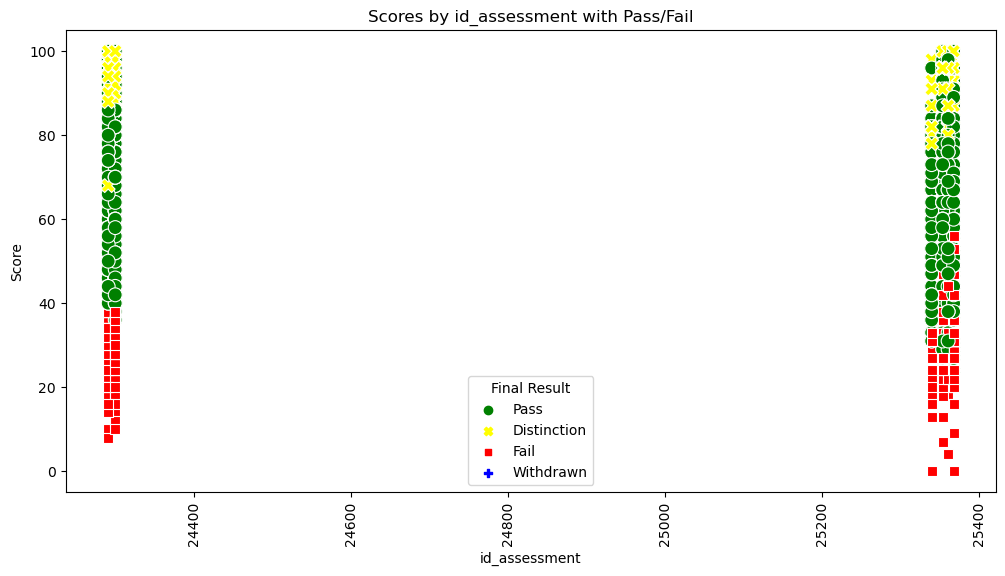

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming filtered_assessments_with_weights is your DataFrame
# Step 1: Identify id_assessments with weight 100
assessments_with_weight_100 = filtered_assessments_with_weights[filtered_assessments_with_weights['weight'] == 100]

# Group by id_student and course and check for multiple id_assessments
student_assessment_counts = filtered_assessments_with_weights.groupby(['id_student', 'course']).size().reset_index(name='count')

# Filter for students with multiple id_assessments within the same course
students_multiple_assessments = student_assessment_counts[student_assessment_counts['count'] > 1]

# Merge to see the details of these students
students_with_multiple_assessments = pd.merge(students_multiple_assessments, filtered_assessments_with_weights, on=['id_student', 'course'])

# Filter out only those who have assessments with weight 100
students_with_weight_100_and_multiple_assessments = students_with_multiple_assessments[students_with_multiple_assessments['id_assessment'].isin(assessments_with_weight_100['id_assessment'])]

# Display the result
print(students_with_weight_100_and_multiple_assessments[['id_student', 'course', 'id_assessment', 'weight', 'score', 'final_result']].drop_duplicates())

# Step 2: Create the bar plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=students_with_weight_100_and_multiple_assessments, 
    x='id_assessment', 
    y='score', 
    hue='final_result', 
    palette={'Pass': 'green', 'Fail': 'red', 'Withdrawn' : 'blue', 'Distinction': 'yellow'},
    style='final_result',
    s=100
)
plt.title('Scores by id_assessment with Pass/Fail')
plt.xlabel('id_assessment')
plt.ylabel('Score')
plt.legend(title='Final Result')
plt.xticks(rotation=90)
plt.show()


        id_student course  id_assessment  weight  score final_result
75971        29820    DQ3        24290.0   100.0   76.0         Pass
75972        40604    DQ3        24290.0   100.0   66.0         Pass
75973        42638    DQ3        24290.0   100.0   50.0         Pass
75976        57340    DQ3        24290.0   100.0   68.0         Pass
75977        69703    DQ3        24290.0   100.0   84.0         Pass
...            ...    ...            ...     ...    ...          ...
119027     2677210    EQ4        25368.0   100.0   71.0         Pass
119028     2678380    EQ4        25368.0   100.0   64.0         Pass
119029     2684043    EQ4        25368.0   100.0   69.0         Pass
119030     2685863    EQ4        25368.0   100.0   49.0         Pass
119031     2689863    EQ4        25368.0   100.0   67.0         Pass

[4077 rows x 6 columns]


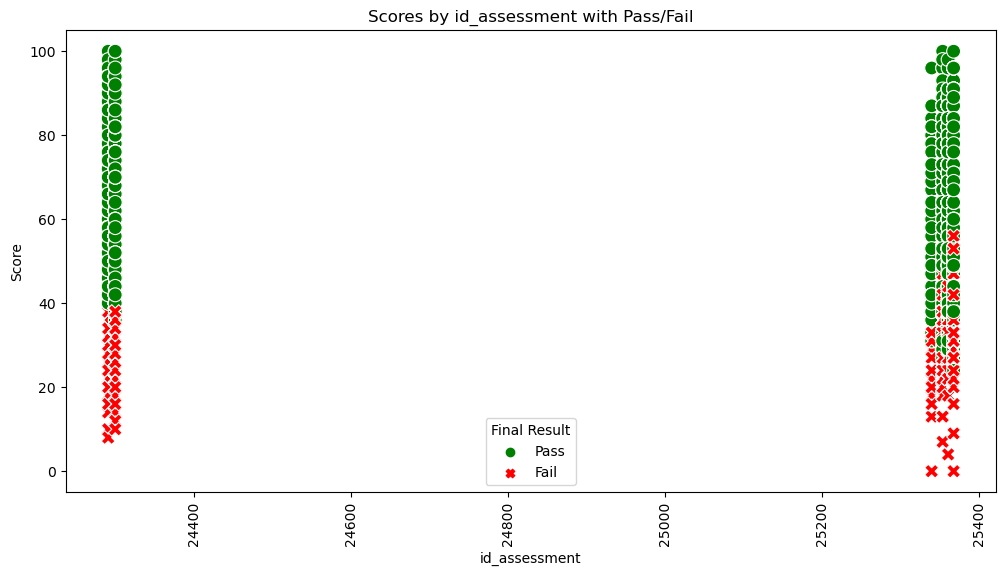

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming filtered_assessments_with_weights is your DataFrame
# Step 1: Filter for id_assessments with weight 100
assessments_with_weight_100 = filtered_assessments_with_weights[filtered_assessments_with_weights['weight'] == 100]

# Further filter for 'Pass' and 'Fail' only
pass_fail_assessments = assessments_with_weight_100[assessments_with_weight_100['final_result'].isin(['Pass', 'Fail'])]

# Display the result
print(pass_fail_assessments[['id_student', 'course', 'id_assessment', 'weight', 'score', 'final_result']].drop_duplicates())

# Step 2: Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=pass_fail_assessments, 
    x='id_assessment', 
    y='score', 
    hue='final_result', 
    palette={'Pass': 'green', 'Fail': 'red'},
    style='final_result',
    s=100
)
plt.title('Scores by id_assessment with Pass/Fail')
plt.xlabel('id_assessment')
plt.ylabel('Score')
plt.legend(title='Final Result')
plt.xticks(rotation=90)
plt.show()


In [171]:
import pandas as pd

# Assuming filtered_assessments_with_weights is your DataFrame

# Step 1: Filter the Data
dq3_data = filtered_assessments_with_weights[filtered_assessments_with_weights['course'] == 'DQ3']

# Identify id_assessments with weight 100 in DQ3
dq3_weight_100_assessments = dq3_data[dq3_data['weight'] == 100]['id_assessment'].unique()

# Identify students who took all assessments in DQ3
students_all_assessments = dq3_data.groupby('id_student')['id_assessment'].nunique()
total_assessments = dq3_data['id_assessment'].nunique()
students_all_assessments = students_all_assessments[students_all_assessments == total_assessments].index

# Identify students who took all assessments except the one with weight 100
students_without_weight_100 = dq3_data[~dq3_data['id_assessment'].isin(dq3_weight_100_assessments)]
students_without_weight_100_counts = students_without_weight_100.groupby('id_student')['id_assessment'].nunique()
total_assessments_without_100 = students_without_weight_100['id_assessment'].nunique()
students_without_weight_100 = students_without_weight_100_counts[students_without_weight_100_counts == total_assessments_without_100].index

# Identify students who only took the assessment with weight 100
students_only_weight_100 = dq3_data[dq3_data['id_assessment'].isin(dq3_weight_100_assessments)]
students_only_weight_100_counts = students_only_weight_100.groupby('id_student')['id_assessment'].nunique()
students_only_weight_100 = students_only_weight_100_counts[students_only_weight_100_counts == 1].index

# Step 2: Summarize the Results
# Helper function to get pass/fail counts
def get_pass_fail_counts(data, students):
    filtered_data = data[data['id_student'].isin(students)]
    pass_count = filtered_data[filtered_data['final_result'] == 'Pass']['id_student'].nunique()
    fail_count = filtered_data[filtered_data['final_result'] == 'Fail']['id_student'].nunique()
    return pass_count, fail_count

# Get pass/fail counts for each group
pass_all, fail_all = get_pass_fail_counts(dq3_data, students_all_assessments)
pass_without_100, fail_without_100 = get_pass_fail_counts(dq3_data, students_without_weight_100)
pass_only_100, fail_only_100 = get_pass_fail_counts(dq3_data, students_only_weight_100)

# Create the summary table
summary_table = pd.DataFrame({
    'Group': ['All assessments', 'All except weight 100', 'Only weight 100'],
    'Students': [len(students_all_assessments), len(students_without_weight_100), len(students_only_weight_100)],
    'Pass': [pass_all, pass_without_100, pass_only_100],
    'Fail': [fail_all, fail_without_100, fail_only_100]
})

# Display the summary table
print(summary_table)


                   Group  Students  Pass  Fail
0        All assessments       449   268    48
1  All except weight 100       457   268    52
2        Only weight 100       747   471    84


In [172]:
import pandas as pd

# Assuming filtered_assessments_with_weights is your DataFrame
# Filter for the course 'DQ3'
dq3_data = filtered_assessments_with_weights[filtered_assessments_with_weights['course'] == 'DQ3']

# Count the number of unique students in DQ3
unique_students_dq3 = dq3_data['id_student'].nunique()

# Display the result
print(f'Total unique students for DQ3: {unique_students_dq3}')


Total unique students for DQ3: 1196


In [173]:
747+457+449

1653

In [174]:
import pandas as pd

# Assuming filtered_assessments_with_weights is your DataFrame
# Step 1: Filter for the course 'DQ3'
dq3_data = filtered_assessments_with_weights[filtered_assessments_with_weights['course'] == 'DQ3']

# Step 2: Count instances of id_assessment for each student
student_assessment_counts = dq3_data.groupby(['id_student', 'id_assessment']).size().reset_index(name='count')

# Step 3: Identify multiple instances
multiple_instances = student_assessment_counts[student_assessment_counts['count'] > 1]

# Display the result
print(multiple_instances)

# Count the number of unique students who took an id_assessment more than once
unique_students_multiple = multiple_instances['id_student'].nunique()

# Display the result
print(f'Number of unique students who took an id_assessment more than once in DQ3: {unique_students_multiple}')


Empty DataFrame
Columns: [id_student, id_assessment, count]
Index: []
Number of unique students who took an id_assessment more than once in DQ3: 0


In [175]:
import pandas as pd

# Assuming filtered_assessments_with_weights is your DataFrame

# Step 1: Filter the Data
dq3_data = filtered_assessments_with_weights[filtered_assessments_with_weights['course'] == 'DQ3']

# Identify id_assessments with weight 100 in DQ3
dq3_weight_100_assessments = dq3_data[dq3_data['weight'] == 100]['id_assessment'].unique()

# Step 2: Identify Groups of Students

# Find students who took all id_assessments
all_assessments = dq3_data['id_assessment'].unique()
students_all_assessments = dq3_data.groupby('id_student')['id_assessment'].apply(lambda x: set(x) == set(all_assessments))
students_all_assessments = students_all_assessments[students_all_assessments].index

# Find students who took all assessments except those with weight 100
assessments_without_weight_100 = dq3_data[~dq3_data['id_assessment'].isin(dq3_weight_100_assessments)]['id_assessment'].unique()
students_without_weight_100 = dq3_data.groupby('id_student')['id_assessment'].apply(lambda x: set(x) == set(assessments_without_weight_100))
students_without_weight_100 = students_without_weight_100[students_without_weight_100].index

# Find students who only took the assessment with weight 100
students_only_weight_100 = dq3_data.groupby('id_student')['id_assessment'].apply(lambda x: set(x) == set(dq3_weight_100_assessments))
students_only_weight_100 = students_only_weight_100[students_only_weight_100].index

# Step 3: Summarize the Results

# Helper function to get pass/fail counts
def get_pass_fail_counts(data, students):
    filtered_data = data[data['id_student'].isin(students)]
    pass_count = filtered_data[filtered_data['final_result'] == 'Pass']['id_student'].nunique()
    fail_count = filtered_data[filtered_data['final_result'] == 'Fail']['id_student'].nunique()
    return pass_count, fail_count

# Get pass/fail counts for each group
pass_all, fail_all = get_pass_fail_counts(dq3_data, students_all_assessments)
pass_without_100, fail_without_100 = get_pass_fail_counts(dq3_data, students_without_weight_100)
pass_only_100, fail_only_100 = get_pass_fail_counts(dq3_data, students_only_weight_100)

# Create the summary table
summary_table = pd.DataFrame({
    'Group': ['All assessments', 'All except weight 100', 'Only weight 100'],
    'Students': [len(students_all_assessments), len(students_without_weight_100), len(students_only_weight_100)],
    'Pass': [pass_all, pass_without_100, pass_only_100],
    'Fail': [fail_all, fail_without_100, fail_only_100]
})

# Display the summary table
print(summary_table)

# Calculate the total unique students
total_unique_students_dq3 = dq3_data['id_student'].nunique()
print(f'Total unique students for DQ3: {total_unique_students_dq3}')


                   Group  Students  Pass  Fail
0        All assessments       449   268    48
1  All except weight 100         8     0     4
2        Only weight 100         0     0     0
Total unique students for DQ3: 1196


In [176]:
filtered_assessments_with_weights

course  id_assessment  count  id_student gender                region  \
0         AQ2         1752.0    359       11391      M   East Anglian Region   
1         AQ2         1752.0    359       28400      F              Scotland   
2         AQ2         1752.0    359       31604      F     South East Region   
3         AQ2         1752.0    359       32885      F  West Midlands Region   
4         AQ2         1752.0    359       38053      M                 Wales   
...       ...            ...    ...         ...    ...                   ...   
127249    GQ3        15024.0      5      391937      F     South West Region   
127250    GQ3        15024.0      5      596513      F      Yorkshire Region   
127251    GQ3        15024.0      5      603921      F  East Midlands Region   
127252    GQ3        15024.0      5      626159      F     South West Region   
127253    GQ3        15024.0      5      630834      F  West Midlands Region   

            highest_education imd_band age_band  num_of_prev_attempts  ...  \
0            HE Qualification  90-100%     55<=                     0  ...   
1            HE Qualification   20-30%    35-55                     0  ...   
2       A Level or Equivalent   50-60%    35-55                     0  ...   
3          Lower Than A Level   50-60%     0-35                     0  ...   
4       A Level or Equivalent   80-90%    35-55                     0  ...   
...                       ...      ...      ...                   ...  ...   
127249  A Level or Equivalent   60-70%    35-55                     0  ...   
127250     Lower Than A Level    0-10%     0-35                     1  ...   
127251     Lower Than A Level   60-70%     0-35                     0  ...   
127252     Lower Than A Level   60-70%    35-55                     0  ...   
127253  A Level or Equivalent   80-90%    35-55                     0  ...   

        disability final_result date_submitted  is_banked  score  \
0                N         Pass           18.0        0.0   78.0   
1                N         Pass           22.0        0.0   70.0   
2                N         Pass           17.0        0.0   72.0   
3                N         Pass           26.0        0.0   69.0   
4                N         Pass           19.0        0.0   79.0   
...            ...          ...            ...        ...    ...   
127249           N         Pass          199.0        0.0   78.0   
127250           N         Pass          201.0        0.0   80.0   
127251           N         Pass          212.0        0.0   68.0   
127252           Y         Pass          193.0        0.0   69.0   
127253           N         Pass          201.0        0.0   80.0   

        assessment_type   date  weight  sum_click  weighted_score  
0                   TMA   19.0    10.0      934.0            7.80  
1                   TMA   19.0    10.0     1435.0            7.00  
2                   TMA   19.0    10.0     2158.0            7.20  
3                   TMA   19.0    10.0     1034.0            6.90  
4                   TMA   19.0    10.0     2445.0            7.90  
...                 ...    ...     ...        ...             ...  
127249              TMA  201.0    35.0     1159.0           27.30  
127250              TMA  201.0    35.0     2769.0           28.00  
127251              TMA  201.0    35.0      366.0           23.80  
127252              TMA  201.0    35.0     4423.0           24.15  
127253              TMA  201.0    35.0      894.0           28.00  

[125709 rows x 21 columns]

In [177]:
import pandas as pd

# Assuming filtered_assessments_with_weights is your DataFrame

# Step 1: Identify unique courses
unique_courses = filtered_assessments_with_weights['course'].unique()

# Step 2: Create an empty DataFrame to store the results
filtered_students = pd.DataFrame()

# Step 3: Process each course separately
for course in unique_courses:
    course_data = filtered_assessments_with_weights[filtered_assessments_with_weights['course'] == course]
    
    # Find students who took each id_assessment more than once within the same course
    students_multiple_assessments = course_data.groupby(['id_student', 'id_assessment']).size().reset_index(name='count')
    students_multiple_assessments = students_multiple_assessments[students_multiple_assessments['count'] > 1]['id_student'].unique()
    
    # Remove these students from the course data
    course_data = course_data[~course_data['id_student'].isin(students_multiple_assessments)]
    
    # Identify students who took all unique id_assessments within the course
    unique_assessments = course_data['id_assessment'].unique()
    students_all_assessments = course_data.groupby('id_student')['id_assessment'].apply(lambda x: set(x) == set(unique_assessments))
    students_all_assessments = students_all_assessments[students_all_assessments].index
    
    # Filter the course data to include only these students
    course_filtered_data = course_data[course_data['id_student'].isin(students_all_assessments)]
    
    # Append the filtered data to the results DataFrame
    filtered_students = pd.concat([filtered_students, course_filtered_data])

# Display the result
print(filtered_students)


       course  id_assessment  count  id_student gender                region  \
0         AQ2         1752.0    359       11391      M   East Anglian Region   
1         AQ2         1752.0    359       28400      F              Scotland   
2         AQ2         1752.0    359       31604      F     South East Region   
3         AQ2         1752.0    359       32885      F  West Midlands Region   
4         AQ2         1752.0    359       38053      M                 Wales   
...       ...            ...    ...         ...    ...                   ...   
127249    GQ3        15024.0      5      391937      F     South West Region   
127250    GQ3        15024.0      5      596513      F      Yorkshire Region   
127251    GQ3        15024.0      5      603921      F  East Midlands Region   
127252    GQ3        15024.0      5      626159      F     South West Region   
127253    GQ3        15024.0      5      630834      F  West Midlands Region   

            highest_education imd_band 

In [178]:
import pandas as pd

# Assuming filtered_students is your DataFrame from the previous step

# Step 1: Filter out final_results that aren't 'Pass' or 'Fail'
filtered_students = filtered_students[filtered_students['final_result'].isin(['Pass', 'Fail'])]

# Step 2: Convert 'Pass' to 1 and 'Fail' to 0
filtered_students['final_result'] = filtered_students['final_result'].map({'Pass': 1, 'Fail': 0})

# Display the result
print(filtered_students.head())


  course  id_assessment  count  id_student gender                region  \
0    AQ2         1752.0    359       11391      M   East Anglian Region   
1    AQ2         1752.0    359       28400      F              Scotland   
2    AQ2         1752.0    359       31604      F     South East Region   
3    AQ2         1752.0    359       32885      F  West Midlands Region   
4    AQ2         1752.0    359       38053      M                 Wales   

       highest_education imd_band age_band  num_of_prev_attempts  ...  \
0       HE Qualification  90-100%     55<=                     0  ...   
1       HE Qualification   20-30%    35-55                     0  ...   
2  A Level or Equivalent   50-60%    35-55                     0  ...   
3     Lower Than A Level   50-60%     0-35                     0  ...   
4  A Level or Equivalent   80-90%    35-55                     0  ...   

   disability final_result  date_submitted  is_banked  score  assessment_type  \
0           N            1   

In [179]:
import pandas as pd

# Assuming filtered_students is your DataFrame from the previous step

# Step 1: Group by course and final_result to get the counts
course_summary = filtered_students.groupby(['course', 'final_result']).size().reset_index(name='count')

# Step 2: Pivot the table to get a clearer view
course_summary_pivot = course_summary.pivot(index='course', columns='final_result', values='count').fillna(0)

# Rename columns for clarity
course_summary_pivot.columns = ['Fail', 'Pass']

# Calculate the total number of students for each course
course_summary_pivot['Total'] = course_summary_pivot['Fail'] + course_summary_pivot['Pass']

# Reset index to make 'course' a column again
course_summary_pivot = course_summary_pivot.reset_index()

# Display the summary
print(course_summary_pivot)


   course   Fail    Pass   Total
0     AQ2   95.0  1250.0  1345.0
1     AQ4   90.0  1120.0  1210.0
2     BQ1  580.0  3015.0  3595.0
3     BQ2  485.0  4140.0  4625.0
4     BQ3  405.0  2475.0  2880.0
5     BQ4  395.0  3855.0  4250.0
6     CQ1  396.0  4048.0  4444.0
7     CQ2  737.0  6149.0  6886.0
8     CQ3  418.0  3333.0  3751.0
9     CQ4  404.0  3824.0  4228.0
10    DQ3  384.0  2144.0  2528.0
11    DQ4  693.0  3798.0  4491.0
12    EQ1  644.0  3864.0  4508.0
13    EQ2  644.0  3962.0  4606.0
14    EQ3  203.0  1820.0  2023.0
15    EQ4  931.0  4242.0  5173.0
16    FQ2  124.0  1808.0  1932.0
17    FQ3  128.0  1008.0  1136.0
18    FQ4  148.0  1932.0  2080.0
19    GQ2    0.0    64.0    64.0
20    GQ3    0.0    20.0    20.0


In [180]:
import pandas as pd

# Assuming filtered_students is your DataFrame from the previous step

# Create a copy to avoid modifying the original DataFrame
students_transformed = filtered_students.copy()

# Function to create 'test' values
def create_test_values(group):
    assessments = group['id_assessment'].unique()
    test_mapping = {assessment: f'test{i+1}' for i, assessment in enumerate(sorted(assessments))}
    for assessment in group[group['weight'] == 100]['id_assessment'].unique():
        test_mapping[assessment] = 'testF'
    group['test'] = group['id_assessment'].map(test_mapping)
    return group

# Apply the function to each course
students_transformed = students_transformed.groupby('course').apply(create_test_values)

# Create the final table with just 'course' and 'test'
final_table = students_transformed[['course', 'test']].drop_duplicates().reset_index(drop=True)

# Display the result
print(final_table)


    course   test
0      AQ2  test1
1      AQ2  test2
2      AQ2  test3
3      AQ2  test4
4      AQ2  test5
..     ...    ...
134    GQ2  test4
135    GQ3  test1
136    GQ3  test2
137    GQ3  test3
138    GQ3  test4

[139 rows x 2 columns]


In [181]:
import pandas as pd

# Assuming filtered_students is your DataFrame from the previous step

# Create a copy to avoid modifying the original DataFrame
students_transformed = filtered_students.copy()

# Function to adjust weights and calculate sum of weighted scores
def adjust_weights_and_sum(group):
    if 100 in group['weight'].values:
        group['weight'] = group['weight'] / 2
    return group

# Apply the function to each course
students_transformed = students_transformed.groupby('course').apply(adjust_weights_and_sum)

# Calculate the sum of weights for each course
course_weight_sum = students_transformed.groupby('course')['weight'].sum().reset_index()

# Display the result
print(course_weight_sum)


ValueError: 'course' is both an index level and a column label, which is ambiguous.

In [182]:
import pandas as pd

# Assuming filtered_students is your DataFrame from the previous step

# Create a copy to avoid modifying the original DataFrame
students_transformed = filtered_students.copy()

# Function to adjust weights and calculate sum of weighted scores
def adjust_weights_and_sum(group):
    if 100 in group['weight'].values:
        group['weight'] = group['weight'] / 2
    return group

# Reset the index to ensure 'course' is not both an index and column label
students_transformed = students_transformed.reset_index(drop=True)

# Apply the function to each course
students_transformed = students_transformed.groupby('course').apply(adjust_weights_and_sum).reset_index(drop=True)

# Calculate the sum of weights for each course
course_weight_sum = students_transformed.groupby('course')['weight'].sum().reset_index()

# Display the result
print(course_weight_sum)


   course    weight
0     AQ2   26900.0
1     AQ4   24200.0
2     BQ1   71900.0
3     BQ2   92500.0
4     BQ3   57600.0
5     BQ4   85000.0
6     CQ1   40400.0
7     CQ2   62600.0
8     CQ3   34100.0
9     CQ4  105700.0
10    DQ3   31284.0
11    DQ4   49900.0
12    EQ1   32200.0
13    EQ2   65800.0
14    EQ3   28900.0
15    EQ4   73900.0
16    FQ2   48300.0
17    FQ3   28400.0
18    FQ4   52000.0
19    GQ2    1600.0
20    GQ3     500.0


In [183]:
import pandas as pd

# Assuming filtered_students is your DataFrame from the previous step

# Create a copy to avoid modifying the original DataFrame
students_transformed = filtered_students.copy()

# Function to adjust weights and calculate sum of unique weighted scores
def adjust_weights_and_sum(group):
    unique_assessments = group[['id_assessment', 'weight']].drop_duplicates()
    if 100 in unique_assessments['weight'].values:
        unique_assessments['weight'] = unique_assessments['weight'] / 2
    return unique_assessments

# Apply the function to each course and calculate the sum of weights
course_weight_sum = students_transformed.groupby('course').apply(adjust_weights_and_sum).groupby('course')['weight'].sum().reset_index()

# Display the result
print(course_weight_sum)


   course  weight
0     AQ2   100.0
1     AQ4   100.0
2     BQ1   100.0
3     BQ2   100.0
4     BQ3   100.0
5     BQ4   100.0
6     CQ1   100.0
7     CQ2   100.0
8     CQ3   100.0
9     CQ4   100.0
10    DQ3    99.0
11    DQ4   100.0
12    EQ1   100.0
13    EQ2   100.0
14    EQ3   100.0
15    EQ4   100.0
16    FQ2   100.0
17    FQ3   100.0
18    FQ4   100.0
19    GQ2   100.0
20    GQ3   100.0


In [202]:
filtered_data

id_student gender                region      highest_education  \
0            11391      M   East Anglian Region       HE Qualification   
1            28400      F              Scotland       HE Qualification   
2            31604      F     South East Region  A Level or Equivalent   
3            32885      F  West Midlands Region     Lower Than A Level   
4            38053      M                 Wales  A Level or Equivalent   
...            ...    ...                   ...                    ...   
202907     2686053      M     South West Region  A Level or Equivalent   
202908      532579      M  North Western Region  A Level or Equivalent   
202909      470461      M              Scotland     Lower Than A Level   
202910      614181      M  North Western Region       HE Qualification   
202911      628054      M  East Midlands Region     Lower Than A Level   

       imd_band age_band  num_of_prev_attempts  studied_credits disability  \
0       90-100%     55<=                     0              240          N   
1        20-30%    35-55                     0               60          N   
2        50-60%    35-55                     0               60          N   
3        50-60%     0-35                     0               60          N   
4        80-90%    35-55                     0               60          N   
...         ...      ...                   ...              ...        ...   
202907   40-50%    35-55                     0               30          N   
202908   20-30%     0-35                     0               60          N   
202909   40-50%     0-35                     0               60          N   
202910   60-70%     0-35                     0               60          N   
202911   40-50%    35-55                     0              150          N   

       final_result  id_assessment  date_submitted  is_banked  score  \
0              Pass         1752.0            18.0        0.0   78.0   
1              Pass         1752.0            22.0        0.0   70.0   
2              Pass         1752.0            17.0        0.0   72.0   
3              Pass         1752.0            26.0        0.0   69.0   
4              Pass         1752.0            19.0        0.0   79.0   
...             ...            ...             ...        ...    ...   
202907  Distinction        30722.0           165.0        0.0   86.0   
202908         Pass        30722.0           165.0        0.0   81.0   
202909         Fail        30722.0           165.0        0.0   60.0   
202910  Distinction        30722.0           165.0        0.0   87.0   
202911    Withdrawn        30722.0            -1.0        1.0   48.0   

       assessment_type   date  weight  sum_click  weighted_score course  
0                  TMA   19.0    10.0      934.0            7.80    AQ2  
1                  TMA   19.0    10.0     1435.0            7.00    AQ2  
2                  TMA   19.0    10.0     2158.0            7.20    AQ2  
3                  TMA   19.0    10.0     1034.0            6.90    AQ2  
4                  TMA   19.0    10.0     2445.0            7.90    AQ2  
...                ...    ...     ...        ...             ...    ...  
202907             TMA  166.0    28.0     2336.0           24.08    FQ4  
202908             TMA  166.0    28.0     6275.0           22.68    BQ1  
202909             TMA  166.0    28.0     2838.0           16.80    BQ2  
202910             TMA  166.0    28.0     2531.0           24.36    BQ3  
202911             TMA  166.0    28.0     1236.0           13.44    BQ4  

[154996 rows x 20 columns]

In [195]:
filtered_assessment_counts

course  id_assessment  count
0      AQ2         1752.0    359
1      AQ2         1753.0    342
2      AQ2         1754.0    331
3      AQ2         1755.0    303
4      AQ2         1756.0    298
..     ...            ...    ...
136    GQ2        15024.0     24
137    GQ3        15021.0      5
138    GQ3        15022.0      5
139    GQ3        15023.0      5
140    GQ3        15024.0      5

[141 rows x 3 columns]

In [200]:
import pandas as pd

# Assuming filtered_assessment_counts is your DataFrame

# Identify unique courses with id_assessment weight of 100
courses_with_weight_100 = filtered_data[filtered_data['weight'] == 100]['course'].unique()

# Function to adjust weights and filter specific id_assessment
def adjust_weights_and_filter(group):
    if group['course'].iloc[0] in courses_with_weight_100:
        group = group.drop_duplicates(subset=['id_assessment'])
        group['weight'] = group['weight'] / 2
    if group['course'].iloc[0] == 'FQ3':
        group = group[group['id_assessment'] != 24286]
    return group

# Apply the function to each course group
adjusted_assessments = filtered_data.groupby('course').apply(adjust_weights_and_filter).reset_index(drop=True)

# Calculate the sum of unique weights for each course
course_weight_sum = adjusted_assessments.groupby('course')['weight'].sum().reset_index()

# Display the result
print(course_weight_sum)


   course    weight
0     AQ2  34540.00
1     AQ4  30960.00
2     BQ1    583.00
3     BQ2    862.00
4     BQ3    955.75
5     BQ4    915.00
6     CQ1    419.00
7     CQ2    370.50
8     CQ3  91601.00
9     CQ4    410.75
10    DQ3    950.00
11    DQ4    900.00
12    EQ1    949.00
13    EQ2    950.00
14    EQ3   1087.50
15    EQ4    914.50
16    FQ2    836.25
17    FQ3    605.50
18    FQ4    820.00
19    GQ2    202.50
20    GQ3    530.00


In [201]:
import pandas as pd

# Assuming filtered_data is your DataFrame from the previous steps

# Filter out id_assessment 24286 from FQ3
filtered_data = filtered_data[~((filtered_data['course'] == 'FQ3') & (filtered_data['id_assessment'] == 24286))]

# Group by course and id_assessment to get unique id_assessment weights
unique_assessments = filtered_data[['course', 'id_assessment', 'weight']].drop_duplicates()

# Function to adjust weights if the course has any id_assessment with weight 100
def adjust_weights(group):
    if 100 in group['weight'].values:
        group['weight'] = group['weight'] / 2
    return group

# Apply the function to each course group
adjusted_assessments = unique_assessments.groupby('course').apply(adjust_weights).reset_index(drop=True)

# Calculate the sum of unique weights for each course
course_weight_sum = adjusted_assessments.groupby('course')['weight'].sum().reset_index()

# Display the result
print(course_weight_sum)


   course   weight
0     AQ2   300.00
1     AQ4   300.00
2     BQ1   583.00
3     BQ2   862.00
4     BQ3   955.75
5     BQ4   915.00
6     CQ1   419.00
7     CQ2   370.50
8     CQ3   551.50
9     CQ4   410.75
10    DQ3   950.00
11    DQ4   900.00
12    EQ1   949.00
13    EQ2   950.00
14    EQ3  1087.50
15    EQ4   914.50
16    FQ2   836.25
17    FQ3   605.50
18    FQ4   820.00
19    GQ2   202.50
20    GQ3   130.00


In [203]:
import pandas as pd

# Assuming filtered_data is your DataFrame from the previous steps

# Step 1: Filter out id_assessment 24286 from FQ3
filtered_data = filtered_data[~((filtered_data['course'] == 'FQ3') & (filtered_data['id_assessment'] == 24286))]

# Step 2: Identify unique courses with id_assessment weight of 100
courses_with_weight_100 = filtered_data[filtered_data['weight'] == 100]['course'].unique()

# Step 3: Group by course and id_assessment to get unique id_assessment weights
unique_assessments = filtered_data[['course', 'id_assessment', 'weight']].drop_duplicates()

# Step 4: Function to adjust weights if the course has any id_assessment with weight 100
def adjust_weights(group):
    if group['course'].iloc[0] in courses_with_weight_100:
        group['weight'] = group['weight'] / 2
    return group

# Apply the function to each course group
adjusted_assessments = unique_assessments.groupby('course').apply(adjust_weights).reset_index(drop=True)

# Step 5: Calculate the sum of unique weights for each course
course_weight_sum = adjusted_assessments.groupby('course')['weight'].sum().reset_index()

# Display the result
print(course_weight_sum)


   course   weight
0     AQ2   300.00
1     AQ4   300.00
2     BQ1   583.00
3     BQ2   862.00
4     BQ3   955.75
5     BQ4   915.00
6     CQ1   419.00
7     CQ2   370.50
8     CQ3   551.50
9     CQ4   410.75
10    DQ3   950.00
11    DQ4   900.00
12    EQ1   949.00
13    EQ2   950.00
14    EQ3  1087.50
15    EQ4   914.50
16    FQ2   836.25
17    FQ3   605.50
18    FQ4   820.00
19    GQ2   202.50
20    GQ3   130.00


In [204]:
import pandas as pd

# Assuming filtered_data is your DataFrame from the previous steps

# Group by course and collect unique id_assessments for each course
unique_id_assessments_per_course = filtered_data.groupby('course')['id_assessment'].unique().reset_index()

# Display the result
print(unique_id_assessments_per_course)


   course                                      id_assessment
0     AQ2  [1752.0, 1753.0, 1754.0, 1755.0, 1756.0, 1758....
1     AQ4  [1752.0, 1753.0, 1754.0, 1755.0, 1756.0, 1758....
2     BQ1  [34886.0, 34887.0, 34888.0, 34889.0, 34890.0, ...
3     BQ2  [1758.0, 1759.0, 1760.0, 1761.0, 1762.0, 34886...
4     BQ3  [1752.0, 1753.0, 1754.0, 1755.0, 1756.0, 34886...
5     BQ4  [34886.0, 34887.0, 34888.0, 34889.0, 34890.0, ...
6     CQ1  [34873.0, 34874.0, 34875.0, 34876.0, 34877.0, ...
7     CQ2  [14984.0, 14985.0, 14991.0, 14992.0, 14986.0, ...
8     CQ3  [14984.0, 14985.0, 14991.0, 14992.0, 14986.0, ...
9     CQ4  [34886.0, 34887.0, 34888.0, 34889.0, 34890.0, ...
10    DQ3  [34886.0, 34887.0, 34888.0, 34889.0, 34890.0, ...
11    DQ4  [34886.0, 34887.0, 34888.0, 34889.0, 34890.0, ...
12    EQ1  [34886.0, 34887.0, 34888.0, 34889.0, 34890.0, ...
13    EQ2  [34886.0, 34887.0, 34888.0, 34889.0, 34890.0, ...
14    EQ3  [34886.0, 34887.0, 34888.0, 34889.0, 34890.0, ...
15    EQ4  [34886.0, 348

In [205]:
import pandas as pd

# Assuming filtered_data is your DataFrame from the previous steps

# Step 1: Calculate the top 4 count average for each course and define the threshold
def calculate_threshold(group):
    top_4_counts = group['count'].nlargest(4)
    threshold = top_4_counts.mean() / 2
    return threshold

# Step 2: Count the number of occurrences of each id_assessment within each course
assessment_counts = filtered_data.groupby(['course', 'id_assessment']).size().reset_index(name='count')

# Step 3: Apply the threshold calculation to each course
thresholds = assessment_counts.groupby('course').apply(calculate_threshold).reset_index(name='threshold')

# Step 4: Merge the threshold back to the assessment counts
assessment_counts = assessment_counts.merge(thresholds, on='course')

# Step 5: Filter out id_assessments below the threshold
filtered_assessments = assessment_counts[assessment_counts['count'] >= assessment_counts['threshold']]

# Step 6: Print unique id_assessments for each course
unique_id_assessments_per_course = filtered_assessments.groupby('course')['id_assessment'].unique().reset_index()

# Display the result
print(unique_id_assessments_per_course)


   course                                      id_assessment
0     AQ2           [1752.0, 1753.0, 1754.0, 1755.0, 1756.0]
1     AQ4           [1758.0, 1759.0, 1760.0, 1761.0, 1762.0]
2     BQ1      [34860.0, 34861.0, 34862.0, 34863.0, 34864.0]
3     BQ2      [34873.0, 34874.0, 34875.0, 34876.0, 34877.0]
4     BQ3      [34886.0, 34887.0, 34888.0, 34889.0, 34890.0]
5     BQ4      [34899.0, 34900.0, 34901.0, 34902.0, 34903.0]
6     CQ1  [14984.0, 14985.0, 14986.0, 14987.0, 14988.0, ...
7     CQ2  [14996.0, 14997.0, 14998.0, 14999.0, 15000.0, ...
8     CQ3  [15008.0, 15009.0, 15010.0, 15011.0, 15012.0, ...
9     CQ4               [15021.0, 15022.0, 15023.0, 15024.0]
10    DQ3  [24282.0, 24283.0, 24284.0, 24285.0, 24286.0, ...
11    DQ4  [24291.0, 24292.0, 24293.0, 24294.0, 24295.0, ...
12    EQ1  [25334.0, 25335.0, 25336.0, 25337.0, 25338.0, ...
13    EQ2  [25348.0, 25349.0, 25350.0, 25351.0, 25352.0, ...
14    EQ3  [25355.0, 25356.0, 25357.0, 25358.0, 25359.0, ...
15    EQ4  [25362.0, 253

In [206]:
import pandas as pd

# Assuming filtered_data is your DataFrame from the previous steps

# Step 1: Calculate the top 4 count average for each course and define the threshold
def calculate_threshold(group):
    top_4_counts = group['count'].nlargest(4)
    threshold = top_4_counts.mean() / 2
    return threshold

# Step 2: Count the number of occurrences of each id_assessment within each course
assessment_counts = filtered_data.groupby(['course', 'id_assessment']).size().reset_index(name='count')

# Step 3: Apply the threshold calculation to each course
thresholds = assessment_counts.groupby('course').apply(calculate_threshold).reset_index(name='threshold')

# Step 4: Merge the threshold back to the assessment counts
assessment_counts = assessment_counts.merge(thresholds, on='course')

# Step 5: Filter out id_assessments below the threshold
filtered_assessments = assessment_counts[assessment_counts['count'] >= assessment_counts['threshold']]

# Step 6: Merge with original data to get the weights
filtered_assessments_with_weights = filtered_assessments.merge(filtered_data[['course', 'id_assessment', 'weight']].drop_duplicates(), on=['course', 'id_assessment'])

# Step 7: Calculate the sum of weights for each course
course_weight_sum = filtered_assessments_with_weights.groupby('course')['weight'].sum().reset_index()

# Display the result
print(course_weight_sum)


   course  weight
0     AQ2   100.0
1     AQ4   100.0
2     BQ1   100.0
3     BQ2   100.0
4     BQ3   100.0
5     BQ4   100.0
6     CQ1   100.0
7     CQ2   100.0
8     CQ3   100.0
9     CQ4   100.0
10    DQ3   200.0
11    DQ4   200.0
12    EQ1   200.0
13    EQ2   200.0
14    EQ3   200.0
15    EQ4   200.0
16    FQ2   100.0
17    FQ3   100.0
18    FQ4   100.0
19    GQ2   100.0
20    GQ3   100.0


In [209]:
filtered_assessments

course  id_assessment  count  threshold
0       AQ2         1752.0    359    166.875
1       AQ2         1753.0    342    166.875
2       AQ2         1754.0    331    166.875
3       AQ2         1755.0    303    166.875
4       AQ2         1756.0    298    166.875
...     ...            ...    ...        ...
1371    GQ2        15024.0     24     13.750
1385    GQ3        15021.0      5      2.500
1386    GQ3        15022.0      5      2.500
1387    GQ3        15023.0      5      2.500
1388    GQ3        15024.0      5      2.500

[140 rows x 4 columns]

In [210]:
import pandas as pd

# Assuming filtered_data is your DataFrame from the previous steps

# Step 1: Calculate the top 4 count average for each course and define the threshold
def calculate_threshold(group):
    top_4_counts = group['count'].nlargest(4)
    threshold = top_4_counts.mean() / 2
    return threshold

# Step 2: Count the number of occurrences of each id_assessment within each course
assessment_counts = filtered_data.groupby(['course', 'id_assessment']).size().reset_index(name='count')

# Step 3: Apply the threshold calculation to each course
thresholds = assessment_counts.groupby('course').apply(calculate_threshold).reset_index(name='threshold')

# Step 4: Merge the threshold back to the assessment counts
assessment_counts = assessment_counts.merge(thresholds, on='course')

# Step 5: Filter out id_assessments below the threshold
filtered_assessments = assessment_counts[assessment_counts['count'] >= assessment_counts['threshold']]

# Step 6: Get the unique id_assessments that meet the criteria
unique_id_assessments_per_course = filtered_assessments.groupby('course')['id_assessment'].unique().reset_index()

# Step 7: Filter the original dataset to keep only the valid id_assessments
valid_id_assessments = filtered_assessments[['course', 'id_assessment']]
filtered_data_valid = filtered_data.merge(valid_id_assessments, on=['course', 'id_assessment'])

# Step 8: Ensure each student has taken each id_assessment within a course only once
def validate_student_assessments(group):
    valid_students = group.groupby('id_student')['id_assessment'].nunique() == group['id_assessment'].nunique()
    valid_students = valid_students[valid_students].index
    return group[group['id_student'].isin(valid_students)]

validated_data = filtered_data_valid.groupby('course').apply(validate_student_assessments).reset_index(drop=True)
validated_data = validated_data.groupby(['course', 'id_student', 'id_assessment']).filter(lambda x: len(x) == 1)

# Display the resulting DataFrame
print(validated_data)


       id_student gender                region      highest_education  \
0           11391      M   East Anglian Region       HE Qualification   
1           28400      F              Scotland       HE Qualification   
2           31604      F     South East Region  A Level or Equivalent   
3           32885      F  West Midlands Region     Lower Than A Level   
4           38053      M                 Wales  A Level or Equivalent   
...           ...    ...                   ...                    ...   
82515      391937      F     South West Region  A Level or Equivalent   
82516      596513      F      Yorkshire Region     Lower Than A Level   
82517      603921      F  East Midlands Region     Lower Than A Level   
82518      626159      F     South West Region     Lower Than A Level   
82519      630834      F  West Midlands Region  A Level or Equivalent   

      imd_band age_band  num_of_prev_attempts  studied_credits disability  \
0      90-100%     55<=                     0 

In [211]:
import pandas as pd

# Assuming validated_data is your DataFrame from the previous steps

# Step 1: Define a function to validate student assessments within each course
def validate_student_assessments(group):
    unique_assessments = group['id_assessment'].nunique()
    students_with_all_assessments = group.groupby('id_student')['id_assessment'].nunique() == unique_assessments
    valid_students = students_with_all_assessments[students_with_all_assessments].index
    return group[group['id_student'].isin(valid_students)]

# Step 2: Apply the validation function to each course
validated_data_once = validated_data.groupby('course').apply(validate_student_assessments).reset_index(drop=True)

# Step 3: Ensure no student has taken any id_assessment more than once within the course
validated_data_once = validated_data_once.groupby(['course', 'id_student', 'id_assessment']).filter(lambda x: len(x) == 1)

# Display the resulting DataFrame
print(validated_data_once)


       id_student gender                region      highest_education  \
0           11391      M   East Anglian Region       HE Qualification   
1           28400      F              Scotland       HE Qualification   
2           31604      F     South East Region  A Level or Equivalent   
3           32885      F  West Midlands Region     Lower Than A Level   
4           38053      M                 Wales  A Level or Equivalent   
...           ...    ...                   ...                    ...   
82515      391937      F     South West Region  A Level or Equivalent   
82516      596513      F      Yorkshire Region     Lower Than A Level   
82517      603921      F  East Midlands Region     Lower Than A Level   
82518      626159      F     South West Region     Lower Than A Level   
82519      630834      F  West Midlands Region  A Level or Equivalent   

      imd_band age_band  num_of_prev_attempts  studied_credits disability  \
0      90-100%     55<=                     0 

In [212]:
import pandas as pd

# Assuming validated_data_once is your DataFrame from the previous steps

# Step 1: Filter out final_results that aren't 'Pass' or 'Fail' and map 'Pass' to 1 and 'Fail' to 0
filtered_data = validated_data_once[validated_data_once['final_result'].isin(['Pass', 'Fail'])]
filtered_data['pass'] = filtered_data['final_result'].map({'Pass': 1, 'Fail': 0})

# Step 2: Create a mapping of id_assessment to test labels within each course
def map_assessment_to_test(group):
    assessments = sorted(group['id_assessment'].unique())
    test_mapping = {assessment: f'test{i+1}' for i, assessment in enumerate(assessments)}
    group['test'] = group['id_assessment'].map(test_mapping)
    return group

mapped_data = filtered_data.groupby('course').apply(map_assessment_to_test).reset_index(drop=True)

# Step 3: Calculate weighted_score
mapped_data['weighted_score'] = mapped_data['score'] * (mapped_data['weight'] / 100)

# Step 4: Calculate total_weight_score for each student within each course
mapped_data['total_weight_score'] = mapped_data.groupby(['course', 'id_student'])['weighted_score'].transform('sum')

# Step 5: Select and reorder the columns
final_dataset = mapped_data[['course', 'test', 'id_student', 'weight', 'score', 'weighted_score', 'total_weight_score', 'pass']]

# Display the resulting DataFrame
print(final_dataset)


      course   test  id_student  weight  score  weighted_score  \
0        AQ2  test1       11391    10.0   78.0            7.80   
1        AQ2  test1       28400    10.0   70.0            7.00   
2        AQ2  test1       31604    10.0   72.0            7.20   
3        AQ2  test1       32885    10.0   69.0            6.90   
4        AQ2  test1       38053    10.0   79.0            7.90   
...      ...    ...         ...     ...    ...             ...   
65987    GQ3  test4      391937    35.0   78.0           27.30   
65988    GQ3  test4      596513    35.0   80.0           28.00   
65989    GQ3  test4      603921    35.0   68.0           23.80   
65990    GQ3  test4      626159    35.0   69.0           24.15   
65991    GQ3  test4      630834    35.0   80.0           28.00   

       total_weight_score  pass  
0                   82.40     1  
1                   65.40     1  
2                   76.30     1  
3                   55.00     1  
4                   66.90     1  
...

/var/folders/z5/g844hxr53ddfj66kzvxglc4m0000gn/T/ipykernel_89877/3878297576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['pass'] = filtered_data['final_result'].map({'Pass': 1, 'Fail': 0})


In [213]:
import pandas as pd

# Assuming final_dataset is your DataFrame from the previous steps

# Step 1: Create a summary table showing the count of pass and fail for each course
summary_table = final_dataset.groupby(['course', 'pass']).size().reset_index(name='count')

# Step 2: Pivot the table for better readability
summary_table_pivot = summary_table.pivot(index='course', columns='pass', values='count').fillna(0)

# Rename columns for clarity
summary_table_pivot.columns = ['Fail', 'Pass']

# Reset index to make 'course' a column again
summary_table_pivot = summary_table_pivot.reset_index()

# Display the summary table
print(summary_table_pivot)


   course   Fail    Pass
0     AQ2   95.0  1250.0
1     AQ4   90.0  1120.0
2     BQ1  580.0  3015.0
3     BQ2  485.0  4140.0
4     BQ3  405.0  2475.0
5     BQ4  395.0  3855.0
6     CQ1  396.0  4048.0
7     CQ2  737.0  6149.0
8     CQ3  418.0  3333.0
9     CQ4  404.0  3824.0
10    DQ3  396.0  2349.0
11    DQ4  693.0  3798.0
12    EQ1  644.0  3864.0
13    EQ2  644.0  3962.0
14    EQ3  203.0  1820.0
15    EQ4  931.0  4242.0
16    FQ2  124.0  1808.0
17    FQ3  128.0  1008.0
18    FQ4  148.0  1932.0
19    GQ2    0.0    64.0
20    GQ3    0.0    20.0


In [214]:
import pandas as pd

# Assuming final_dataset is your DataFrame from the previous steps

# Filter the data for course AQ2
aq2_data = final_dataset[final_dataset['course'] == 'AQ2']

# Count the number of unique students in AQ2
unique_students_aq2 = aq2_data['id_student'].nunique()

# Display the result
print(f'Number of unique students in AQ2: {unique_students_aq2}')


Number of unique students in AQ2: 269


In [215]:
import pandas as pd

# Assuming final_dataset is your DataFrame from the previous steps

# Step 1: Count the number of unique students per course
unique_students_per_course = final_dataset.groupby('course')['id_student'].nunique().reset_index(name='unique_students')

# Step 2: Count the number of passes and fails per course
pass_fail_counts = final_dataset.groupby(['course', 'pass']).size().reset_index(name='count')

# Step 3: Pivot the table for better readability
pass_fail_pivot = pass_fail_counts.pivot(index='course', columns='pass', values='count').fillna(0)

# Rename columns for clarity
pass_fail_pivot.columns = ['Fail', 'Pass']

# Step 4: Merge unique student counts with pass/fail counts
summary_table = unique_students_per_course.merge(pass_fail_pivot, on='course')

# Display the summary table
print(summary_table)


   course  unique_students   Fail    Pass
0     AQ2              269   95.0  1250.0
1     AQ4              242   90.0  1120.0
2     BQ1              719  580.0  3015.0
3     BQ2              925  485.0  4140.0
4     BQ3              576  405.0  2475.0
5     BQ4              850  395.0  3855.0
6     CQ1              404  396.0  4048.0
7     CQ2              626  737.0  6149.0
8     CQ3              341  418.0  3333.0
9     CQ4             1057  404.0  3824.0
10    DQ3              305  396.0  2349.0
11    DQ4              499  693.0  3798.0
12    EQ1              322  644.0  3864.0
13    EQ2              658  644.0  3962.0
14    EQ3              289  203.0  1820.0
15    EQ4              739  931.0  4242.0
16    FQ2              483  124.0  1808.0
17    FQ3              284  128.0  1008.0
18    FQ4              520  148.0  1932.0
19    GQ2               16    0.0    64.0
20    GQ3                5    0.0    20.0


In [216]:
import pandas as pd

# Assuming final_dataset is your DataFrame from the previous steps

# Step 1: Check for students with multiple pass/fail outcomes within the same course
multiple_outcomes = final_dataset.groupby(['course', 'id_student'])['pass'].nunique().reset_index(name='unique_outcomes')

# Filter to find students with more than one unique outcome
students_with_multiple_outcomes = multiple_outcomes[multiple_outcomes['unique_outcomes'] > 1]

# Display the result
print(students_with_multiple_outcomes)


Empty DataFrame
Columns: [course, id_student, unique_outcomes]
Index: []


In [217]:
import pandas as pd

# Assuming final_dataset is your DataFrame from the previous steps

# Step 1: Remove duplicates to ensure each student is counted only once per course
unique_student_results = final_dataset.drop_duplicates(subset=['course', 'id_student'])

# Step 2: Count the number of unique students per course
unique_students_per_course = unique_student_results.groupby('course')['id_student'].nunique().reset_index(name='unique_students')

# Step 3: Count the number of passes and fails per course
pass_fail_counts = unique_student_results.groupby(['course', 'pass']).size().reset_index(name='count')

# Step 4: Pivot the table for better readability
pass_fail_pivot = pass_fail_counts.pivot(index='course', columns='pass', values='count').fillna(0)

# Rename columns for clarity
pass_fail_pivot.columns = ['Fail', 'Pass']

# Step 5: Merge unique student counts with pass/fail counts
summary_table = unique_students_per_course.merge(pass_fail_pivot, on='course')

# Display the summary table
print(summary_table)


   course  unique_students   Fail   Pass
0     AQ2              269   19.0  250.0
1     AQ4              242   18.0  224.0
2     BQ1              719  116.0  603.0
3     BQ2              925   97.0  828.0
4     BQ3              576   81.0  495.0
5     BQ4              850   79.0  771.0
6     CQ1              404   36.0  368.0
7     CQ2              626   67.0  559.0
8     CQ3              341   38.0  303.0
9     CQ4             1057  101.0  956.0
10    DQ3              305   44.0  261.0
11    DQ4              499   77.0  422.0
12    EQ1              322   46.0  276.0
13    EQ2              658   92.0  566.0
14    EQ3              289   29.0  260.0
15    EQ4              739  133.0  606.0
16    FQ2              483   31.0  452.0
17    FQ3              284   32.0  252.0
18    FQ4              520   37.0  483.0
19    GQ2               16    0.0   16.0
20    GQ3                5    0.0    5.0


In [219]:
final_dataset

course   test  id_student  weight  score  weighted_score  \
0        AQ2  test1       11391    10.0   78.0            7.80   
1        AQ2  test1       28400    10.0   70.0            7.00   
2        AQ2  test1       31604    10.0   72.0            7.20   
3        AQ2  test1       32885    10.0   69.0            6.90   
4        AQ2  test1       38053    10.0   79.0            7.90   
...      ...    ...         ...     ...    ...             ...   
65987    GQ3  test4      391937    35.0   78.0           27.30   
65988    GQ3  test4      596513    35.0   80.0           28.00   
65989    GQ3  test4      603921    35.0   68.0           23.80   
65990    GQ3  test4      626159    35.0   69.0           24.15   
65991    GQ3  test4      630834    35.0   80.0           28.00   

       total_weight_score  pass  
0                   82.40     1  
1                   65.40     1  
2                   76.30     1  
3                   55.00     1  
4                   66.90     1  
...                   ...   ...  
65987               70.35     1  
65988               75.55     1  
65989               72.05     1  
65990               66.00     1  
65991               73.35     1  

[65992 rows x 8 columns]

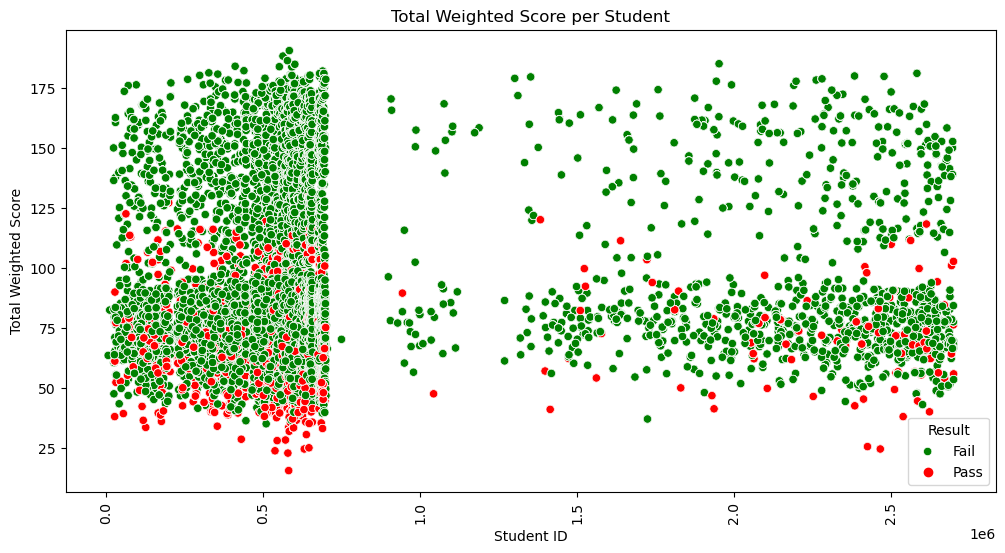

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_dataset is your DataFrame from the previous steps

# Step 1: Sort the data by course and id_student for better visualization
final_dataset = final_dataset.sort_values(by=['course', 'id_student'])

# Step 2: Plot the total_weight_score with distinction between pass and fail
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=final_dataset,
    x='id_student',
    y='total_weight_score',
    hue='pass',
    palette={1: 'green', 0: 'red'}
)
plt.title('Total Weighted Score per Student')
plt.xlabel('Student ID')
plt.ylabel('Total Weighted Score')
plt.legend(title='Result', labels=['Fail', 'Pass'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


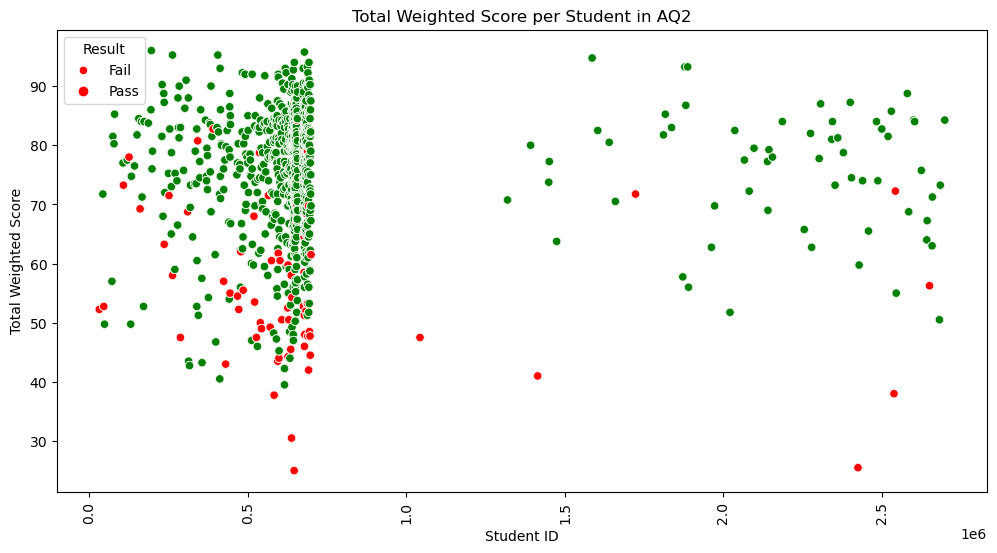

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_dataset is your DataFrame from the previous steps

# Step 1: Filter for a specific course, e.g., AQ2
course_data = final_dataset[final_dataset['course'] == 'BQ4']

# Step 2: Plot the total_weight_score with distinction between pass and fail
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=course_data,
    x='id_student',
    y='total_weight_score',
    hue='pass',
    palette={1: 'green', 0: 'red'}
)
plt.title('Total Weighted Score per Student in AQ2')
plt.xlabel('Student ID')
plt.ylabel('Total Weighted Score')
plt.legend(title='Result', labels=['Fail', 'Pass'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


In [226]:
import pandas as pd

# Assuming final_dataset is your DataFrame from the previous steps

# Step 1: Filter the data for courses starting with 'A', 'B', or 'C'
filtered_courses = final_dataset[final_dataset['course'].str.startswith(('A', 'B', 'C'))]

# Display the resulting DataFrame
print(filtered_courses)


      course   test  id_student  weight  score  weighted_score  \
0        AQ2  test1       11391    10.0   78.0             7.8   
269      AQ2  test2       11391    20.0   85.0            17.0   
538      AQ2  test3       11391    20.0   80.0            16.0   
807      AQ2  test4       11391    20.0   85.0            17.0   
1076     AQ2  test5       11391    30.0   82.0            24.6   
...      ...    ...         ...     ...    ...             ...   
37212    CQ4  test4     2694919    35.0   68.0            23.8   
34042    CQ4  test1     2698577    10.0   54.0             5.4   
35099    CQ4  test2     2698577    20.0   56.0            11.2   
36156    CQ4  test3     2698577    35.0   58.0            20.3   
37213    CQ4  test4     2698577    35.0   54.0            18.9   

       total_weight_score  pass  
0                    82.4     1  
269                  82.4     1  
538                  82.4     1  
807                  82.4     1  
1076                 82.4     1  
...

In [227]:
import pandas as pd

# Assuming filtered_courses is your DataFrame from the previous steps

# Count the number of unique courses
unique_courses_count = filtered_courses['course'].nunique()

# Display the result
print(f'Number of unique courses: {unique_courses_count}')


Number of unique courses: 10


In [228]:
import pandas as pd

# Assuming final_dataset is your DataFrame from the previous steps

# Step 1: Filter the data for course CQ4
cq4_data = final_dataset[final_dataset['course'] == 'CQ4']

# Display the resulting DataFrame
print(cq4_data)


      course   test  id_student  weight  score  weighted_score  \
32986    CQ4  test1       26315    10.0   60.0             6.0   
34043    CQ4  test2       26315    20.0   72.0            14.4   
35100    CQ4  test3       26315    35.0   62.0            21.7   
36157    CQ4  test4       26315    35.0   62.0            21.7   
32987    CQ4  test1       32930    10.0   57.0             5.7   
...      ...    ...         ...     ...    ...             ...   
37212    CQ4  test4     2694919    35.0   68.0            23.8   
34042    CQ4  test1     2698577    10.0   54.0             5.4   
35099    CQ4  test2     2698577    20.0   56.0            11.2   
36156    CQ4  test3     2698577    35.0   58.0            20.3   
37213    CQ4  test4     2698577    35.0   54.0            18.9   

       total_weight_score  pass  
32986                63.8     1  
34043                63.8     1  
35100                63.8     1  
36157                63.8     1  
32987                55.3     1  
...

In [229]:
import pandas as pd

# Assuming final_dataset is your DataFrame from the previous steps

# Filter the data for course CQ4
cq4_data = final_dataset[final_dataset['course'] == 'CQ4']

# Save to CSV
cq4_data.to_csv('CQ4_dataset.csv', index=False)

# Display the resulting DataFrame
print(cq4_data.head())


      course   test  id_student  weight  score  weighted_score  \
32986    CQ4  test1       26315    10.0   60.0             6.0   
34043    CQ4  test2       26315    20.0   72.0            14.4   
35100    CQ4  test3       26315    35.0   62.0            21.7   
36157    CQ4  test4       26315    35.0   62.0            21.7   
32987    CQ4  test1       32930    10.0   57.0             5.7   

       total_weight_score  pass  
32986                63.8     1  
34043                63.8     1  
35100                63.8     1  
36157                63.8     1  
32987                55.3     1  
